In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()


## Contents

**[1. Objective](#1.-Objective)**
- [1.1. Addressable Market](#1.1.-Addressable-Market)
- [1.2. Problem Statement](#1.2.-Problem-Statement)
- [1.3. Data Sources](#1.3.-Data-Sources)


**[2. Breakdown into four customer segments](#2.-Breakdown-into-four-customer-segments)**

**[3. Identifying Broad Missing Values](#3.-Identifying-Broad-Missing-Values)**

**[4. EDA Categorical Features](#4.-EDA-Categorical-Features)**
- [4.1. NAME_CONTRACT_TYPE](#4.1.-NAME_CONTRACT_TYPE)
- [4.2. CODE_GENDER](#4.2.-CODE_GENDER)
- [4.3. FLAG_OWN_CAR](#4.3.-FLAG_OWN_CAR)
- [4.4. FLAG_OWN_REALTY](#4.4.-FLAG_OWN_REALTY)
- [4.5. NAME_EDUCATION_TYPE](#4.5.-NAME_EDUCATION_TYPE)
- [4.6. NAME_TYPE_SUITE](#4.6.-NAME_TYPE_SUITE)
- [4.7. NAME_FAMILY_STATUS](#4.7.-NAME_FAMILY_STATUS)
- [4.8. NAME_HOUSING_TYPE](#4.8.-NAME_HOUSING_TYPE)
- [4.9. WEEKDAY_APPR_PROCESS_START](#4.9.-WEEKDAY_APPR_PROCESS_STARTR)
- [4.10. FLAG_MOBIL](#4.10.-FLAG_MOBIL)
- [4.11. FLAG_CONT_MOBILE](#4.11.-FLAG_CONT_MOBILE)
- [4.12. FLAG_EMP_PHONE](#4.12.-FLAG_EMP_PHONE)
- [4.13. FLAG_WORK_PHONE](#4.13.-FLAG_WORK_PHONE)
- [4.14. FLAG_PHONE](#4.14.-FLAG_PHONE)
- [4.15. FLAG_EMAIL](#4.15.-FLAG_EMAIL)
- [4.16. NAME_INCOME_TYPE](#4.16.-NAME_INCOME_TYPE)
- [4.17. REGION_RATING_CLIENT](#4.17.-REGION_RATING_CLIENT)
- [4.18. REGION_RATING_CLIENT_W_CITY](#4.18.-REGION_RATING_CLIENT_W_CITY)
- [4.19. REG_REGION_NOT_LIVE_REGION](#4.19.-REG_REGION_NOT_LIVE_REGION)
- [4.20. REG_REGION_NOT_WORK_REGION](#4.20.-REG_REGION_NOT_WORK_REGION)
- [4.21. LIVE_REGION_NOT_WORK_REGION](#4.21.-LIVE_REGION_NOT_WORK_REGION)
- [4.22. REG_CITY_NOT_LIVE_CITY](#4.22.-REG_CITY_NOT_LIVE_CITY)
- [4.23. REG_CITY_NOT_WORK_CITY](#4.23.-REG_CITY_NOT_WORK_CITY)
- [4.24. LIVE_CITY_NOT_WORK_CITY](#4.24.-LIVE_CITY_NOT_WORK_CITY)
- [4.25. FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21](#4.25.-FLAG_DOCUMENT_2-to-FLAG_DOCUMENT_21)

**[5. EDA - Numerical Features](#5.-EDA-Numerical-Features)**
- [5.1. Days_Birth](#5.1.-Days_Birth)
- [5.2. Days_Employed](#5.2.-Days_Employed)
- [5.3. CNT_CHILDREN](#5.3.-CNT_CHILDREN)
- [5.4. AMT_INCOME_TOTAL](#5.4.-AMT_INCOME_TOTAL)
- [5.5. AMT_CREDIT](#5.5.-AMT_CREDIT)
- [5.6. LOAN_INCOME_RATIO](#5.6.-LOAN_INCOME_RATIOd)
- [5.7. ANNUITY_INCOME_RATIO](#5.7.-ANNUITY_INCOME_RATIO)
- [5.8. REGION_POPULATION_RELATIVE](#5.8.-REGION_POPULATION_RELATIVE)
- [5.9. DAYS_REGISTRATION](#5.9.-DAYS_REGISTRATION)
- [5.10. DAYS_ID_PUBLISH](#5.10.-DAYS_ID_PUBLISH)
- [5.11. OWN_CAR_AGE](#5.11.-OWN_CAR_AGE)
- [5.12. CNT_FAM_MEMBERS](#5.12.-CNT_FAM_MEMBERS)
- [5.13. HOUR_APPR_PROCESS_START](#5.13.-HOUR_APPR_PROCESS_START)
- [5.14. EXT_SOURCE_1-3](#5.14.-EXT_SOURCE_1-3)
- [5.15. SOCIAL_CIRCLE](#5.15.-SOCIAL_CIRCLE)
- [5.16. DAYS_LAST_PHONE_CHANGE](#5.16.-DAYS_LAST_PHONE_CHANGE)

  
**[6. Dropping Features and Filling Missing Values](#6.-Dropping-Features-and-Filling-Missing-Values)**

**[7. Saving to CSV](#7.-Saving-to-CSV)**


## 1. Objective

### 1.1. Addressable Market
[top](#Contents)

According to a [report](https://www.bain.com/insights/fulfilling-southeast-asias-digital-financial-services-promise/) by Bain & Company, and in collaboration with Google and Temasek, the six largest countries in Southeast Asia (Indonesia, Philippines, Vietnam, Thailand, Myanmar, and Malaysia) represents one of the world's larget and fastest-growing regions with a population of 570 million and GDP expected to reach USD 4.7 trillion by 2025.  
<br>

Digital financial services is expected to **grow over threefolds to USD 38 billion in revenue annually of which credit lending is likely to contribute about half of this amount.** Overall, **almost 75% of the population** in Southeast Asia is either:
- unbanked (without access to a basic bank account) or 
- under-banked (have no access to credit cards or long-term savings products). 

Looking at just the unbanked portion in the 3 largest countries in Southeast Asia (Indonesia, Philippines, and Vietnam), we are looking at an **immediate addressable market size of 270 million people**. 

[Source](https://www.businessinsider.com/southeast-asia-financial-services-revenue-will-triple-by-2025-2019-11)

<div>
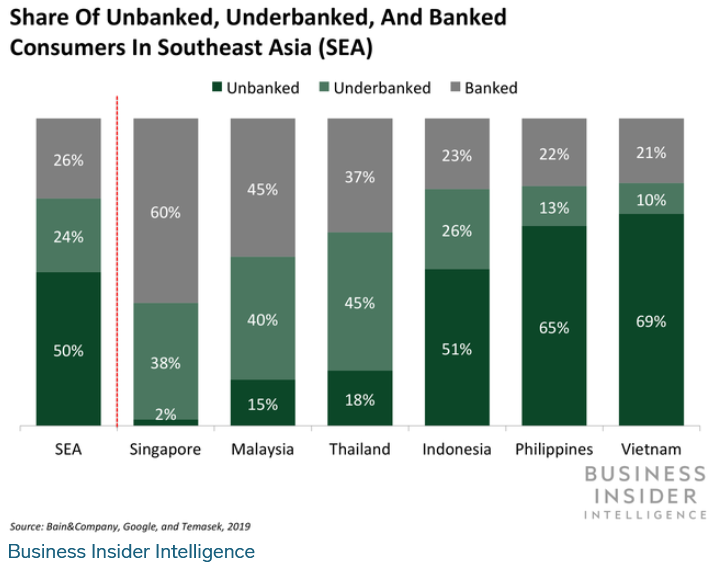
<div>



Despite this potential addressable market, **4 main factors have limited the growth of digital financial services** in the region:
- Consumers and merchants have been slow to abandon cash and make the move to digital—only 40% of transactions are cashless, compared with 84% in the US and UK
- absence of a reliable digitized identification system in most Southeast Asian markets
- regulators have taken a cautious approach that emphasizes consumer protection over innovation
- the region’s financial system infrastructure remains largely underdeveloped, with an absence of robust credit bureaus, for example

This report further explore the fourth issue mentioned above, where the absence of robust credit bureaus have impede the risk appetite and progress of credit lending in these regions to better serve the unbanked as well as under-banked population. 

Even without robust credit bureaus and reports, it is possible to supplement or substitute the lack of these information with alternative features. **One of the main growth in these alternative features is the usage of the applicants mobile data and/or digital footprint** to assess his or her credit risk and worthiness.

We explore a data set from Kaggle which included a number of alternative and traditional features, as well as past borrowing histories and bureau records. From these datasets, we identified 4 primary groups of customers:
1. Existing customers with credit reports
2. New customers with credit reports
3. Existing customers without credit reports
4. New customers without credit reports

It is the third and fourth group where customers do not have credit reports that we are most interested in. Additionally, group 4 carries the most risk as they have the least features to train the model to predict default rates. 

### 1.2. Problem Statement
[top](#Contents)

A fintech has identified the under-banked and unbanked segment as the group with the largest potential in Indonesia, Philippines and Vietnam and would like to be one of the first mover to gain market share and be entrenched as the go-to provider of credit in these markets. 

A necessary first step would be to train and improve a credit model that will aid in addressing new customers or existing customers without credit bureau reports (the unbanked and under-banked group). 

Improving the model would likely result in greater appetite for risk and lending activity for the fintech, leading to increase market share in Indonesia, Philippines and Vietnam.   

### 1.3. Data Sources
[top](#Contents)

**How the datasets are structured**
<br>
[Source](https://www.kaggle.com/c/home-credit-default-risk/data)

<div>
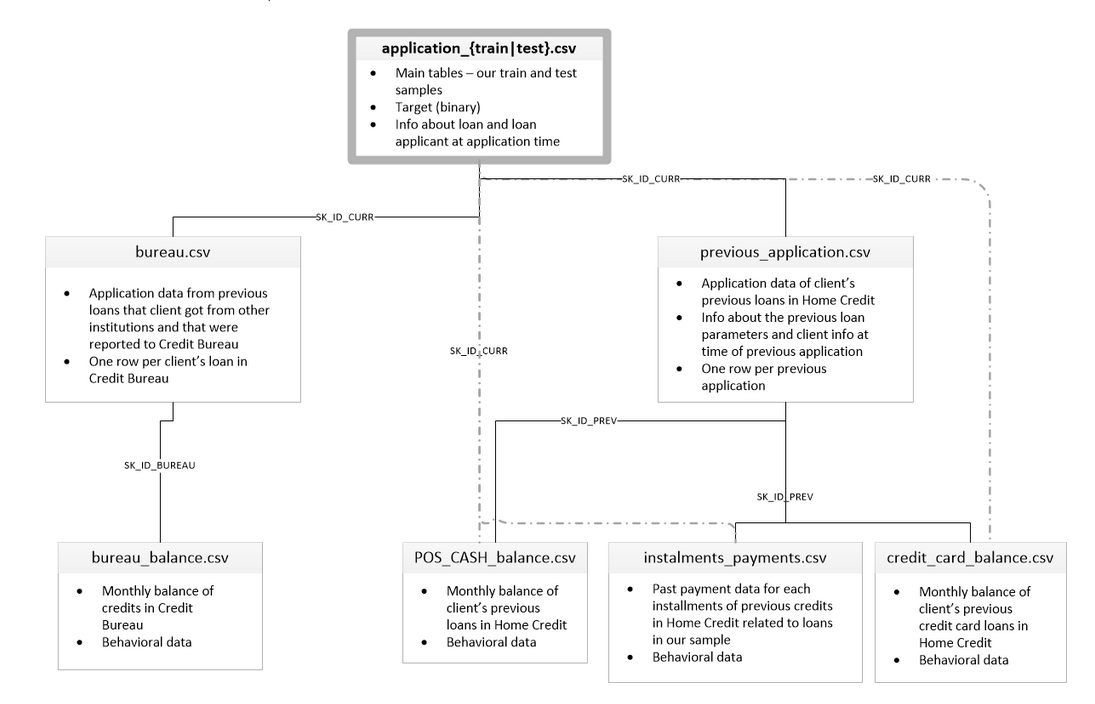

**application_{train|test}.csv**
- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
- Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**
- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**
- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**
- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**
- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**
- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv** (Data Dictionary)
- This file contains descriptions for the columns in the various data files.


In [2]:
# reading all the datasets

train = pd.read_csv('../datasets/application_train.csv')
test = pd.read_csv('../datasets/application_test.csv')
pos_cash= pd.read_csv('../datasets/POS_CASH_balance.csv')
bureau_bal = pd.read_csv('../datasets/bureau_balance.csv')
bureau = pd.read_csv('../datasets/bureau.csv')
pre_app = pd.read_csv('../datasets/previous_application.csv')
install_pay = pd.read_csv('../datasets/installments_payments.csv')
credit_card_bal = pd.read_csv('../datasets/credit_card_balance.csv')

In [3]:
datasets = [train, test, pos_cash, bureau_bal, bureau, pre_app, install_pay, credit_card_bal]
datasets_name = ['train', 'test', 'pos_cash', 'bureau_bal', 'bureau', 'pre_app', 'insta_pay', 'credit_card_bal']

In [4]:
for idx, dataset in enumerate(datasets):
    print(f'Shape of {datasets_name[idx]} dataset is {dataset.shape}')
    print()

Shape of train dataset is (307511, 122)

Shape of test dataset is (48744, 121)

Shape of pos_cash dataset is (1048575, 8)

Shape of bureau_bal dataset is (27299925, 3)

Shape of bureau dataset is (1716428, 17)

Shape of pre_app dataset is (1670214, 37)

Shape of insta_pay dataset is (13605401, 8)

Shape of credit_card_bal dataset is (3840312, 23)



In [5]:
# test is about 16% of the train set
len(test)/len(train)

0.1585114028441259

## 2. Breakdown into four customer segments
[top](#Contents)

Create subset of different groups. Essentially, I would like to identify these various groups:
1. Applicants that **have credit bureau reports** and are **repeat customers**
2. Applicants that **have credit bureau reports** but are **new customers**
3. Applicants that **do not have credit bureau reports** but are **repeated customers** (have previous application history)
4. Applicants that **do not have credit bureau reports** and are **new customers** 

The treatment and model of each group ought to be different and we can create a customize model for each so that we can maximize the value of each group. Historically, group 4 and (maybe group 3) would be the un-banked group as they will face the most difficulty in securing a loan. If we could create a model that helps predict defaults, then this under-served group can be better served to address their needs and also expand market share and generate profits for the company.

In [6]:
train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [7]:
bureau.head(3)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

In [8]:
pre_app.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [9]:
train['SK_ID_CURR'] = train['SK_ID_CURR'].astype(str)
train_id = train['SK_ID_CURR'].tolist()
train_id = set(train_id)
print('Unique IDs in train set: ')
len(train_id)

Unique IDs in train set: 


307511

In [10]:
# no duplicate IDs in train set
len(train)

307511

In [11]:
test['SK_ID_CURR'] = test['SK_ID_CURR'].astype(str)
test_id = test['SK_ID_CURR'].tolist()
test_id = set(test_id)
print('Unique IDs in train set: ')
len(test_id)

Unique IDs in train set: 


48744

In [12]:
# no duplicate IDs in test set
len(test)

48744

In [13]:
bureau['SK_ID_CURR'] = bureau['SK_ID_CURR'].astype(str)
bureau_id = bureau['SK_ID_CURR'].tolist()
# there are duplicates, so we make it a set
bureau_id = set(bureau_id)
len(bureau_id)

305811

In [14]:
# group of returning customers
pre_app['SK_ID_CURR'] = pre_app['SK_ID_CURR'].astype(str)
# choosing only rows where previous loan contract was approved
pre_app_id = pre_app['SK_ID_CURR'].loc[pre_app['NAME_CONTRACT_STATUS'] == 'Approved']
pre_app_id = set(pre_app_id)
len(pre_app_id)

337698

In [15]:
no_bureau_report_train = []
no_bureau_report_test = []

for i in train_id:
    if i not in bureau_id:
        no_bureau_report_train.append(i)
        
for j in test_id:
    if j not in bureau_id:
        no_bureau_report_test.append(j)

print(len(no_bureau_report_train))

print(len(no_bureau_report_test))

no_bureau_report_train = set(no_bureau_report_train)

no_bureau_report_test = set(no_bureau_report_test)

44020
6424


In [16]:
# finding out the number where the application did not have a bureau report and is a new customer
# group 4
no_bureau_new_cust_train = []
no_bureau_new_cust_test = []

for i in no_bureau_report_train:
    if i not in pre_app_id:
        no_bureau_new_cust_train.append(i)

for j in no_bureau_report_test:
    if j not in pre_app_id:
        no_bureau_new_cust_test.append(j)

print(len(no_bureau_new_cust_train))

print(len(no_bureau_new_cust_test))

no_bureau_new_cust_train = set(no_bureau_new_cust_train)

no_bureau_new_cust_test = set(no_bureau_new_cust_test)

2587
221


In [17]:
# group 3, no credit bureau report and is a repeat customer
# no_bureau_report - no_bureau_new_cust
no_bureau_repeat_cust_train = no_bureau_report_train - no_bureau_new_cust_train

no_bureau_repeat_cust_test = no_bureau_report_test - no_bureau_new_cust_test

print(len(no_bureau_repeat_cust_train))

print(len(no_bureau_repeat_cust_test))


41433
6203


In [18]:
# group with credit reports, include new and repeat customers
# train_id, test_id - group 3 - group 4
bureau_all_cust_train = train_id - no_bureau_repeat_cust_train - no_bureau_new_cust_train
bureau_all_cust_test = test_id - no_bureau_repeat_cust_test - no_bureau_new_cust_test

In [19]:
# finding out the number where the application has a bureau report and is a new customer
# group 2
bureau_new_cust_train = []
bureau_new_cust_test = []

for i in bureau_all_cust_train:
    if i not in pre_app_id:
        bureau_new_cust_train.append(i)

for j in bureau_all_cust_test:
    if j not in pre_app_id:
        bureau_new_cust_test.append(j)

print(len(bureau_new_cust_train))

print(len(bureau_new_cust_test))

bureau_new_cust_train = set(bureau_new_cust_train)

bureau_new_cust_test = set(bureau_new_cust_test)

14859
890


In [20]:
# group 1, credit report, and repeat customer

bureau_repeat_cust_train = bureau_all_cust_train - bureau_new_cust_train

bureau_repeat_cust_test = bureau_all_cust_test - bureau_new_cust_test

print(len(bureau_repeat_cust_train))

print(len(bureau_repeat_cust_test))


248632
41430


**Segmenting out the various groups from train and test set**

In [21]:
# group 1
train_1 = train.loc[train['SK_ID_CURR'].isin(bureau_repeat_cust_train)]

test_1 = test.loc[test['SK_ID_CURR'].isin(bureau_repeat_cust_test)]

In [22]:
# group 2
train_2 = train.loc[train['SK_ID_CURR'].isin(bureau_new_cust_train)]

test_2 = test.loc[test['SK_ID_CURR'].isin(bureau_new_cust_test)]

In [23]:
# group 3
train_3 = train.loc[train['SK_ID_CURR'].isin(no_bureau_repeat_cust_train)]

test_3 = test.loc[test['SK_ID_CURR'].isin(no_bureau_repeat_cust_test)]

In [24]:
# group 4
train_4 = train.loc[train['SK_ID_CURR'].isin(no_bureau_new_cust_train)]

test_4 = test.loc[test['SK_ID_CURR'].isin(no_bureau_new_cust_test)]

In [25]:
train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [26]:
train_1['TARGET'].value_counts(normalize=True)

0    0.921595
1    0.078405
Name: TARGET, dtype: float64

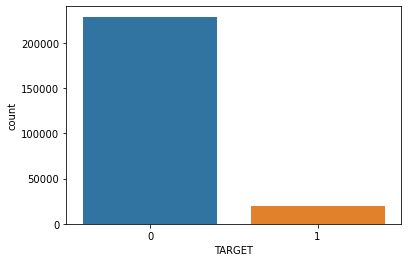

In [27]:
sns.countplot(data=train_1, x='TARGET');

In [28]:
train_2['TARGET'].value_counts(normalize=True)

0    0.94118
1    0.05882
Name: TARGET, dtype: float64

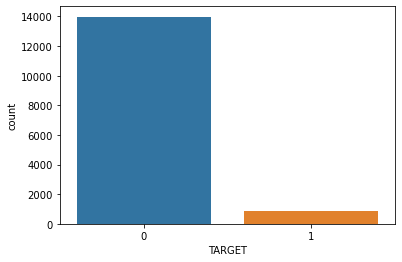

In [29]:
sns.countplot(data=train_2, x='TARGET');

In [30]:
train_3['TARGET'].value_counts(normalize=True)

0    0.897063
1    0.102937
Name: TARGET, dtype: float64

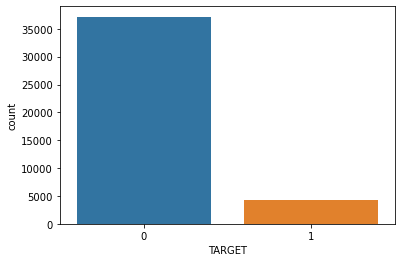

In [31]:
sns.countplot(data=train_3, x='TARGET');

In [32]:
train_4['TARGET'].value_counts(normalize=True)

0    0.925783
1    0.074217
Name: TARGET, dtype: float64

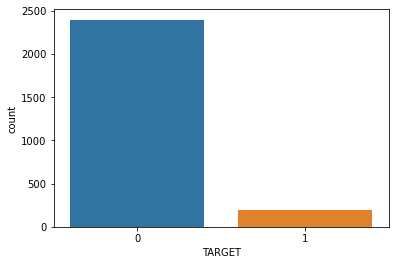

In [33]:
sns.countplot(data=train_4, x='TARGET');

Within each group, the proportion of defaults is not identical. We notice the group without credit reports tend to do better in terms of default rates. For example, Train_4 has a default rate of about 7.4%, lower than train_1. A plausible explanation could be that Home Credit itself is more selective and increases its risk aversion to such group of customers who do not have credit bureau information and as well as being a new customer. 

To conclude, these will be our 4 main groups, which matches the total number in training and test set:

| Group | Bureau Report | Repeat Customer | Train   | Test   |Default rate|
| ----- | ------------- | --------------- | ------- | ------ |------------|
| 1     | Yes           | Yes             | 248,632 | 41,430 | 7.84%      |
| 2     | Yes           | No              | 14,859  | 890    | 5.88%      |
| 3     | No            | Yes             | 41,433  | 6,203  | 10.29%     |
| 4     | No            | No              | 2,587   | 221    | 7.42%      |
| Total |               |                 | 307,511 | 48,744 | 8.07%      |

## 3. Identifying Broad Missing Values
[top](#Contents)

**Where are the Missing Values**

In [34]:
# define function to look at proportion of missing data 
def missing_data(df):
    total_num_missing = df.isnull().sum()
    total_percent_missing = df.isnull().sum()/len(df)*100
    total_missing_df = pd.concat([total_num_missing, total_percent_missing], axis=1, keys=['Total', '% of Missing Values'])
    total_missing_df = total_missing_df[
        total_missing_df.iloc[:,1] != 0].sort_values('% of Missing Values', ascending=False).round(1)
    print('The dataframe has ' + str(df.shape[1]) + ' columns.\n' 
         'There are ' +str(total_missing_df.shape[0]) + ' columns that have missing values.')
    return total_missing_df

In [35]:
train_1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248632 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    248632 non-null  object 
 1    TARGET                        248632 non-null  int64  
 2    NAME_CONTRACT_TYPE            248632 non-null  object 
 3    CODE_GENDER                   248632 non-null  object 
 4    FLAG_OWN_CAR                  248632 non-null  object 
 5    FLAG_OWN_REALTY               248632 non-null  object 
 6    CNT_CHILDREN                  248632 non-null  int64  
 7    AMT_INCOME_TOTAL              248632 non-null  float64
 8    AMT_CREDIT                    248632 non-null  float64
 9    AMT_ANNUITY                   248621 non-null  float64
 10   AMT_GOODS_PRICE               248412 non-null  float64
 11   NAME_TYPE_SUITE               247962 non-null  object 
 12   NAME_INCOME_TYPE            

In [36]:
missing_data(train_1)

The dataframe has 122 columns.
There are 59 columns that have missing values.


Total  % of Missing Values
COMMONAREA_MODE               173896                 69.9
COMMONAREA_MEDI               173896                 69.9
COMMONAREA_AVG                173896                 69.9
NONLIVINGAPARTMENTS_AVG       172814                 69.5
NONLIVINGAPARTMENTS_MEDI      172814                 69.5
NONLIVINGAPARTMENTS_MODE      172814                 69.5
FONDKAPREMONT_MODE            170228                 68.5
LIVINGAPARTMENTS_AVG          170147                 68.4
LIVINGAPARTMENTS_MEDI         170147                 68.4
LIVINGAPARTMENTS_MODE         170147                 68.4
FLOORSMIN_MEDI                168919                 67.9
FLOORSMIN_MODE                168919                 67.9
FLOORSMIN_AVG                 168919                 67.9
YEARS_BUILD_MODE              165529                 66.6
YEARS_BUILD_AVG               165529                 66.6
YEARS_BUILD_MEDI              165529                 66.6
OWN_CAR_AGE                   162494                 65.4
LANDAREA_MODE                 147682                 59.4
LANDAREA_MEDI                 147682                 59.4
LANDAREA_AVG                  147682                 59.4
BASEMENTAREA_AVG              145658                 58.6
BASEMENTAREA_MEDI             145658                 58.6
BASEMENTAREA_MODE             145658                 58.6
EXT_SOURCE_1                  138073                 55.5
NONLIVINGAREA_AVG             137410                 55.3
NONLIVINGAREA_MEDI            137410                 55.3
NONLIVINGAREA_MODE            137410                 55.3
ELEVATORS_MODE                132741                 53.4
ELEVATORS_AVG                 132741                 53.4
ELEVATORS_MEDI                132741                 53.4
WALLSMATERIAL_MODE            126589                 50.9
APARTMENTS_MODE               126328                 50.8
APARTMENTS_MEDI               126328                 50.8
APARTMENTS_AVG                126328                 50.8
ENTRANCES_MODE                125331                 50.4
ENTRANCES_MEDI                125331                 50.4
ENTRANCES_AVG                 125331                 50.4
LIVINGAREA_AVG                124963                 50.3
LIVINGAREA_MEDI               124963                 50.3
LIVINGAREA_MODE               124963                 50.3
HOUSETYPE_MODE                124910                 50.2
FLOORSMAX_MEDI                123856                 49.8
FLOORSMAX_MODE                123856                 49.8
FLOORSMAX_AVG                 123856                 49.8
YEARS_BEGINEXPLUATATION_MEDI  121408                 48.8
YEARS_BEGINEXPLUATATION_MODE  121408                 48.8
YEARS_BEGINEXPLUATATION_AVG   121408                 48.8
TOTALAREA_MODE                120145                 48.3
EMERGENCYSTATE_MODE           117996                 47.5
OCCUPATION_TYPE                77612                 31.2
EXT_SOURCE_3                   16781                  6.7
NAME_TYPE_SUITE                  670                  0.3
DEF_30_CNT_SOCIAL_CIRCLE         669                  0.3
OBS_30_CNT_SOCIAL_CIRCLE         669                  0.3
OBS_60_CNT_SOCIAL_CIRCLE         669                  0.3
DEF_60_CNT_SOCIAL_CIRCLE         669                  0.3
EXT_SOURCE_2                     457                  0.2
AMT_GOODS_PRICE                  220                  0.1
AMT_ANNUITY                       11                  0.0

In [37]:
train_2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14859 entries, 26 to 307485
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    14859 non-null  object 
 1    TARGET                        14859 non-null  int64  
 2    NAME_CONTRACT_TYPE            14859 non-null  object 
 3    CODE_GENDER                   14859 non-null  object 
 4    FLAG_OWN_CAR                  14859 non-null  object 
 5    FLAG_OWN_REALTY               14859 non-null  object 
 6    CNT_CHILDREN                  14859 non-null  int64  
 7    AMT_INCOME_TOTAL              14859 non-null  float64
 8    AMT_CREDIT                    14859 non-null  float64
 9    AMT_ANNUITY                   14859 non-null  float64
 10   AMT_GOODS_PRICE               14850 non-null  float64
 11   NAME_TYPE_SUITE               14369 non-null  object 
 12   NAME_INCOME_TYPE              14859 non-nu

In [38]:
missing_data(train_2)

The dataframe has 122 columns.
There are 59 columns that have missing values.


Total  % of Missing Values
COMMONAREA_MODE                9323                 62.7
COMMONAREA_MEDI                9323                 62.7
COMMONAREA_AVG                 9323                 62.7
NONLIVINGAPARTMENTS_MEDI       9224                 62.1
NONLIVINGAPARTMENTS_MODE       9224                 62.1
NONLIVINGAPARTMENTS_AVG        9224                 62.1
OWN_CAR_AGE                    9222                 62.1
FONDKAPREMONT_MODE             9055                 60.9
LIVINGAPARTMENTS_MEDI          9044                 60.9
LIVINGAPARTMENTS_MODE          9044                 60.9
LIVINGAPARTMENTS_AVG           9044                 60.9
FLOORSMIN_MEDI                 8971                 60.4
FLOORSMIN_MODE                 8971                 60.4
FLOORSMIN_AVG                  8971                 60.4
YEARS_BUILD_MODE               8710                 58.6
YEARS_BUILD_AVG                8710                 58.6
YEARS_BUILD_MEDI               8710                 58.6
EXT_SOURCE_1                   8543                 57.5
LANDAREA_MODE                  7518                 50.6
LANDAREA_MEDI                  7518                 50.6
LANDAREA_AVG                   7518                 50.6
BASEMENTAREA_AVG               7346                 49.4
BASEMENTAREA_MEDI              7346                 49.4
BASEMENTAREA_MODE              7346                 49.4
NONLIVINGAREA_AVG              6749                 45.4
NONLIVINGAREA_MEDI             6749                 45.4
NONLIVINGAREA_MODE             6749                 45.4
ELEVATORS_MODE                 6425                 43.2
ELEVATORS_AVG                  6425                 43.2
ELEVATORS_MEDI                 6425                 43.2
APARTMENTS_MODE                6104                 41.1
APARTMENTS_MEDI                6104                 41.1
APARTMENTS_AVG                 6104                 41.1
WALLSMATERIAL_MODE             6059                 40.8
HOUSETYPE_MODE                 6018                 40.5
ENTRANCES_MODE                 6006                 40.4
ENTRANCES_MEDI                 6006                 40.4
ENTRANCES_AVG                  6006                 40.4
LIVINGAREA_AVG                 5995                 40.3
LIVINGAREA_MEDI                5995                 40.3
LIVINGAREA_MODE                5995                 40.3
FLOORSMAX_MEDI                 5918                 39.8
FLOORSMAX_MODE                 5918                 39.8
FLOORSMAX_AVG                  5918                 39.8
YEARS_BEGINEXPLUATATION_MEDI   5798                 39.0
YEARS_BEGINEXPLUATATION_MODE   5798                 39.0
YEARS_BEGINEXPLUATATION_AVG    5798                 39.0
TOTALAREA_MODE                 5694                 38.3
EMERGENCYSTATE_MODE            5562                 37.4
OCCUPATION_TYPE                4589                 30.9
EXT_SOURCE_3                   1508                 10.1
NAME_TYPE_SUITE                 490                  3.3
OBS_30_CNT_SOCIAL_CIRCLE        172                  1.2
DEF_30_CNT_SOCIAL_CIRCLE        172                  1.2
OBS_60_CNT_SOCIAL_CIRCLE        172                  1.2
DEF_60_CNT_SOCIAL_CIRCLE        172                  1.2
EXT_SOURCE_2                     63                  0.4
AMT_GOODS_PRICE                   9                  0.1
CNT_FAM_MEMBERS                   1                  0.0

In [39]:
train_3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41433 entries, 3 to 307507
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    41433 non-null  object 
 1    TARGET                        41433 non-null  int64  
 2    NAME_CONTRACT_TYPE            41433 non-null  object 
 3    CODE_GENDER                   41433 non-null  object 
 4    FLAG_OWN_CAR                  41433 non-null  object 
 5    FLAG_OWN_REALTY               41433 non-null  object 
 6    CNT_CHILDREN                  41433 non-null  int64  
 7    AMT_INCOME_TOTAL              41433 non-null  float64
 8    AMT_CREDIT                    41433 non-null  float64
 9    AMT_ANNUITY                   41432 non-null  float64
 10   AMT_GOODS_PRICE               41387 non-null  float64
 11   NAME_TYPE_SUITE               41329 non-null  object 
 12   NAME_INCOME_TYPE              41433 non-nul

In [40]:
missing_data(train_3)

The dataframe has 122 columns.
There are 65 columns that have missing values.


Total  % of Missing Values
EXT_SOURCE_3                  40250                 97.1
AMT_REQ_CREDIT_BUREAU_YEAR    39230                 94.7
AMT_REQ_CREDIT_BUREAU_QRT     39230                 94.7
AMT_REQ_CREDIT_BUREAU_MON     39230                 94.7
AMT_REQ_CREDIT_BUREAU_WEEK    39230                 94.7
AMT_REQ_CREDIT_BUREAU_DAY     39230                 94.7
AMT_REQ_CREDIT_BUREAU_HOUR    39230                 94.7
COMMONAREA_MEDI               30010                 72.4
COMMONAREA_AVG                30010                 72.4
COMMONAREA_MODE               30010                 72.4
NONLIVINGAPARTMENTS_MEDI      29860                 72.1
NONLIVINGAPARTMENTS_MODE      29860                 72.1
NONLIVINGAPARTMENTS_AVG       29860                 72.1
OWN_CAR_AGE                   29437                 71.0
LIVINGAPARTMENTS_AVG          29419                 71.0
LIVINGAPARTMENTS_MEDI         29419                 71.0
LIVINGAPARTMENTS_MODE         29419                 71.0
FONDKAPREMONT_MODE            29415                 71.0
FLOORSMIN_MODE                29181                 70.4
FLOORSMIN_AVG                 29181                 70.4
FLOORSMIN_MEDI                29181                 70.4
YEARS_BUILD_MODE              28716                 69.3
YEARS_BUILD_MEDI              28716                 69.3
YEARS_BUILD_AVG               28716                 69.3
LANDAREA_MEDI                 26056                 62.9
LANDAREA_MODE                 26056                 62.9
LANDAREA_AVG                  26056                 62.9
BASEMENTAREA_AVG              25659                 61.9
BASEMENTAREA_MODE             25659                 61.9
BASEMENTAREA_MEDI             25659                 61.9
EXT_SOURCE_1                  25196                 60.8
NONLIVINGAREA_MODE            24347                 58.8
NONLIVINGAREA_MEDI            24347                 58.8
NONLIVINGAREA_AVG             24347                 58.8
ELEVATORS_MEDI                23597                 57.0
ELEVATORS_AVG                 23597                 57.0
ELEVATORS_MODE                23597                 57.0
WALLSMATERIAL_MODE            22619                 54.6
APARTMENTS_MODE               22553                 54.4
APARTMENTS_AVG                22553                 54.4
APARTMENTS_MEDI               22553                 54.4
ENTRANCES_MODE                22424                 54.1
ENTRANCES_MEDI                22424                 54.1
ENTRANCES_AVG                 22424                 54.1
LIVINGAREA_MODE               22320                 53.9
LIVINGAREA_AVG                22320                 53.9
LIVINGAREA_MEDI               22320                 53.9
HOUSETYPE_MODE                22310                 53.8
FLOORSMAX_AVG                 22191                 53.6
FLOORSMAX_MEDI                22191                 53.6
FLOORSMAX_MODE                22191                 53.6
YEARS_BEGINEXPLUATATION_MODE  21771                 52.5
YEARS_BEGINEXPLUATATION_AVG   21771                 52.5
YEARS_BEGINEXPLUATATION_MEDI  21771                 52.5
TOTALAREA_MODE                21571                 52.1
EMERGENCYSTATE_MODE           21196                 51.2
OCCUPATION_TYPE               13313                 32.1
EXT_SOURCE_2                    121                  0.3
NAME_TYPE_SUITE                 104                  0.3
OBS_30_CNT_SOCIAL_CIRCLE        103                  0.2
DEF_30_CNT_SOCIAL_CIRCLE        103                  0.2
OBS_60_CNT_SOCIAL_CIRCLE        103                  0.2
DEF_60_CNT_SOCIAL_CIRCLE        103                  0.2
AMT_GOODS_PRICE                  46                  0.1
AMT_ANNUITY                       1                  0.0

In [41]:
train_4.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 20 to 307387
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    2587 non-null   object 
 1    TARGET                        2587 non-null   int64  
 2    NAME_CONTRACT_TYPE            2587 non-null   object 
 3    CODE_GENDER                   2587 non-null   object 
 4    FLAG_OWN_CAR                  2587 non-null   object 
 5    FLAG_OWN_REALTY               2587 non-null   object 
 6    CNT_CHILDREN                  2587 non-null   int64  
 7    AMT_INCOME_TOTAL              2587 non-null   float64
 8    AMT_CREDIT                    2587 non-null   float64
 9    AMT_ANNUITY                   2587 non-null   float64
 10   AMT_GOODS_PRICE               2584 non-null   float64
 11   NAME_TYPE_SUITE               2559 non-null   object 
 12   NAME_INCOME_TYPE              2587 non-null

In [42]:
missing_data(train_4)

The dataframe has 122 columns.
There are 66 columns that have missing values.


Total  % of Missing Values
EXT_SOURCE_3                   2426                 93.8
AMT_REQ_CREDIT_BUREAU_YEAR     2289                 88.5
AMT_REQ_CREDIT_BUREAU_WEEK     2289                 88.5
AMT_REQ_CREDIT_BUREAU_HOUR     2289                 88.5
AMT_REQ_CREDIT_BUREAU_DAY      2289                 88.5
AMT_REQ_CREDIT_BUREAU_MON      2289                 88.5
AMT_REQ_CREDIT_BUREAU_QRT      2289                 88.5
OWN_CAR_AGE                    1776                 68.7
COMMONAREA_MEDI                1636                 63.2
COMMONAREA_AVG                 1636                 63.2
COMMONAREA_MODE                1636                 63.2
NONLIVINGAPARTMENTS_AVG        1616                 62.5
NONLIVINGAPARTMENTS_MEDI       1616                 62.5
NONLIVINGAPARTMENTS_MODE       1616                 62.5
FONDKAPREMONT_MODE             1597                 61.7
LIVINGAPARTMENTS_MEDI          1589                 61.4
LIVINGAPARTMENTS_MODE          1589                 61.4
LIVINGAPARTMENTS_AVG           1589                 61.4
FLOORSMIN_MODE                 1571                 60.7
FLOORSMIN_MEDI                 1571                 60.7
FLOORSMIN_AVG                  1571                 60.7
EXT_SOURCE_1                   1566                 60.5
YEARS_BUILD_MODE               1533                 59.3
YEARS_BUILD_MEDI               1533                 59.3
YEARS_BUILD_AVG                1533                 59.3
LANDAREA_AVG                   1334                 51.6
LANDAREA_MEDI                  1334                 51.6
LANDAREA_MODE                  1334                 51.6
BASEMENTAREA_MEDI              1280                 49.5
BASEMENTAREA_MODE              1280                 49.5
BASEMENTAREA_AVG               1280                 49.5
NONLIVINGAREA_MODE             1176                 45.5
NONLIVINGAREA_AVG              1176                 45.5
NONLIVINGAREA_MEDI             1176                 45.5
ELEVATORS_MODE                 1128                 43.6
ELEVATORS_AVG                  1128                 43.6
ELEVATORS_MEDI                 1128                 43.6
APARTMENTS_MEDI                1076                 41.6
APARTMENTS_MODE                1076                 41.6
APARTMENTS_AVG                 1076                 41.6
WALLSMATERIAL_MODE             1074                 41.5
LIVINGAREA_MEDI                1072                 41.4
LIVINGAREA_MODE                1072                 41.4
LIVINGAREA_AVG                 1072                 41.4
ENTRANCES_AVG                  1067                 41.2
ENTRANCES_MODE                 1067                 41.2
ENTRANCES_MEDI                 1067                 41.2
HOUSETYPE_MODE                 1059                 40.9
FLOORSMAX_MEDI                 1055                 40.8
FLOORSMAX_MODE                 1055                 40.8
FLOORSMAX_AVG                  1055                 40.8
YEARS_BEGINEXPLUATATION_MEDI   1030                 39.8
YEARS_BEGINEXPLUATATION_AVG    1030                 39.8
YEARS_BEGINEXPLUATATION_MODE   1030                 39.8
TOTALAREA_MODE                 1021                 39.5
EMERGENCYSTATE_MODE            1001                 38.7
OCCUPATION_TYPE                 877                 33.9
DEF_30_CNT_SOCIAL_CIRCLE         77                  3.0
OBS_60_CNT_SOCIAL_CIRCLE         77                  3.0
DEF_60_CNT_SOCIAL_CIRCLE         77                  3.0
OBS_30_CNT_SOCIAL_CIRCLE         77                  3.0
NAME_TYPE_SUITE                  28                  1.1
EXT_SOURCE_2                     19                  0.7
AMT_GOODS_PRICE                   3                  0.1
DAYS_LAST_PHONE_CHANGE            1                  0.0
CNT_FAM_MEMBERS                   1                  0.0

For train_1 and train_2, the top most columns with missing values are similar, relating to living conditions, whereas for train_3 and train_4, the top most columns were external bureau data followed by living conditions. We would probably drop these columns instead imputing some values. 
<br>

Additionally, we see that EXT_SOURCE_3 is the top missing column for both train_3 and train_4 (but not in train_1 and train_2), I posit that EXT_SOURCE_3 is scoring data based on bureau information. Furthermore, EX_SOURCE_1 is largely missing in all the train set (50-60%) and we might remove this column too. However, EXT_SOURCE_2 is present in all train_1 to train_4 which I believe will be an important feature. 

Current decision (for now):
- drop columns with more than 30% data missing for all train df
- drop EXT_SOURCE_3 and EXT_SOURCE_1 for train_3 and train_4

In [43]:
# create list of the various train and test set
train_set = [train_1, train_2, train_3, train_4]
test_set = [test_1, test_2, test_3, test_4]

## 4. EDA Categorical Features
[top](#Contents)

In [44]:
# define proportion function to calculate the default rate within each category in the feature
def proportion(df, feat):
    to_list = df[feat].loc[df['TARGET']==1].value_counts().index.sort_values().tolist()

    for feature in to_list:
        ratio = df[feat].loc[df['TARGET']==1].value_counts()[feature]/df[feat].value_counts()[feature]
        print(f"Proportion of defaults in {feature} is {round((ratio*100),1)}%")

### 4.1. NAME_CONTRACT_TYPE
`type of borrowing contract applicant took`
<br>
[top](#Contents)

In [45]:
for df_train in train_set:
    print(df_train['NAME_CONTRACT_TYPE'].value_counts())
    print()

Cash loans         225886
Revolving loans     22746
Name: NAME_CONTRACT_TYPE, dtype: int64

Cash loans         12834
Revolving loans     2025
Name: NAME_CONTRACT_TYPE, dtype: int64

Cash loans         37831
Revolving loans     3602
Name: NAME_CONTRACT_TYPE, dtype: int64

Cash loans         1681
Revolving loans     906
Name: NAME_CONTRACT_TYPE, dtype: int64



For Train_1:
Proportion of defaults in Cash loans is 8.1%
Proportion of defaults in Revolving loans is 5.3%


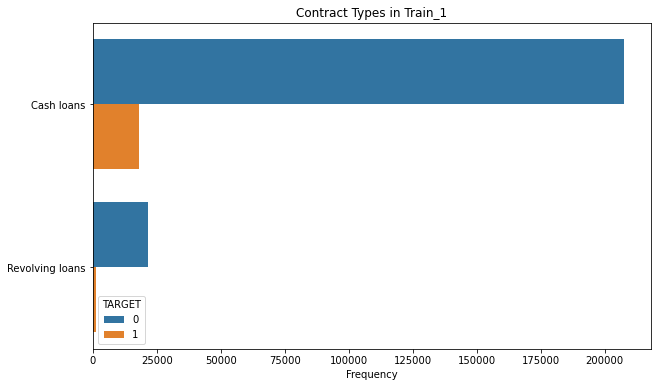

In [46]:
print('For Train_1:')

proportion(train_1, 'NAME_CONTRACT_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_CONTRACT_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Contract Types in Train_1');

For Train_2:
Proportion of defaults in Cash loans is 6.2%
Proportion of defaults in Revolving loans is 3.6%


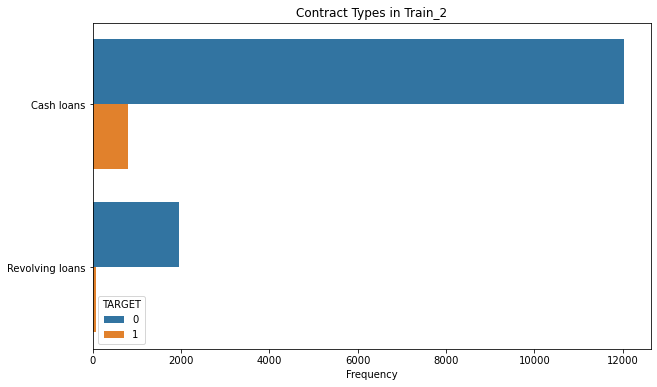

In [47]:
print('For Train_2:')

proportion(train_2, 'NAME_CONTRACT_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_CONTRACT_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Contract Types in Train_2');

For Train_3:
Proportion of defaults in Cash loans is 10.6%
Proportion of defaults in Revolving loans is 7.2%


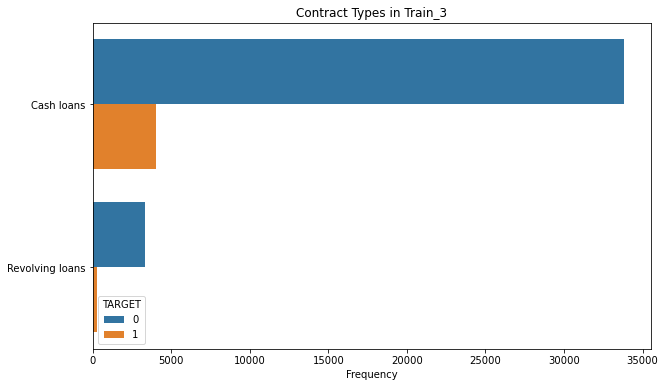

In [48]:
print('For Train_3:')

proportion(train_3, 'NAME_CONTRACT_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_CONTRACT_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Contract Types in Train_3');

For Train_4:
Proportion of defaults in Cash loans is 8.0%
Proportion of defaults in Revolving loans is 6.3%


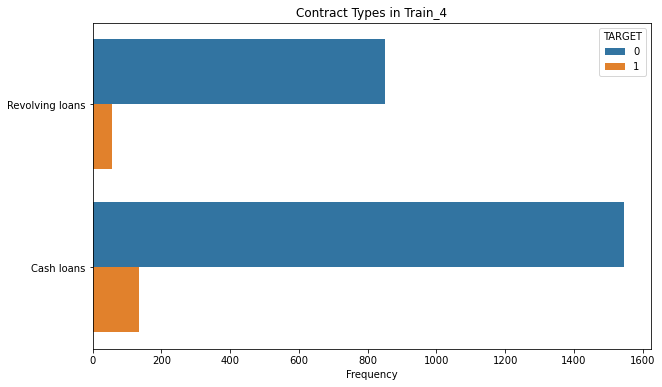

In [49]:
print('For Train_4:')

proportion(train_4, 'NAME_CONTRACT_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_CONTRACT_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Contract Types in Train_4');

In general, revolving loans (credit cards) tend to have lower default rates compared to cash loans. This is consistent across all the groups.  

### 4.2. CODE_GENDER
`Gender of applicant`
<br>
[top](#Contents)

In [50]:
for df_train in train_set:
    print(df_train['CODE_GENDER'].value_counts())
    print()

F      166012
M       82616
XNA         4
Name: CODE_GENDER, dtype: int64

F    8823
M    6036
Name: CODE_GENDER, dtype: int64

F    26127
M    15306
Name: CODE_GENDER, dtype: int64

F    1486
M    1101
Name: CODE_GENDER, dtype: int64



For Train_1:
Proportion of defaults in F is 6.8%
Proportion of defaults in M is 9.9%


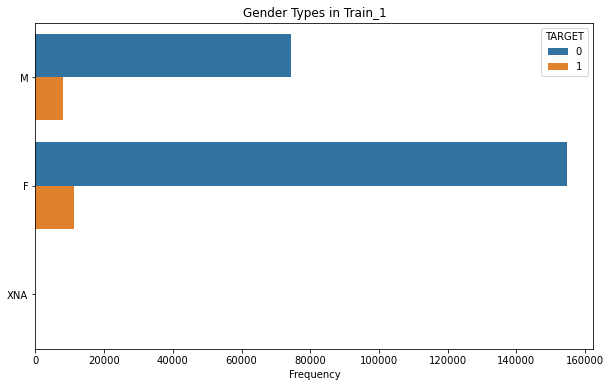

In [51]:
print('For Train_1:')

proportion(train_1, 'CODE_GENDER')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='CODE_GENDER', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Gender Types in Train_1');

For Train_2:
Proportion of defaults in F is 5.4%
Proportion of defaults in M is 6.5%


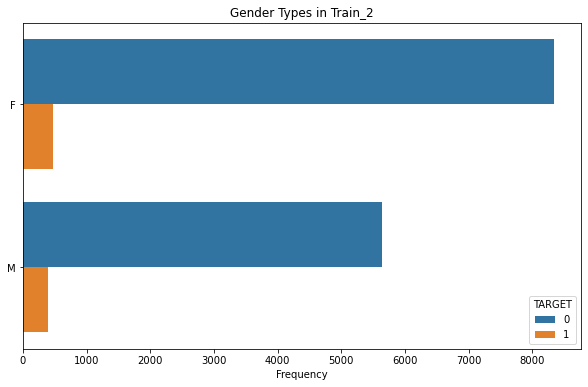

In [52]:
print('For Train_2:')

proportion(train_2, 'CODE_GENDER')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='CODE_GENDER', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Gender Types in Train_2');

For Train_3:
Proportion of defaults in F is 8.6%
Proportion of defaults in M is 13.2%


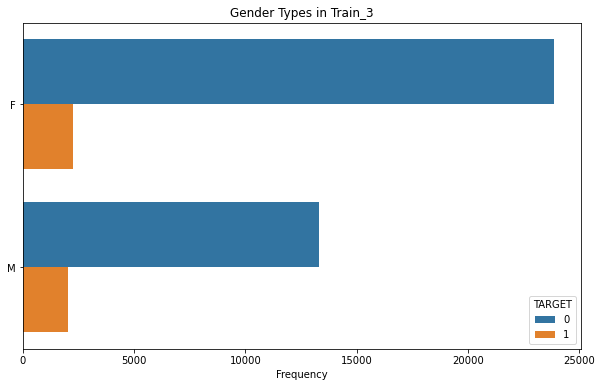

In [53]:
print('For Train_3:')

proportion(train_3, 'CODE_GENDER')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='CODE_GENDER', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Gender Types in Train_3');

For Train_4:
Proportion of defaults in F is 6.7%
Proportion of defaults in M is 8.4%


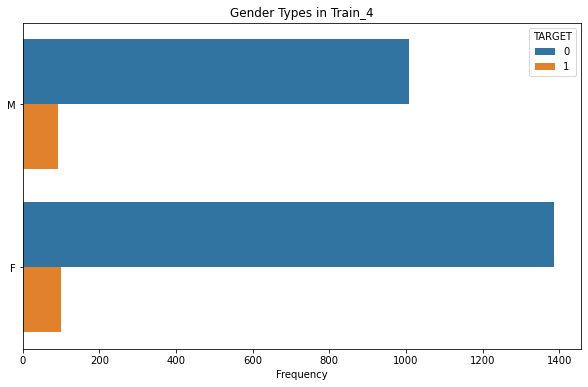

In [54]:
print('For Train_4:')

proportion(train_4, 'CODE_GENDER')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='CODE_GENDER', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Gender Types in Train_4');

More women are applicants compared to men across all our segments and they have better default rates compared to men. We shall change this column to a binary column with women = 0 and men = 1. Further, we will impute `XNA` to be Women (1):

In [55]:
gender_type = {'XNA': 0, 'F': 0, 'M': 1}

# loop through every train and test set
for df_train in train_set:
    df_train['CODE_GENDER'].replace(gender_type, inplace=True)
    
for df_test in test_set:
    df_test['CODE_GENDER'].replace(gender_type, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### 4.3. FLAG_OWN_CAR
`Does applicant own a car`
<br>
[top](#Contents)

In [56]:
for df_train in train_set:
    print(df_train['FLAG_OWN_CAR'].value_counts())
    print()

N    162489
Y     86143
Name: FLAG_OWN_CAR, dtype: int64

N    9222
Y    5637
Name: FLAG_OWN_CAR, dtype: int64

N    29437
Y    11996
Name: FLAG_OWN_CAR, dtype: int64

N    1776
Y     811
Name: FLAG_OWN_CAR, dtype: int64



For Train_1:
Proportion of defaults in N is 8.2%
Proportion of defaults in Y is 7.1%


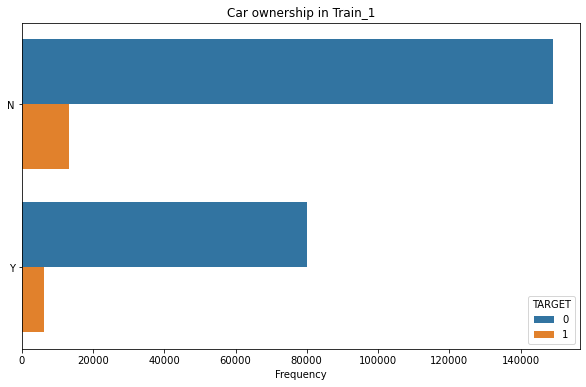

In [57]:
print('For Train_1:')

proportion(train_1, 'FLAG_OWN_CAR')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_OWN_CAR', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Car ownership in Train_1');

For Train_2:
Proportion of defaults in N is 6.7%
Proportion of defaults in Y is 4.6%


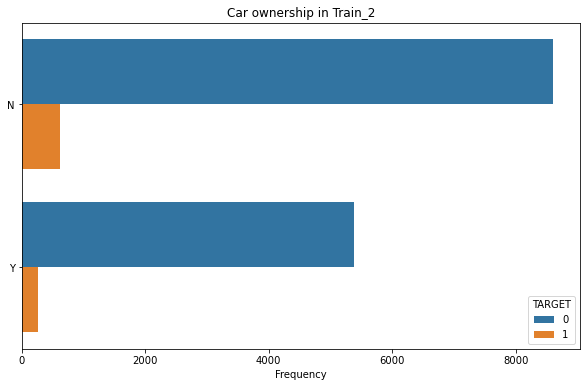

In [58]:
print('For Train_2:')

proportion(train_2, 'FLAG_OWN_CAR')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_OWN_CAR', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Car ownership in Train_2');

For Train_3:
Proportion of defaults in N is 10.6%
Proportion of defaults in Y is 9.5%


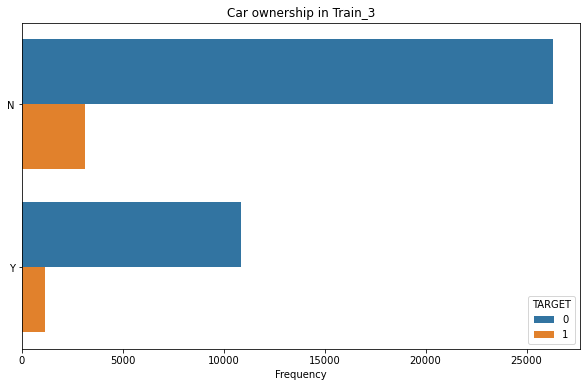

In [59]:
print('For Train_3:')

proportion(train_3, 'FLAG_OWN_CAR')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_OWN_CAR', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Car ownership in Train_3');

For Train_4:
Proportion of defaults in N is 8.4%
Proportion of defaults in Y is 5.2%


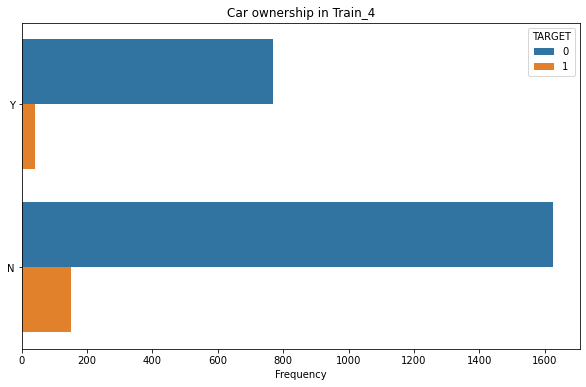

In [60]:
print('For Train_4:')

proportion(train_4, 'FLAG_OWN_CAR')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_OWN_CAR', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Car ownership in Train_4');

Applicants who owns a car have lower default rates compared to applicants who do not own a car. Let's convert this feature to be a binary with Y = 1 and N = 0. 

In [61]:
car = {'N': 0, 'Y': 1}

# loop through every train and test set
for df_train in train_set:
    df_train['FLAG_OWN_CAR'].replace(car, inplace=True)
    
for df_test in test_set:
    df_test['FLAG_OWN_CAR'].replace(car, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### 4.4. FLAG_OWN_REALTY
`Does applicant owns realty`
<br>
[top](#Contents)

In [62]:
for df_train in train_set:
    print(df_train['FLAG_OWN_REALTY'].value_counts())
    print()

Y    175357
N     73275
Name: FLAG_OWN_REALTY, dtype: int64

N    8374
Y    6485
Name: FLAG_OWN_REALTY, dtype: int64

Y    29726
N    11707
Name: FLAG_OWN_REALTY, dtype: int64

Y    1744
N     843
Name: FLAG_OWN_REALTY, dtype: int64



For Train_1:
Proportion of defaults in N is 8.2%
Proportion of defaults in Y is 7.7%


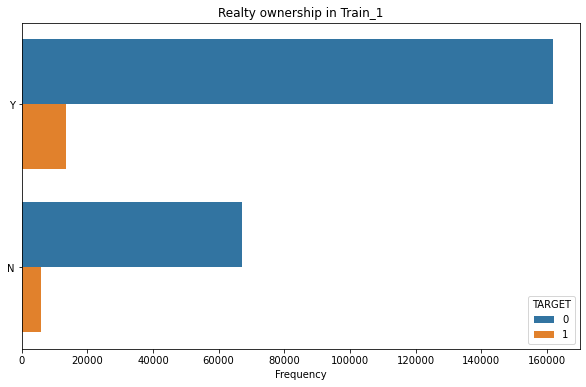

In [63]:
print('For Train_1:')

proportion(train_1, 'FLAG_OWN_REALTY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_OWN_REALTY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Realty ownership in Train_1');

For Train_2:
Proportion of defaults in N is 5.8%
Proportion of defaults in Y is 6.0%


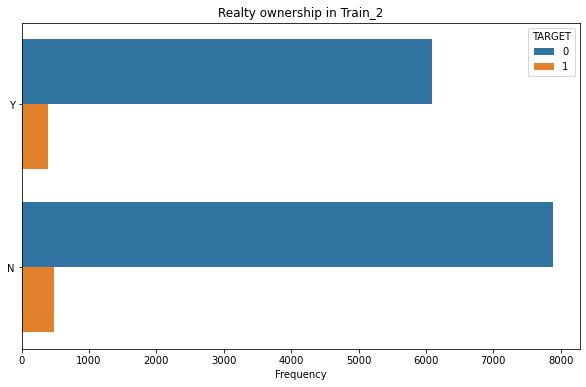

In [64]:
print('For Train_2:')

proportion(train_2, 'FLAG_OWN_REALTY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_OWN_REALTY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Realty ownership in Train_2');

For Train_3:
Proportion of defaults in N is 10.9%
Proportion of defaults in Y is 10.1%


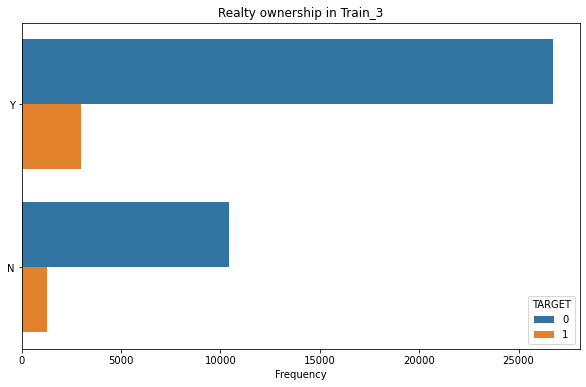

In [65]:
print('For Train_3:')

proportion(train_3, 'FLAG_OWN_REALTY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_OWN_REALTY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Realty ownership in Train_3');

For Train_4:
Proportion of defaults in N is 6.9%
Proportion of defaults in Y is 7.7%


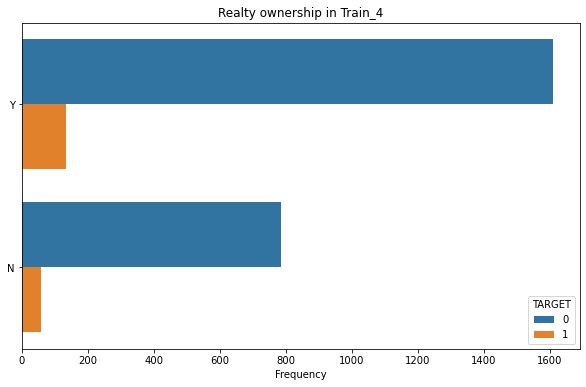

In [66]:
print('For Train_4:')

proportion(train_4, 'FLAG_OWN_REALTY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_OWN_REALTY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Realty ownership in Train_4');

Having realty seems to give mixed signals as default proportion rates can be  higher for those who owns realty (train_2 and train_4), but in other groups (train_1 and train_3), having realty lowers is found to have lower default rates. This is different from the previous feature, where having a car was found to have consistently lower default rates.  
For now, let's convert to a binary class with N = 0 and Y = 1:

In [67]:
realty = {'N': 0, 'Y': 1}

# loop through every train and test set
for df_train in train_set:
    df_train['FLAG_OWN_REALTY'].replace(realty, inplace=True)
    
for df_test in test_set:
    df_test['FLAG_OWN_REALTY'].replace(realty, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### 4.5. NAME_EDUCATION_TYPE
`Education level of applicant`
<br>
[top](#Contents)

In [68]:
for df_train in train_set:
    print(df_train['NAME_EDUCATION_TYPE'].value_counts())
    print()

Secondary / secondary special    177474
Higher education                  59960
Incomplete higher                  8090
Lower secondary                    2974
Academic degree                     134
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special    8255
Higher education                 6015
Incomplete higher                 456
Lower secondary                   123
Academic degree                    10
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special    31321
Higher education                  7775
Incomplete higher                 1621
Lower secondary                    697
Academic degree                     19
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special    1341
Higher education                 1113
Incomplete higher                 110
Lower secondary                    22
Academic degree                     1
Name: NAME_EDUCATION_TYPE, dtype: int64



For Train_1:
Proportion of defaults in Academic degree is 2.2%
Proportion of defaults in Higher education is 5.4%
Proportion of defaults in Incomplete higher is 8.2%
Proportion of defaults in Lower secondary is 10.8%
Proportion of defaults in Secondary / secondary special is 8.6%


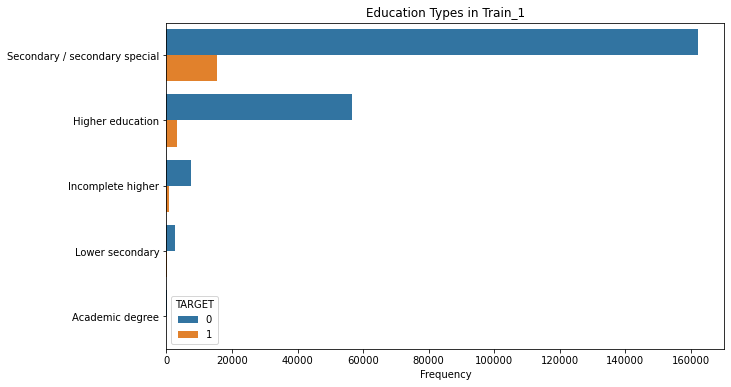

In [69]:
print('For Train_1:')

proportion(train_1, 'NAME_EDUCATION_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_EDUCATION_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Education Types in Train_1');

For Train_2:
Proportion of defaults in Higher education is 4.1%
Proportion of defaults in Incomplete higher is 6.4%
Proportion of defaults in Lower secondary is 7.3%
Proportion of defaults in Secondary / secondary special is 7.1%


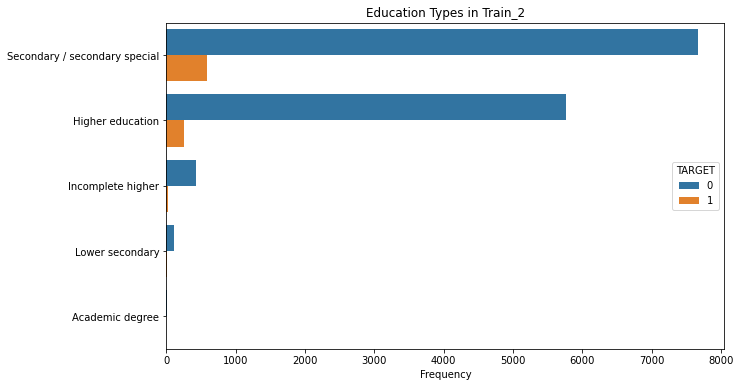

In [70]:
print('For Train_2:')

proportion(train_2, 'NAME_EDUCATION_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_EDUCATION_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Education Types in Train_2');

For Train_3:
Proportion of defaults in Higher education is 6.5%
Proportion of defaults in Incomplete higher is 10.4%
Proportion of defaults in Lower secondary is 12.1%
Proportion of defaults in Secondary / secondary special is 11.2%


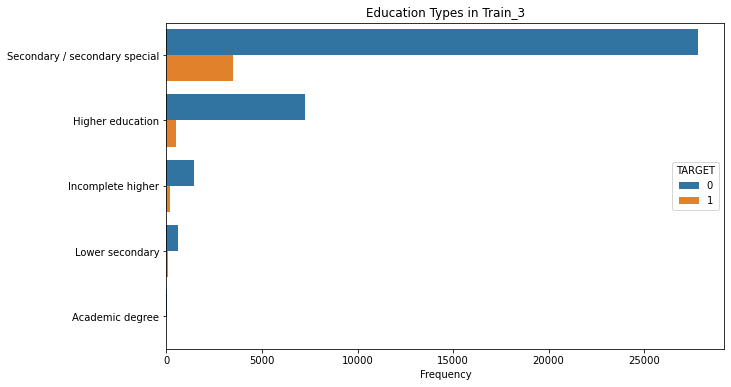

In [71]:
print('For Train_3:')

proportion(train_3, 'NAME_EDUCATION_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_EDUCATION_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Education Types in Train_3');

For Train_4:
Proportion of defaults in Higher education is 3.6%
Proportion of defaults in Incomplete higher is 10.0%
Proportion of defaults in Lower secondary is 18.2%
Proportion of defaults in Secondary / secondary special is 10.2%


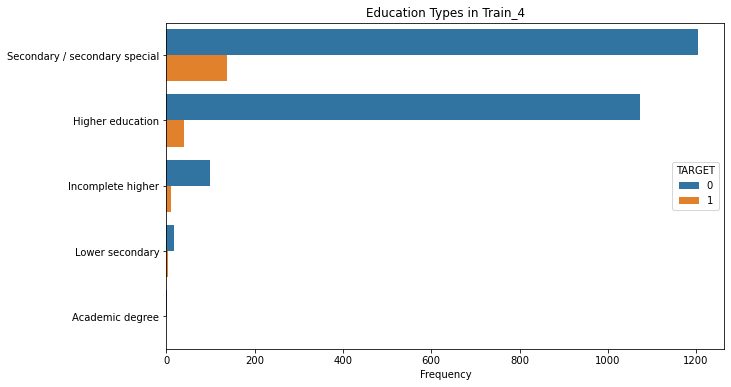

In [72]:
print('For Train_4:')

proportion(train_4, 'NAME_EDUCATION_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_EDUCATION_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Education Types in Train_4');

In every group, proportion of default in `Higher education` tends to be much lower than the rest. The same is somewhat true in the `Incomplete higher` education group but to a much lesser degree. We convert this feature into numerical values:

In [73]:
# conversion dictionary
edu_type = {'NA': 0, 'Lower secondary':1, 'Secondary / secondary special': 2, 
            'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5}

# loop through every train and test set
for df_train in train_set:
    df_train['NAME_EDUCATION_TYPE'].fillna('NA', inplace=True)
    df_train['NAME_EDUCATION_TYPE'].replace(edu_type, inplace=True)
    
for df_test in test_set:
    df_test['NAME_EDUCATION_TYPE'].fillna('NA', inplace=True)
    df_test['NAME_EDUCATION_TYPE'].replace(edu_type, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [74]:
train_4['NAME_EDUCATION_TYPE']

20        2
120       4
203       2
242       4
403       2
         ..
306507    2
306545    4
306871    4
307078    2
307387    2
Name: NAME_EDUCATION_TYPE, Length: 2587, dtype: int64

### 4.6. NAME_TYPE_SUITE
`Who accompanied borrower when they came to apply for loan`
<br>
[top](#Contents)

In [75]:
for df_train in train_set:
    print(df_train['NAME_TYPE_SUITE'].value_counts())
    print()

Unaccompanied      202025
Family              32291
Spouse, partner      8872
Children             2572
Other_B              1338
Other_A               649
Group of people       215
Name: NAME_TYPE_SUITE, dtype: int64

Unaccompanied      11588
Family              1785
Spouse, partner      655
Children             168
Other_B              112
Other_A               52
Group of people        9
Name: NAME_TYPE_SUITE, dtype: int64

Unaccompanied      32814
Family              5774
Spouse, partner     1746
Children             496
Other_B              301
Other_A              154
Group of people       44
Name: NAME_TYPE_SUITE, dtype: int64

Unaccompanied      2099
Family              299
Spouse, partner      97
Children             31
Other_B              19
Other_A              11
Group of people       3
Name: NAME_TYPE_SUITE, dtype: int64



In [76]:
# There are a number of missing values, assumed that these were actually 'Unaccompanied'
for df_train in train_set:
    df_train['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
    
for df_test in test_set:
    df_test['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

For Train_1:
Proportion of defaults in Children is 7.0%
Proportion of defaults in Family is 7.3%
Proportion of defaults in Group of people is 7.0%
Proportion of defaults in Other_A is 9.2%
Proportion of defaults in Other_B is 9.3%
Proportion of defaults in Spouse, partner is 7.8%
Proportion of defaults in Unaccompanied is 7.9%


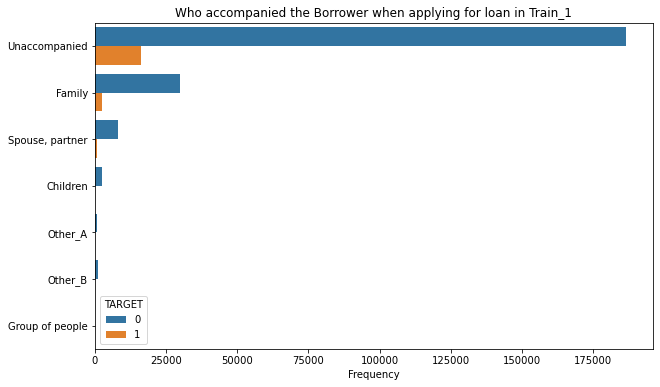

In [77]:
print('For Train_1:')
proportion(train_1, 'NAME_TYPE_SUITE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_TYPE_SUITE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Who accompanied the Borrower when applying for loan in Train_1');

For Train_2:
Proportion of defaults in Children is 6.5%
Proportion of defaults in Family is 5.2%
Proportion of defaults in Other_A is 5.8%
Proportion of defaults in Other_B is 6.2%
Proportion of defaults in Spouse, partner is 5.0%
Proportion of defaults in Unaccompanied is 6.0%


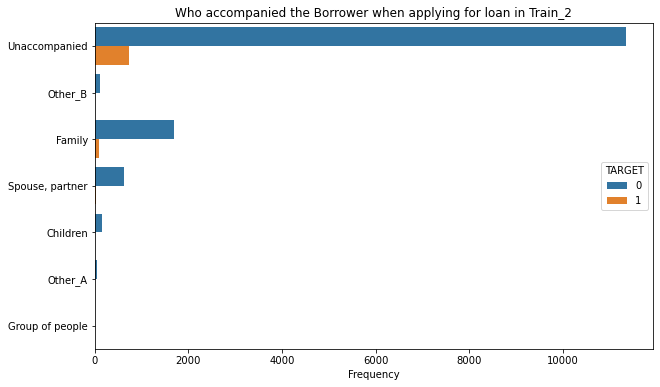

In [78]:
print('For Train_2:')
proportion(train_2, 'NAME_TYPE_SUITE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_TYPE_SUITE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Who accompanied the Borrower when applying for loan in Train_2');

For Train_3:
Proportion of defaults in Children is 9.3%
Proportion of defaults in Family is 9.1%
Proportion of defaults in Group of people is 15.9%
Proportion of defaults in Other_A is 7.8%
Proportion of defaults in Other_B is 14.0%
Proportion of defaults in Spouse, partner is 9.7%
Proportion of defaults in Unaccompanied is 10.5%


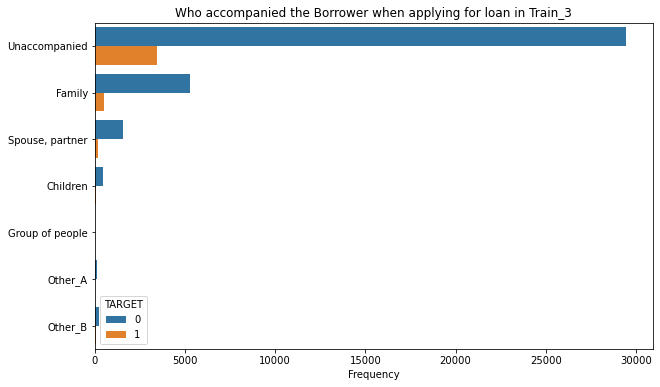

In [79]:
print('For Train_3:')
proportion(train_3, 'NAME_TYPE_SUITE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_TYPE_SUITE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Who accompanied the Borrower when applying for loan in Train_3');

For Train_4:
Proportion of defaults in Children is 9.7%
Proportion of defaults in Family is 8.0%
Proportion of defaults in Group of people is 33.3%
Proportion of defaults in Other_A is 9.1%
Proportion of defaults in Other_B is 5.3%
Proportion of defaults in Spouse, partner is 1.0%
Proportion of defaults in Unaccompanied is 7.6%


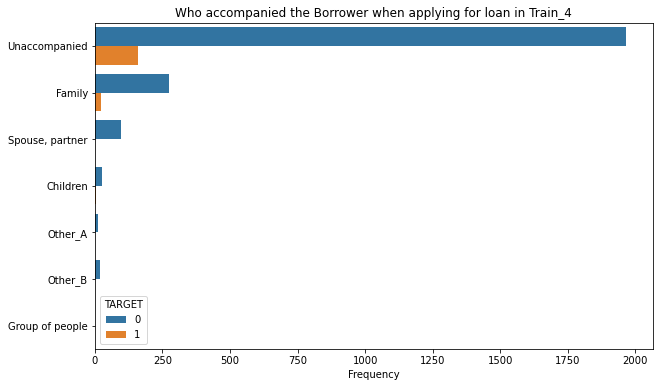

In [80]:
print('For Train_4:')
proportion(train_4, 'NAME_TYPE_SUITE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_TYPE_SUITE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Who accompanied the Borrower when applying for loan in Train_4');

For this feature, there wasn't much discernable trend as one particular category may have high default rates in one group but not the other. 

### 4.7. NAME_FAMILY_STATUS
`Martial status of applicant`
<br>
[top](#Contents)

In [81]:
for df_train in train_set:
    print(df_train['NAME_FAMILY_STATUS'].value_counts())
    print()

Married                 161361
Single / not married     34504
Civil marriage           23452
Separated                16220
Widow                    13095
Name: NAME_FAMILY_STATUS, dtype: int64

Married                 9264
Single / not married    2791
Civil marriage          1242
Separated                935
Widow                    626
Unknown                    1
Name: NAME_FAMILY_STATUS, dtype: int64

Married                 24274
Single / not married     7584
Civil marriage           4804
Separated                2487
Widow                    2284
Name: NAME_FAMILY_STATUS, dtype: int64

Married                 1533
Single / not married     565
Civil marriage           277
Separated                128
Widow                     83
Unknown                    1
Name: NAME_FAMILY_STATUS, dtype: int64



In [82]:
# there are some rows with 'Unknown', let's change that to 'Single / not married'
for df_train in train_set:
    df_train['NAME_FAMILY_STATUS'].replace('Unknown', 'Single / not married', inplace=True)
    
for df_test in test_set:
    df_test['NAME_FAMILY_STATUS'].replace('Unknown', 'Single / not married', inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


For Train_1:
Proportion of defaults in Civil marriage is 9.6%
Proportion of defaults in Married is 7.4%
Proportion of defaults in Separated is 7.8%
Proportion of defaults in Single / not married is 9.4%
Proportion of defaults in Widow is 5.5%


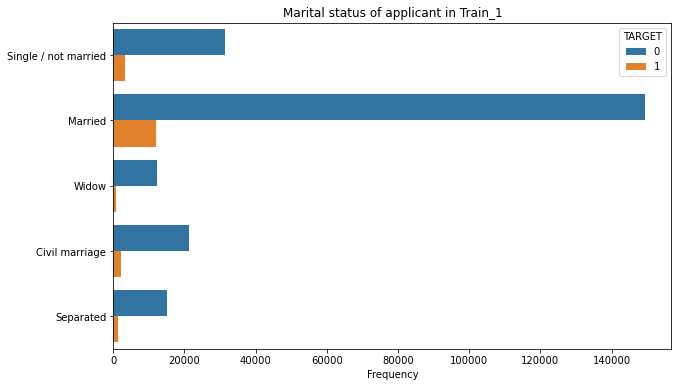

In [83]:
print('For Train_1:')
proportion(train_1, 'NAME_FAMILY_STATUS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_FAMILY_STATUS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Marital status of applicant in Train_1');

For Train_2:
Proportion of defaults in Civil marriage is 7.2%
Proportion of defaults in Married is 5.4%
Proportion of defaults in Separated is 7.7%
Proportion of defaults in Single / not married is 6.2%
Proportion of defaults in Widow is 6.4%


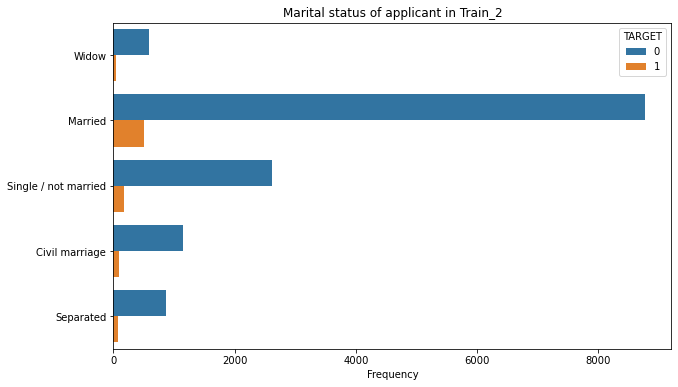

In [84]:
print('For Train_2:')
proportion(train_2, 'NAME_FAMILY_STATUS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_FAMILY_STATUS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Marital status of applicant in Train_2');

For Train_3:
Proportion of defaults in Civil marriage is 12.4%
Proportion of defaults in Married is 9.2%
Proportion of defaults in Separated is 10.9%
Proportion of defaults in Single / not married is 13.1%
Proportion of defaults in Widow is 7.5%


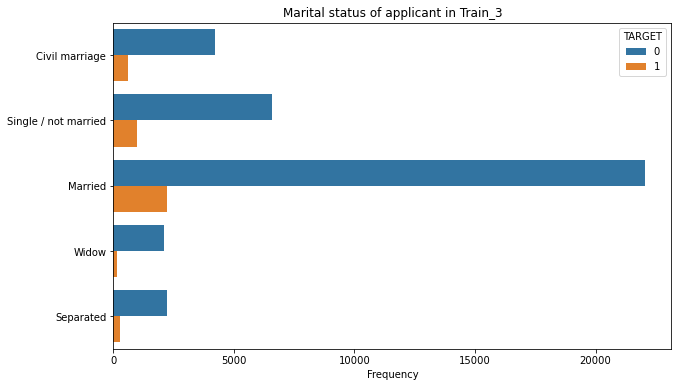

In [85]:
print('For Train_3:')
proportion(train_3, 'NAME_FAMILY_STATUS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_FAMILY_STATUS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Marital status of applicant in Train_3');

For Train_4:
Proportion of defaults in Civil marriage is 11.6%
Proportion of defaults in Married is 6.6%
Proportion of defaults in Separated is 6.2%
Proportion of defaults in Single / not married is 7.8%
Proportion of defaults in Widow is 8.4%


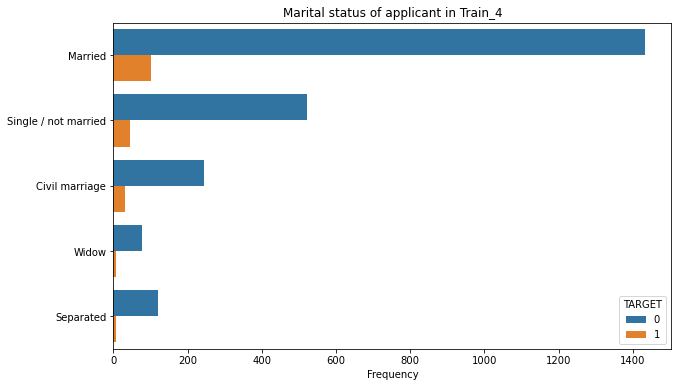

In [86]:
print('For Train_4:')
proportion(train_4, 'NAME_FAMILY_STATUS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_FAMILY_STATUS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Marital status of applicant in Train_4');

In general, single / not married groups tends to have higher default rates, although the default rates of Civil marriage group is tends to be high as well.

### 4.8. NAME_HOUSING_TYPE
`type of housing applicant lives in`
<br>
[top](#Contents)

In [87]:
for df_train in train_set:
    print(df_train['NAME_HOUSING_TYPE'].value_counts())
    print()

House / apartment      221222
With parents            11505
Municipal apartment      9093
Rented apartment         3743
Office apartment         2144
Co-op apartment           925
Name: NAME_HOUSING_TYPE, dtype: int64

House / apartment      13418
With parents             643
Municipal apartment      407
Rented apartment         205
Office apartment         123
Co-op apartment           63
Name: NAME_HOUSING_TYPE, dtype: int64

House / apartment      35946
With parents            2524
Municipal apartment     1619
Rented apartment         884
Office apartment         330
Co-op apartment          130
Name: NAME_HOUSING_TYPE, dtype: int64

House / apartment      2282
With parents            168
Municipal apartment      64
Rented apartment         49
Office apartment         20
Co-op apartment           4
Name: NAME_HOUSING_TYPE, dtype: int64



For Train_1:
Proportion of defaults in Co-op apartment is 7.2%
Proportion of defaults in House / apartment is 7.6%
Proportion of defaults in Municipal apartment is 8.2%
Proportion of defaults in Office apartment is 6.4%
Proportion of defaults in Rented apartment is 12.1%
Proportion of defaults in With parents is 11.4%


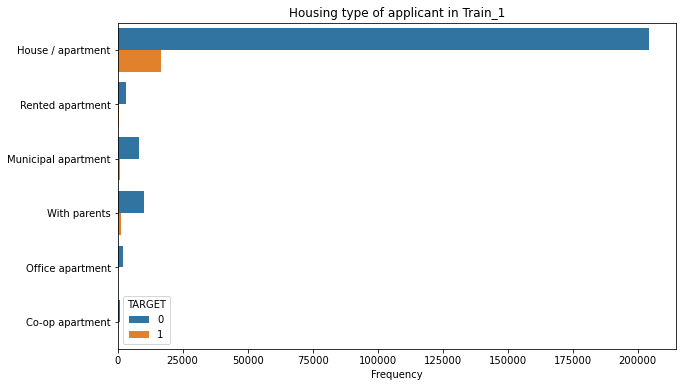

In [88]:
print('For Train_1:')
proportion(train_1, 'NAME_HOUSING_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_HOUSING_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Housing type of applicant in Train_1');

For Train_2:
Proportion of defaults in Co-op apartment is 4.8%
Proportion of defaults in House / apartment is 5.8%
Proportion of defaults in Municipal apartment is 6.4%
Proportion of defaults in Office apartment is 3.3%
Proportion of defaults in Rented apartment is 6.8%
Proportion of defaults in With parents is 8.2%


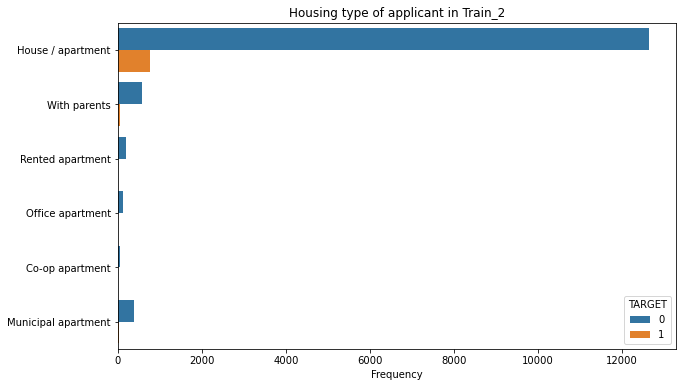

In [89]:
print('For Train_2:')
proportion(train_2, 'NAME_HOUSING_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_HOUSING_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Housing type of applicant in Train_2');

For Train_3:
Proportion of defaults in Co-op apartment is 14.6%
Proportion of defaults in House / apartment is 9.9%
Proportion of defaults in Municipal apartment is 10.7%
Proportion of defaults in Office apartment is 9.4%
Proportion of defaults in Rented apartment is 14.3%
Proportion of defaults in With parents is 13.9%


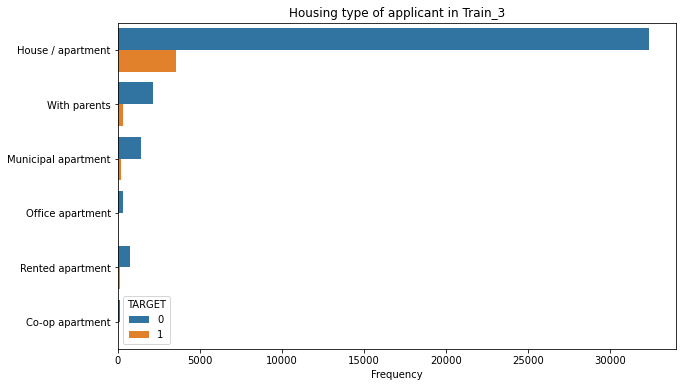

In [90]:
print('For Train_3:')
proportion(train_3, 'NAME_HOUSING_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_HOUSING_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Housing type of applicant in Train_3');

For Train_4:
Proportion of defaults in House / apartment is 7.2%
Proportion of defaults in Municipal apartment is 7.8%
Proportion of defaults in Rented apartment is 14.3%
Proportion of defaults in With parents is 9.5%


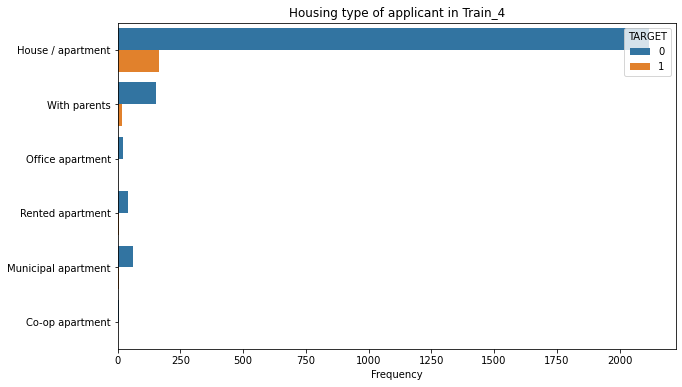

In [91]:
print('For Train_4:')
proportion(train_4, 'NAME_HOUSING_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_HOUSING_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Housing type of applicant in Train_4');

Majority of the applicants stay in the `House / apartment` category. The categories `With parents` and `Rented apartment` tend to have higher default rates wihch is consistent across all groups. 

In [92]:
for df_train in train_set:
    df_train['NAME_HOUSING_TYPE_CONVERT'] = df_train['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x=='House / apartment' else 0)
    
for df_test in test_set:
    df_test['NAME_HOUSING_TYPE_CONVERT'] = df_test['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x=='House / apartment' else 0)

<ipython-input-92-b22f68e5fc0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NAME_HOUSING_TYPE_CONVERT'] = df_train['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x=='House / apartment' else 0)
<ipython-input-92-b22f68e5fc0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NAME_HOUSING_TYPE_CONVERT'] = df_test['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x=='House / apartment' else 0)


### 4.9. WEEKDAY_APPR_PROCESS_START
`Which day did client apply for loan`
<br>
[top](#Contents)

In [93]:
for df_train in train_set:
    print(df_train['WEEKDAY_APPR_PROCESS_START'].value_counts())
    print()

WEDNESDAY    42621
TUESDAY      42408
FRIDAY       41111
THURSDAY     40972
MONDAY       40521
SATURDAY     28026
SUNDAY       12973
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

WEDNESDAY    2714
THURSDAY     2584
TUESDAY      2571
FRIDAY       2515
MONDAY       2394
SATURDAY     1428
SUNDAY        653
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

TUESDAY      8428
MONDAY       7375
THURSDAY     6580
FRIDAY       6282
WEDNESDAY    6149
SATURDAY     4186
SUNDAY       2433
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

TUESDAY      494
THURSDAY     455
WEDNESDAY    450
FRIDAY       430
MONDAY       424
SATURDAY     212
SUNDAY       122
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64



For Train_1:
Proportion of defaults in FRIDAY is 8.0%
Proportion of defaults in MONDAY is 7.6%
Proportion of defaults in SATURDAY is 7.6%
Proportion of defaults in SUNDAY is 7.7%
Proportion of defaults in THURSDAY is 7.9%
Proportion of defaults in TUESDAY is 8.0%
Proportion of defaults in WEDNESDAY is 7.9%


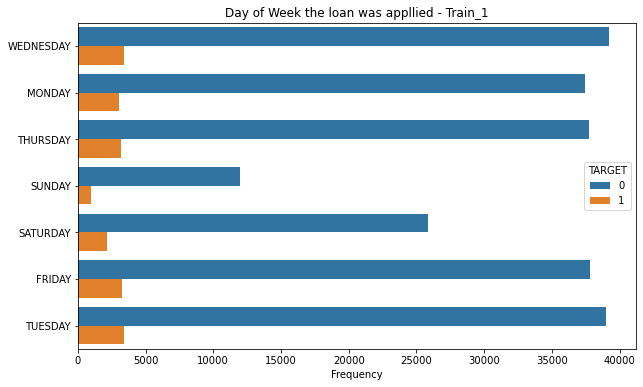

In [94]:
print('For Train_1:')
proportion(train_1, 'WEEKDAY_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='WEEKDAY_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Day of Week the loan was appllied - Train_1');

For Train_2:
Proportion of defaults in FRIDAY is 6.4%
Proportion of defaults in MONDAY is 6.6%
Proportion of defaults in SATURDAY is 6.0%
Proportion of defaults in SUNDAY is 4.9%
Proportion of defaults in THURSDAY is 6.0%
Proportion of defaults in TUESDAY is 4.9%
Proportion of defaults in WEDNESDAY is 5.7%


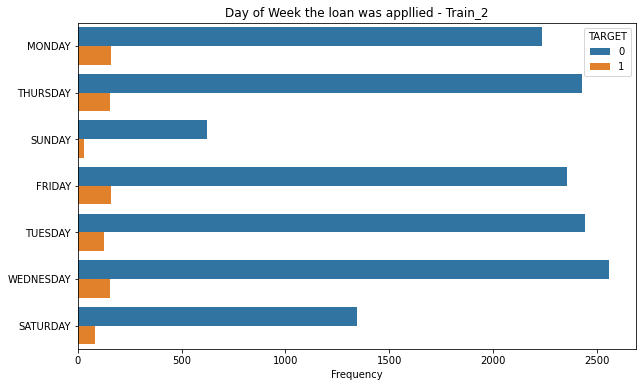

In [95]:
print('For Train_2:')
proportion(train_2, 'WEEKDAY_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='WEEKDAY_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Day of Week the loan was appllied - Train_2');

For Train_3:
Proportion of defaults in FRIDAY is 10.2%
Proportion of defaults in MONDAY is 9.1%
Proportion of defaults in SATURDAY is 10.3%
Proportion of defaults in SUNDAY is 10.1%
Proportion of defaults in THURSDAY is 10.5%
Proportion of defaults in TUESDAY is 10.8%
Proportion of defaults in WEDNESDAY is 10.9%


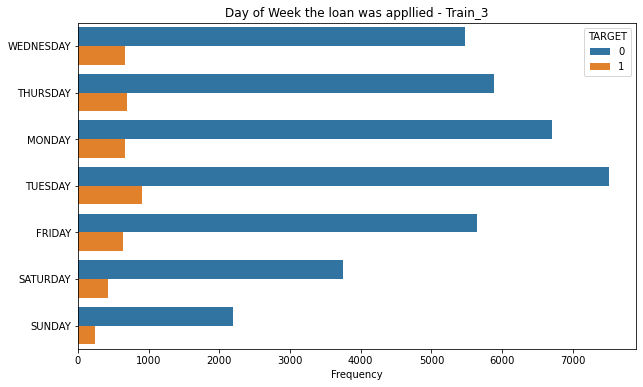

In [96]:
print('For Train_3:')
proportion(train_3, 'WEEKDAY_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='WEEKDAY_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Day of Week the loan was appllied - Train_3');

For Train_4:
Proportion of defaults in FRIDAY is 6.7%
Proportion of defaults in MONDAY is 7.3%
Proportion of defaults in SATURDAY is 7.5%
Proportion of defaults in SUNDAY is 4.9%
Proportion of defaults in THURSDAY is 6.8%
Proportion of defaults in TUESDAY is 9.5%
Proportion of defaults in WEDNESDAY is 7.1%


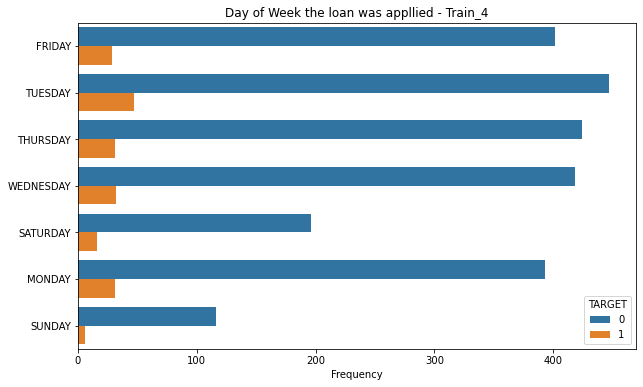

In [97]:
print('For Train_4:')
proportion(train_4, 'WEEKDAY_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='WEEKDAY_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Day of Week the loan was appllied - Train_4');

In general, Sunday has the lowest default rates. This is true except for group 3 which had the second lowest default rate instead. Additionally, weekends (saturday and sunday) usually have lower applications compared to the weekdays. 

### 4.10. FLAG_MOBIL
`Does the applicant provie a mobile phone number`
<br>
[top](#Contents)

In [98]:
for df_train in train_set:
    print(df_train['FLAG_MOBIL'].value_counts())
    print()

1    248632
Name: FLAG_MOBIL, dtype: int64

1    14859
Name: FLAG_MOBIL, dtype: int64

1    41433
Name: FLAG_MOBIL, dtype: int64

1    2586
0       1
Name: FLAG_MOBIL, dtype: int64



Interestingly, all but one applicant provide a mobile phone number. Hence there is no variance here to investigate. Let's look at another related feature - FLAG_CONT_MOBILE

### 4.11. FLAG_CONT_MOBILE
`Was the mobile phone reachable?`
<br>
[top](#Contents)

In [99]:
for df_train in train_set:
    print(df_train['FLAG_CONT_MOBILE'].value_counts())
    print()

1    248469
0       163
Name: FLAG_CONT_MOBILE, dtype: int64

1    14491
0      368
Name: FLAG_CONT_MOBILE, dtype: int64

1    41398
0       35
Name: FLAG_CONT_MOBILE, dtype: int64

1    2579
0       8
Name: FLAG_CONT_MOBILE, dtype: int64



For Train_1:
Proportion of defaults in 0 is 4.9%
Proportion of defaults in 1 is 7.8%


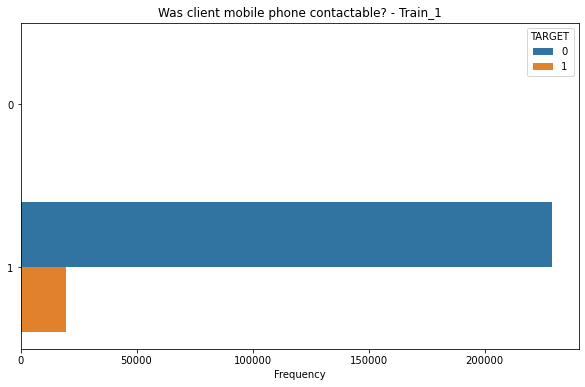

In [100]:
print('For Train_1:')
proportion(train_1, 'FLAG_CONT_MOBILE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_CONT_MOBILE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Was client mobile phone contactable? - Train_1');

For Train_2:
Proportion of defaults in 0 is 7.9%
Proportion of defaults in 1 is 5.8%


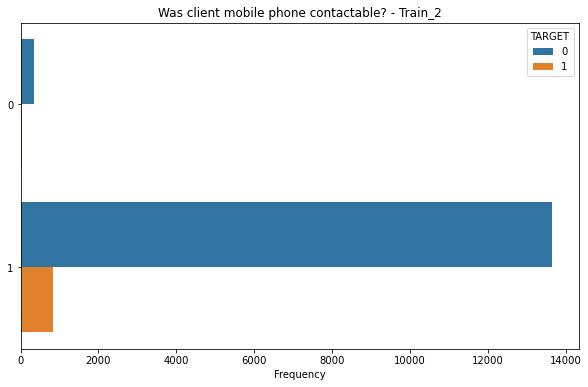

In [101]:
print('For Train_2:')
proportion(train_2, 'FLAG_CONT_MOBILE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_CONT_MOBILE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Was client mobile phone contactable? - Train_2');

For Train_3:
Proportion of defaults in 0 is 22.9%
Proportion of defaults in 1 is 10.3%


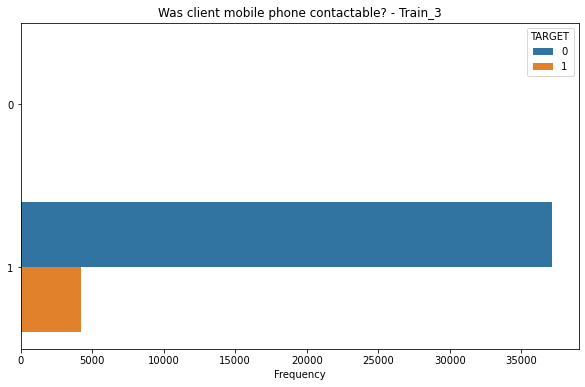

In [102]:
print('For Train_3:')
proportion(train_3, 'FLAG_CONT_MOBILE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_CONT_MOBILE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Was client mobile phone contactable? - Train_3');

For Train_4:
Proportion of defaults in 1 is 7.4%


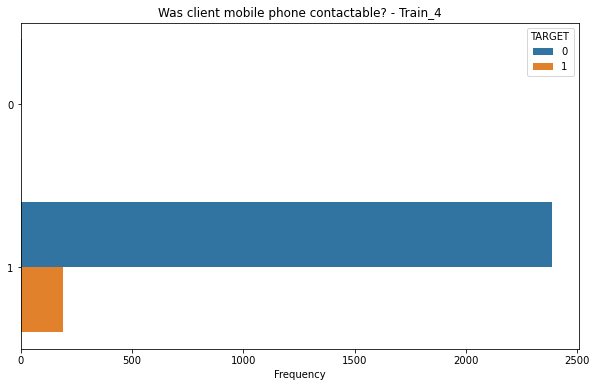

In [103]:
print('For Train_4:')

prop = train_4['FLAG_CONT_MOBILE'].loc[train_4['TARGET']==1].value_counts()[1]/train_4['FLAG_CONT_MOBILE'].value_counts()[1]
print(f"Proportion of defaults in 1 is {round((prop*100),1)}%")

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_CONT_MOBILE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Was client mobile phone contactable? - Train_4');

Providing a valid and contactable mobile phone number actually seem to increase the default rates except for group 1. This might be counter - intuitive and there might be other factors that affect this, hence we might not want to include this feature. 
Let's explore other related features, work phone, home phone, and email

### 4.12. FLAG_EMP_PHONE
`Did applicant provide employer or office phone`
<br>
[top](#Contents)

In [104]:
for df_train in train_set:
    print(df_train['FLAG_EMP_PHONE'].value_counts())
    print()

1    204104
0     44528
Name: FLAG_EMP_PHONE, dtype: int64

1    12365
0     2494
Name: FLAG_EMP_PHONE, dtype: int64

1    33551
0     7882
Name: FLAG_EMP_PHONE, dtype: int64

1    2105
0     482
Name: FLAG_EMP_PHONE, dtype: int64



In [105]:
train_1['FLAG_EMP_PHONE'].loc[train_1['TARGET']==1].value_counts()                            

1    17196
0     2298
Name: FLAG_EMP_PHONE, dtype: int64

In [106]:
train_1['FLAG_EMP_PHONE'].value_counts()

1    204104
0     44528
Name: FLAG_EMP_PHONE, dtype: int64

In [107]:
17195/204103

0.08424667937266968

For Train_1:
Proportion of defaults in 0 is 5.2%
Proportion of defaults in 1 is 8.4%


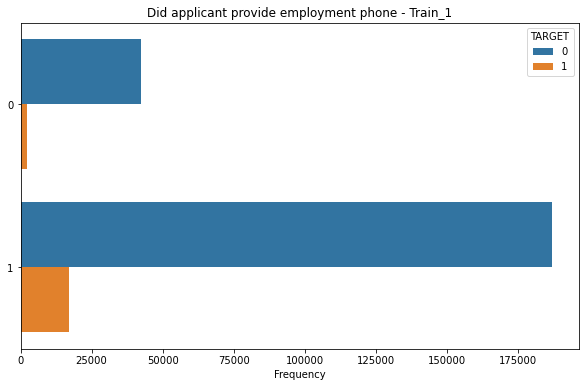

In [108]:
print('For Train_1:')
proportion(train_1, 'FLAG_EMP_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_EMP_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide employment phone - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.3%
Proportion of defaults in 1 is 6.0%


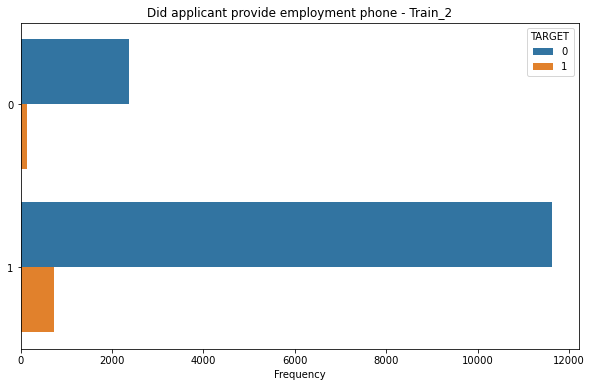

In [109]:
print('For Train_2:')
proportion(train_2, 'FLAG_EMP_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_EMP_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide employment phone - Train_2');

For Train_3:
Proportion of defaults in 0 is 6.8%
Proportion of defaults in 1 is 11.1%


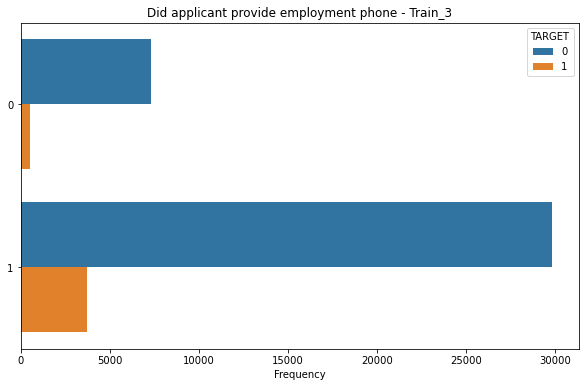

In [110]:
print('For Train_3:')
proportion(train_3, 'FLAG_EMP_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_EMP_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide employment phone - Train_3');

For Train_4:
Proportion of defaults in 0 is 4.6%
Proportion of defaults in 1 is 8.1%


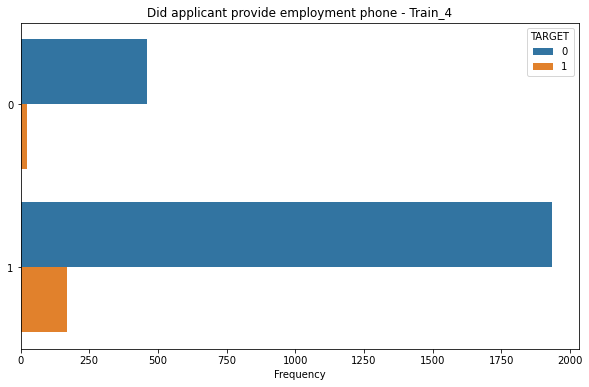

In [111]:
print('For Train_4:')
proportion(train_4, 'FLAG_EMP_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_EMP_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide employment phone - Train_4');

Interestingly, providing a office phone number seem to give a clear trend in default rates as those who provided tend to have higher defaults. 

### 4.13. FLAG_WORK_PHONE
`Did applicant provide work phone`
<br>
[top](#Contents)

In [112]:
for df_train in train_set:
    print(df_train['FLAG_WORK_PHONE'].value_counts())
    print()

0    199259
1     49373
Name: FLAG_WORK_PHONE, dtype: int64

0    12016
1     2843
Name: FLAG_WORK_PHONE, dtype: int64

0    33020
1     8413
Name: FLAG_WORK_PHONE, dtype: int64

0    1908
1     679
Name: FLAG_WORK_PHONE, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.5%
Proportion of defaults in 1 is 9.3%


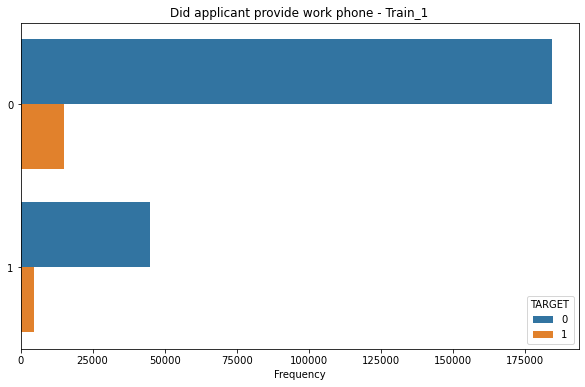

In [113]:
print('For Train_1:')
proportion(train_1, 'FLAG_WORK_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_WORK_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide work phone - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.6%
Proportion of defaults in 1 is 6.9%


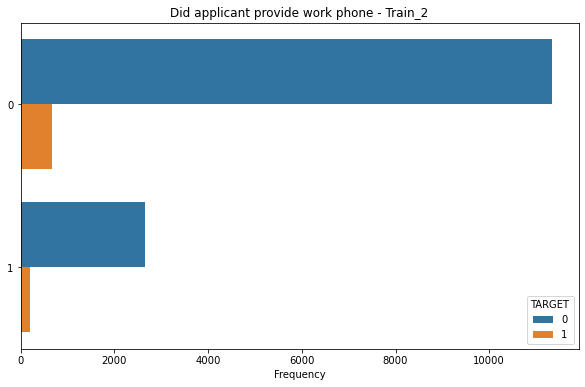

In [114]:
print('For Train_2:')
proportion(train_2, 'FLAG_WORK_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_WORK_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide work phone - Train_2');

For Train_3:
Proportion of defaults in 0 is 9.8%
Proportion of defaults in 1 is 12.4%


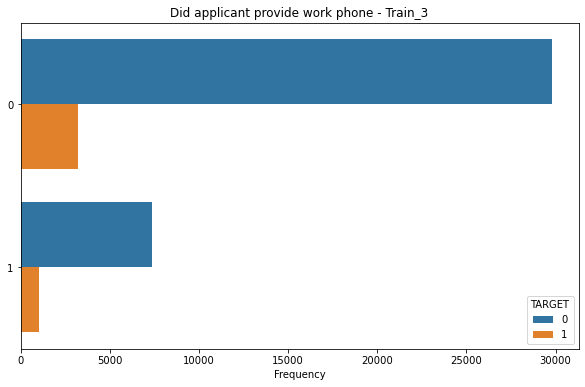

In [115]:
print('For Train_3:')
proportion(train_3, 'FLAG_WORK_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_WORK_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide work phone - Train_3');

For Train_4:
Proportion of defaults in 0 is 5.6%
Proportion of defaults in 1 is 12.5%


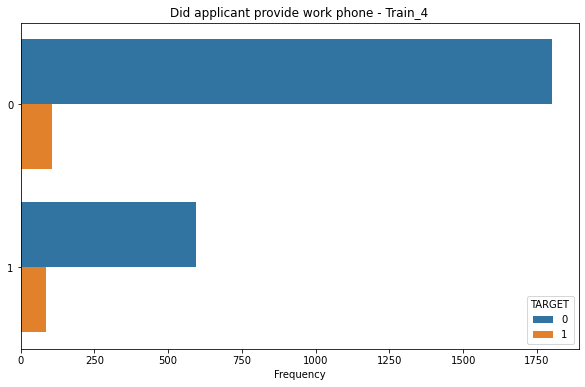

In [116]:
print('For Train_4:')
proportion(train_4, 'FLAG_WORK_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_WORK_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide work phone - Train_4');

Similarly, those who provided work phones were found to have higher default rates in all groups. 

### 4.14. FLAG_PHONE
`Did applicant provide home phone`
<br>
[top](#Contents)

This was also listed in the description as whether the applicant provided home phone. 

In [117]:
for df_train in train_set:
    print(df_train['FLAG_PHONE'].value_counts())
    print()

0    177399
1     71233
Name: FLAG_PHONE, dtype: int64

0    10949
1     3910
Name: FLAG_PHONE, dtype: int64

0    30794
1    10639
Name: FLAG_PHONE, dtype: int64

0    1938
1     649
Name: FLAG_PHONE, dtype: int64



For Train_1:
Proportion of defaults in 0 is 8.2%
Proportion of defaults in 1 is 6.8%


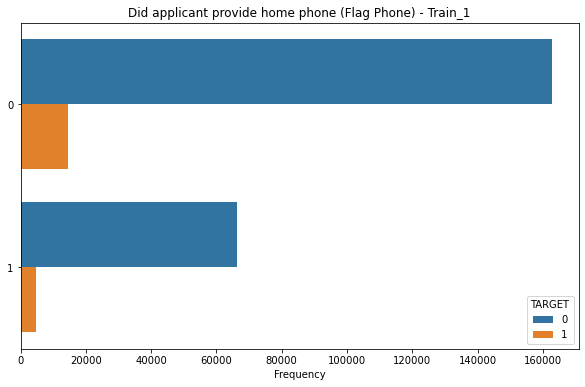

In [118]:
print('For Train_1:')
proportion(train_1, 'FLAG_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide home phone (Flag Phone) - Train_1');

For Train_2:
Proportion of defaults in 0 is 6.1%
Proportion of defaults in 1 is 5.2%


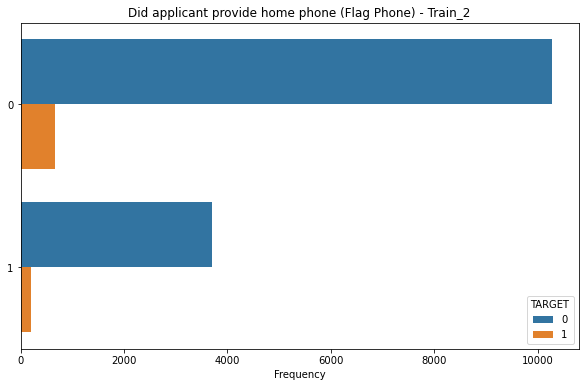

In [119]:
print('For Train_2:')
proportion(train_2, 'FLAG_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide home phone (Flag Phone) - Train_2');

For Train_3:
Proportion of defaults in 0 is 10.7%
Proportion of defaults in 1 is 9.2%


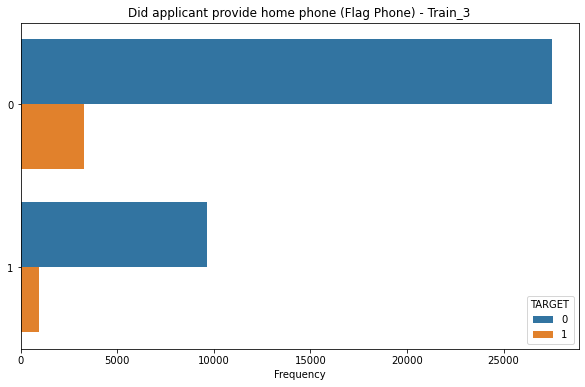

In [120]:
print('For Train_3:')
proportion(train_3, 'FLAG_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide home phone (Flag Phone) - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 6.2%


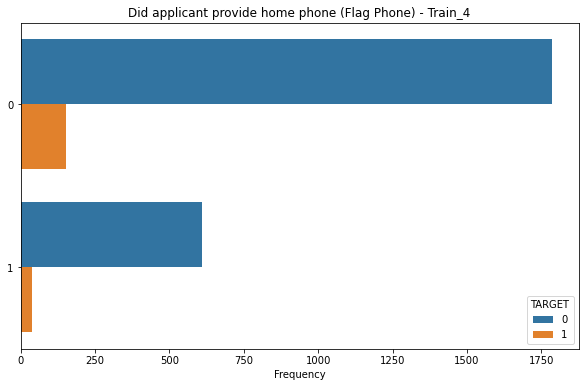

In [121]:
print('For Train_4:')
proportion(train_4, 'FLAG_PHONE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_PHONE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide home phone (Flag Phone) - Train_4');

Applicants who provided home phone here were found to have lower default rates across all groups. 

### 4.15. FLAG_EMAIL
`Did applicant provide email`
<br>
[top](#Contents)


In [122]:
for df_train in train_set:
    print(df_train['FLAG_EMAIL'].value_counts())
    print()

0    233836
1     14796
Name: FLAG_EMAIL, dtype: int64

0    14393
1      466
Name: FLAG_EMAIL, dtype: int64

0    39349
1     2084
Name: FLAG_EMAIL, dtype: int64

0    2491
1      96
Name: FLAG_EMAIL, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 7.8%


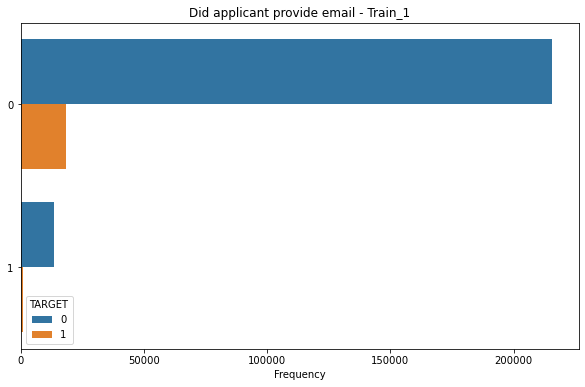

In [123]:
print('For Train_1:')
proportion(train_1, 'FLAG_EMAIL')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FLAG_EMAIL', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide email - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.9%
Proportion of defaults in 1 is 5.6%


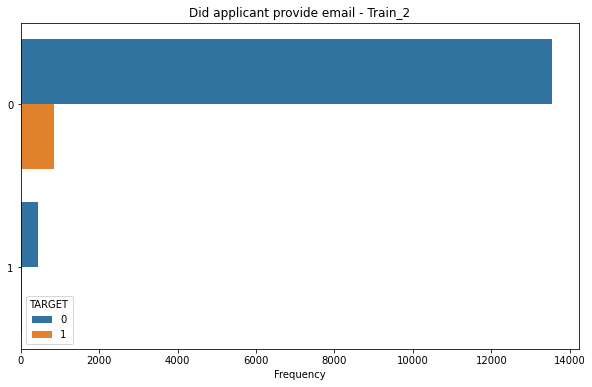

In [124]:
print('For Train_2:')
proportion(train_2, 'FLAG_EMAIL')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FLAG_EMAIL', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide email - Train_2');

For Train_3:
Proportion of defaults in 0 is 10.4%
Proportion of defaults in 1 is 9.2%


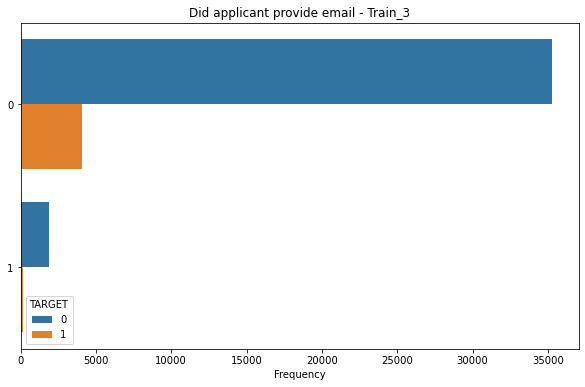

In [125]:
print('For Train_3:')
proportion(train_3, 'FLAG_EMAIL')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FLAG_EMAIL', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide email - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.4%
Proportion of defaults in 1 is 7.3%


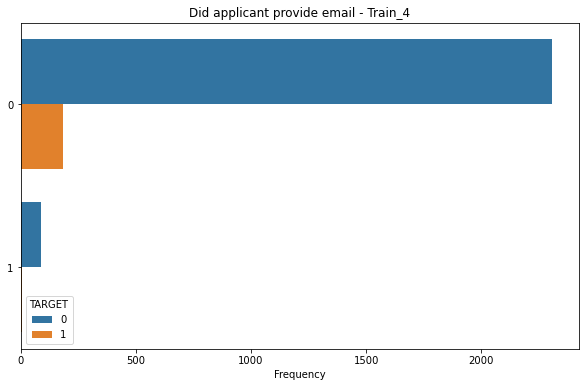

In [126]:
print('For Train_4:')
proportion(train_4, 'FLAG_EMAIL')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FLAG_EMAIL', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Did applicant provide email - Train_4');

Providing email might not be a strong indicator of detecting default rates as the proportion of default rates were similar across all groups except for group 3. 

### 4.16. NAME_INCOME_TYPE
`Income type of applicant`
<br>
[top](#Contents)


In [127]:
for df_train in train_set:
    print(df_train['NAME_INCOME_TYPE'].value_counts())
    print()

Working                 129809
Commercial associate     55885
Pensioner                44529
State servant            18397
Student                     11
Unemployed                   1
Name: NAME_INCOME_TYPE, dtype: int64

Working                 6035
Commercial associate    5329
Pensioner               2489
State servant            994
Unemployed                 4
Student                    4
Businessman                3
Maternity leave            1
Name: NAME_INCOME_TYPE, dtype: int64

Working                 21958
Commercial associate     9389
Pensioner                7865
State servant            2203
Unemployed                 15
Maternity leave             2
Student                     1
Name: NAME_INCOME_TYPE, dtype: int64

Commercial associate    1014
Working                  972
Pensioner                479
State servant            109
Businessman                7
Unemployed                 2
Student                    2
Maternity leave            2
Name: NAME_INCOME_TYPE, dt

For Train_1:
Proportion of defaults in Commercial associate is 7.4%
Proportion of defaults in Pensioner is 5.2%
Proportion of defaults in State servant is 5.6%
Proportion of defaults in Working is 9.3%


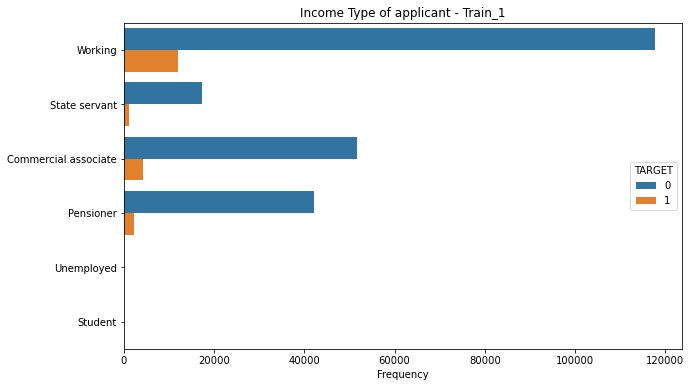

In [128]:
print('For Train_1:')
proportion(train_1, 'NAME_INCOME_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='NAME_INCOME_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Income Type of applicant - Train_1');

For Train_2:
Proportion of defaults in Commercial associate is 4.9%
Proportion of defaults in Pensioner is 5.3%
Proportion of defaults in State servant is 4.6%
Proportion of defaults in Working is 7.2%


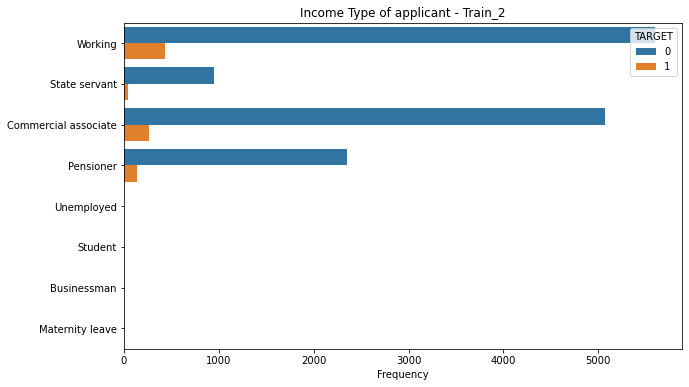

In [129]:
print('For Train_2:')
proportion(train_2, 'NAME_INCOME_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='NAME_INCOME_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Income Type of applicant - Train_2');

For Train_3:
Proportion of defaults in Commercial associate is 9.4%
Proportion of defaults in Maternity leave is 100.0%
Proportion of defaults in Pensioner is 6.7%
Proportion of defaults in State servant is 7.6%
Proportion of defaults in Unemployed is 53.3%
Proportion of defaults in Working is 12.2%


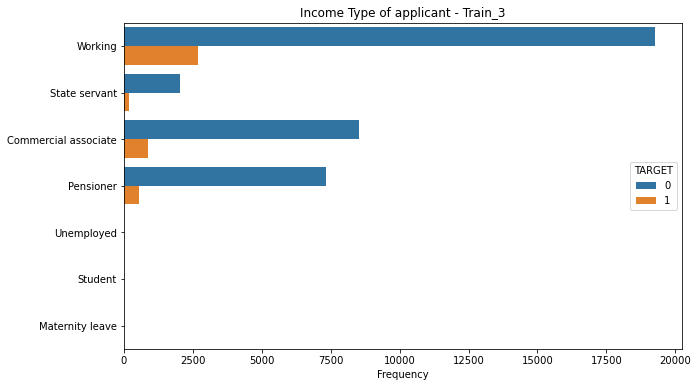

In [130]:
print('For Train_3:')
proportion(train_3, 'NAME_INCOME_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='NAME_INCOME_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Income Type of applicant - Train_3');

For Train_4:
Proportion of defaults in Commercial associate is 6.5%
Proportion of defaults in Pensioner is 4.6%
Proportion of defaults in State servant is 6.4%
Proportion of defaults in Working is 10.0%


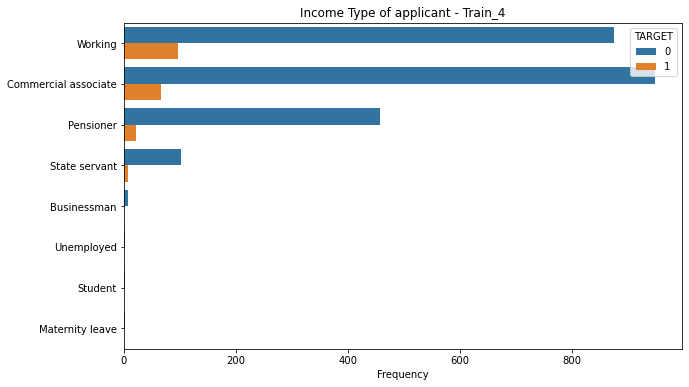

In [131]:
print('For Train_4:')
proportion(train_4, 'NAME_INCOME_TYPE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='NAME_INCOME_TYPE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Income Type of applicant - Train_4');

Typically, `Working` generally have a higher default rate compared to other categories even each segement, except for training set 3 whereby the Unemployed and Maternity categories had much higher default rates. Additionally, default rates for each category in training set 3 is higher compared to other training sets. This might suggests that the current working model in Home Credit seems to be biased towards repeat customers, perhaps the default probability rejection threshold is lowered for this group of customers, whereas the threshold is increased for new customers. Evidence of this is seen when comparing (train_1 vs train_2) and (train_3 vs train_4).
<br>

Across all categories, pensioners tend to have the lowest defaults followed by State servant and commercial associates. 
Let's convert to a 5-pt numerical scale:

In [132]:
to_convert = {'Pensioner': 1, 'State servant': 2, 'Commercial associate': 3,
              'Working': 4, 'Businessman': 4, 'Maternity leave': 5, 
              'Student': 5, 'Unemployed': 5}

for df_train in train_set:
    df_train['NAME_INCOME_TYPE'].replace(to_convert, inplace=True)
    
for df_test in test_set:
    df_test['NAME_INCOME_TYPE'].replace(to_convert, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### 4.17. REGION_RATING_CLIENT
`rating of the region where applicant lives`
<br>
[top](#Contents)

The description of this feature is very similar to the next feature `REGION_RATING_CLIENT_W_CITY`. Intuitively, I think that the former feature implies that the applicant is not living in the city and probably in a neighbouring town. Let's first find out if there are many entries that are different between these 2 features:


In [133]:
print(len(train_1.loc[train_1['REGION_RATING_CLIENT'] != train_1['REGION_RATING_CLIENT_W_CITY']]))
print(len(train_2.loc[train_2['REGION_RATING_CLIENT'] != train_2['REGION_RATING_CLIENT_W_CITY']]))
print(len(train_3.loc[train_3['REGION_RATING_CLIENT'] != train_3['REGION_RATING_CLIENT_W_CITY']]))
print(len(train_4.loc[train_4['REGION_RATING_CLIENT'] != train_4['REGION_RATING_CLIENT_W_CITY']]))

4623
257
785
53


In [134]:
print(len(train_1.loc[train_1['REGION_RATING_CLIENT'] != train_1['REGION_RATING_CLIENT_W_CITY']])/train_1.shape[0])
print(len(train_2.loc[train_2['REGION_RATING_CLIENT'] != train_2['REGION_RATING_CLIENT_W_CITY']])/train_2.shape[0])
print(len(train_3.loc[train_3['REGION_RATING_CLIENT'] != train_3['REGION_RATING_CLIENT_W_CITY']])/train_3.shape[0])
print(len(train_4.loc[train_4['REGION_RATING_CLIENT'] != train_4['REGION_RATING_CLIENT_W_CITY']])/train_4.shape[0])

0.018593744972489463
0.01729591493371021
0.018946250573214588
0.020487050637804406


Only about 2% or less of the rows had different values and having these 2 features together might end up adding a pair of highly collinear features into the model which we might not want. Let's examine their relationship to the target to see if we can choose one or the other:

In [135]:
for df_train in train_set:
    print(df_train['REGION_RATING_CLIENT'].value_counts())
    print()

2    184759
3     39576
1     24297
Name: REGION_RATING_CLIENT, dtype: int64

2    10761
1     2472
3     1626
Name: REGION_RATING_CLIENT, dtype: int64

2    29647
3     6890
1     4896
Name: REGION_RATING_CLIENT, dtype: int64

2    1817
1     532
3     238
Name: REGION_RATING_CLIENT, dtype: int64



For Train_1:
Proportion of defaults in 1 is 4.7%
Proportion of defaults in 2 is 7.7%
Proportion of defaults in 3 is 10.6%


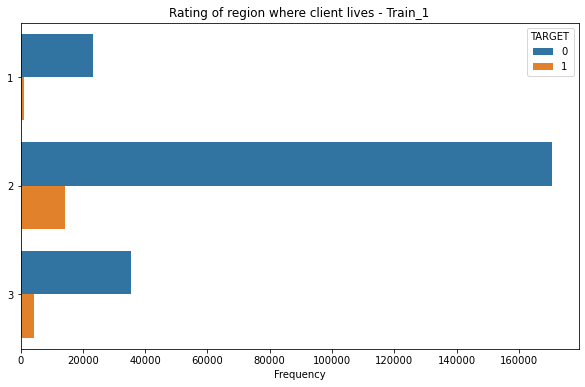

In [136]:
print('For Train_1:')
proportion(train_1, 'REGION_RATING_CLIENT')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REGION_RATING_CLIENT', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives - Train_1');

For Train_2:
Proportion of defaults in 1 is 3.2%
Proportion of defaults in 2 is 6.3%
Proportion of defaults in 3 is 7.3%


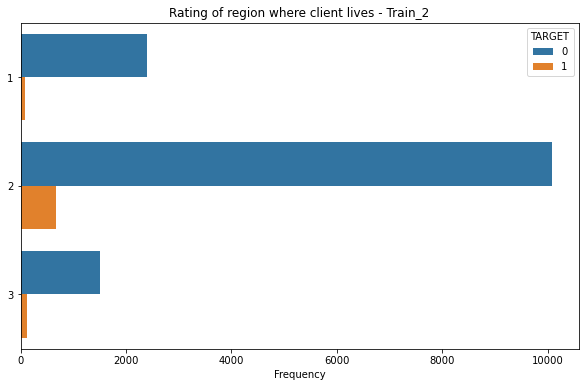

In [137]:
print('For Train_2:')
proportion(train_2, 'REGION_RATING_CLIENT')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REGION_RATING_CLIENT', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives - Train_2');

For Train_3:
Proportion of defaults in 1 is 6.2%
Proportion of defaults in 2 is 9.9%
Proportion of defaults in 3 is 14.8%


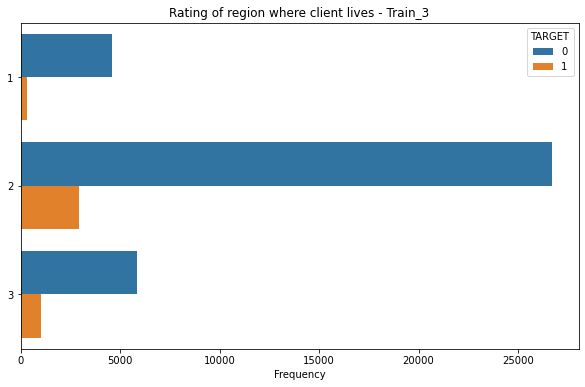

In [138]:
print('For Train_3:')
proportion(train_3, 'REGION_RATING_CLIENT')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REGION_RATING_CLIENT', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives - Train_3');

For Train_4:
Proportion of defaults in 1 is 3.2%
Proportion of defaults in 2 is 7.9%
Proportion of defaults in 3 is 13.4%


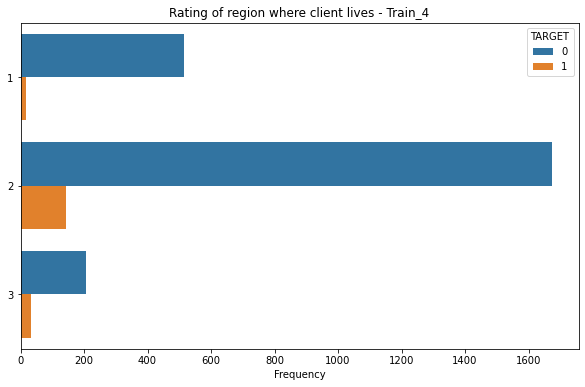

In [139]:
print('For Train_4:')
proportion(train_4, 'REGION_RATING_CLIENT')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REGION_RATING_CLIENT', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives - Train_4');

Across all groups, applicants in region that was rated 1 has the lowest default rate whereas applicants in region that was rated 3 has the highest default rate.

### 4.18. REGION_RATING_CLIENT_W_CITY
`rating of the region where applicant lives taking city into account`
<br>
[top](#Contents)

In [140]:
for df_train in train_set:
    print(df_train['REGION_RATING_CLIENT_W_CITY'].value_counts())
    print()

2    186709
3     35999
1     25924
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

2    10895
1     2543
3     1421
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

2    30048
3     6238
1     5147
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

2    1832
1     553
3     202
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64



For Train_1:
Proportion of defaults in 1 is 4.7%
Proportion of defaults in 2 is 7.7%
Proportion of defaults in 3 is 10.9%


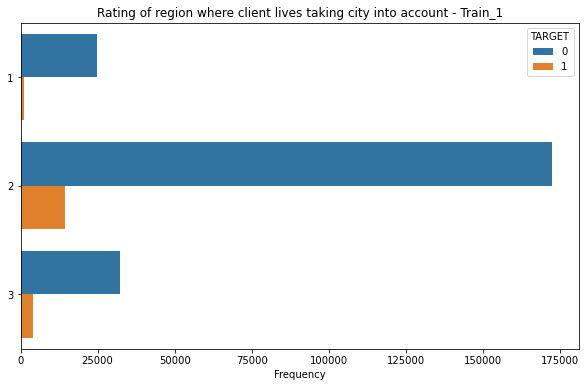

In [141]:
print('For Train_1:')
proportion(train_1, 'REGION_RATING_CLIENT_W_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REGION_RATING_CLIENT_W_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives taking city into account - Train_1');

For Train_2:
Proportion of defaults in 1 is 3.3%
Proportion of defaults in 2 is 6.3%
Proportion of defaults in 3 is 7.0%


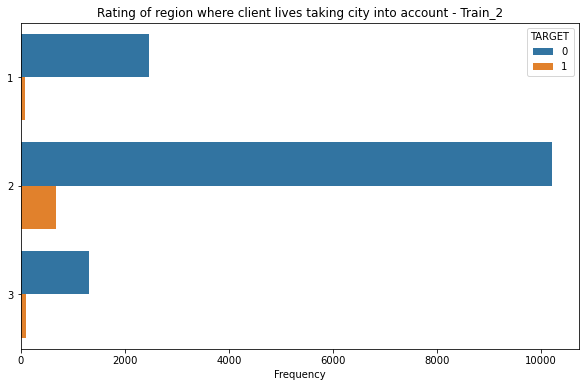

In [142]:
print('For Train_2:')
proportion(train_2, 'REGION_RATING_CLIENT_W_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REGION_RATING_CLIENT_W_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives taking city into account - Train_2');

For Train_3:
Proportion of defaults in 1 is 6.3%
Proportion of defaults in 2 is 9.9%
Proportion of defaults in 3 is 15.4%


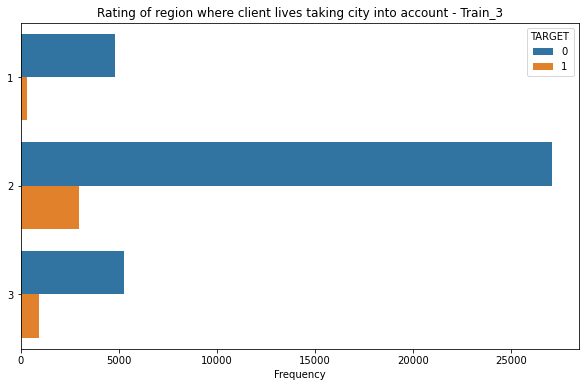

In [143]:
print('For Train_3:')
proportion(train_3, 'REGION_RATING_CLIENT_W_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REGION_RATING_CLIENT_W_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives taking city into account - Train_3');

For Train_4:
Proportion of defaults in 1 is 3.6%
Proportion of defaults in 2 is 7.8%
Proportion of defaults in 3 is 14.4%


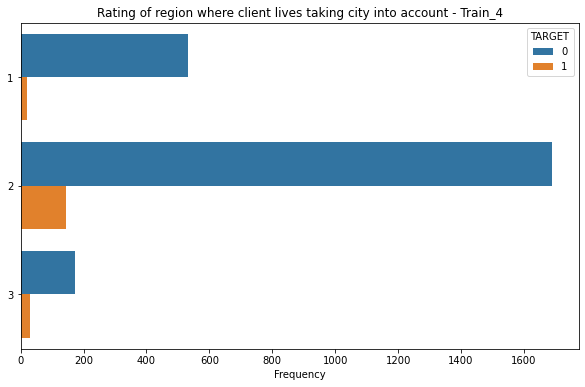

In [144]:
print('For Train_4:')
proportion(train_4, 'REGION_RATING_CLIENT_W_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REGION_RATING_CLIENT_W_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Rating of region where client lives taking city into account - Train_4');

Similarly, across all groups, applicants in region that was rated 1 has the lowest default rate whereas applicants in region that was rated 3 has the highest default rate. Since these 2 features are highly collinear, where only 2% or less of the entries are different, our selection basis will be the feature that provide most variance within each group. The feature that provides this is `REGION_RATING_CLIENT_W_CITY`. 

In [145]:
for df_train in train_set:
    df_train.drop('REGION_RATING_CLIENT', axis=1, inplace=True)
    
for df_test in test_set:
    df_test.drop('REGION_RATING_CLIENT', axis=1, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Next we are going to see a series of features which flags if the applicant lives or work in the region or city he indicated compared to the region or city he stays in:

### 4.19. REG_REGION_NOT_LIVE_REGION
`Flag if applicant's permanent address does not match contact address`
<br>
[top](#Contents)

In [146]:
for df_train in train_set:
    print(df_train['REG_REGION_NOT_LIVE_REGION'].value_counts())
    print()

0    245211
1      3421
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

0    14492
1      367
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

0    40717
1      716
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

0    2434
1     153
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 9.1%


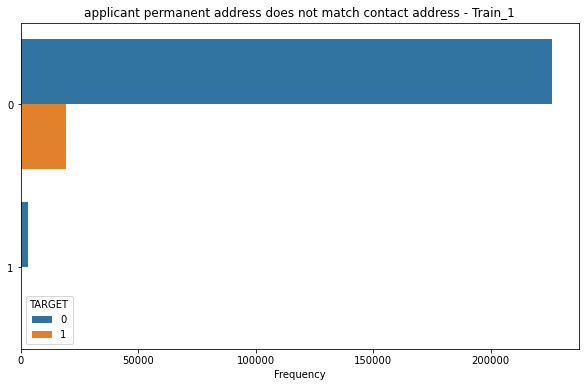

In [147]:
print('For Train_1:')
proportion(train_1, 'REG_REGION_NOT_LIVE_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REG_REGION_NOT_LIVE_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.9%
Proportion of defaults in 1 is 6.0%


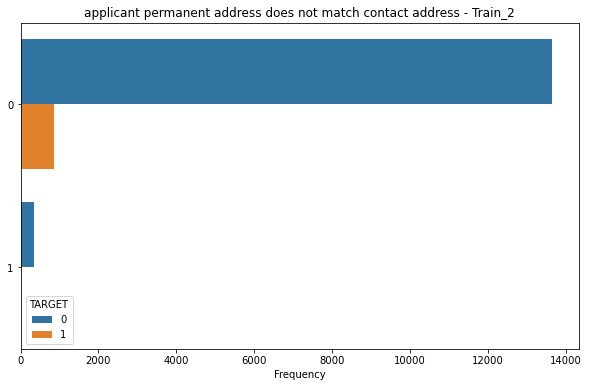

In [148]:
print('For Train_2:')
proportion(train_2, 'REG_REGION_NOT_LIVE_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REG_REGION_NOT_LIVE_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address - Train_2');

For Train_3:
Proportion of defaults in 0 is 10.3%
Proportion of defaults in 1 is 10.9%


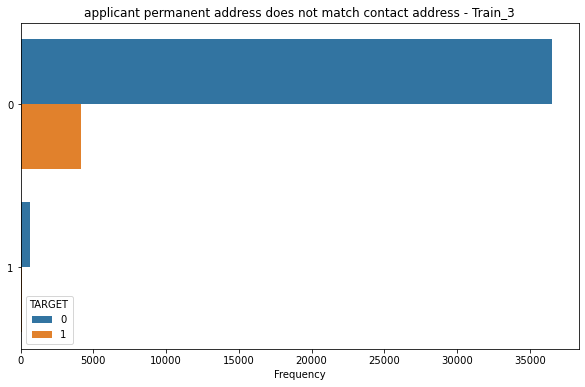

In [149]:
print('For Train_3:')
proportion(train_3, 'REG_REGION_NOT_LIVE_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REG_REGION_NOT_LIVE_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.1%
Proportion of defaults in 1 is 13.1%


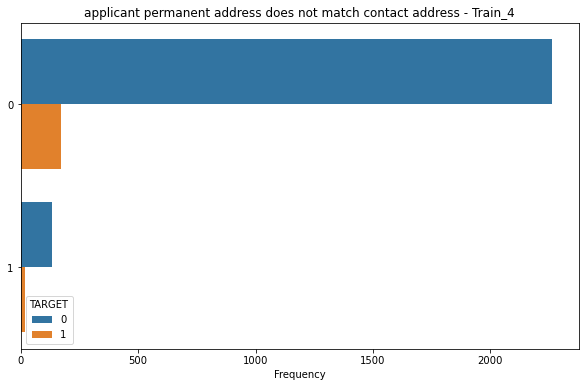

In [150]:
print('For Train_4:')
proportion(train_4, 'REG_REGION_NOT_LIVE_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REG_REGION_NOT_LIVE_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address - Train_4');

If applicant permanent address does not match contact address, the default rate is higher across all groups. 

### 4.20. REG_REGION_NOT_WORK_REGION
`Flag if applicant's permanent address does not match work address`
<br>
[top](#Contents)

In [151]:
for df_train in train_set:
    print(df_train['REG_REGION_NOT_WORK_REGION'].value_counts())
    print()

0    236616
1     12016
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

0    13810
1     1049
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

0    39170
1     2263
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

0    2303
1     284
Name: REG_REGION_NOT_WORK_REGION, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 8.7%


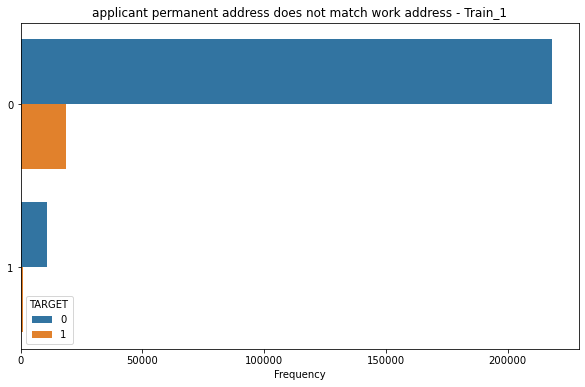

In [152]:
print('For Train_1:')
proportion(train_1, 'REG_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REG_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_1');

For Train_2:
Proportion of defaults in 0 is 6.0%
Proportion of defaults in 1 is 4.9%


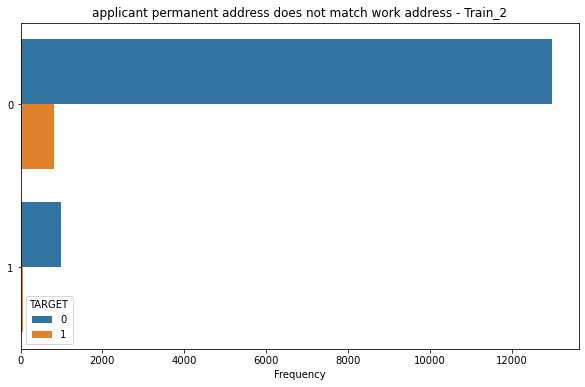

In [153]:
print('For Train_2:')
proportion(train_2, 'REG_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REG_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_2');

For Train_3:
Proportion of defaults in 0 is 10.2%
Proportion of defaults in 1 is 11.4%


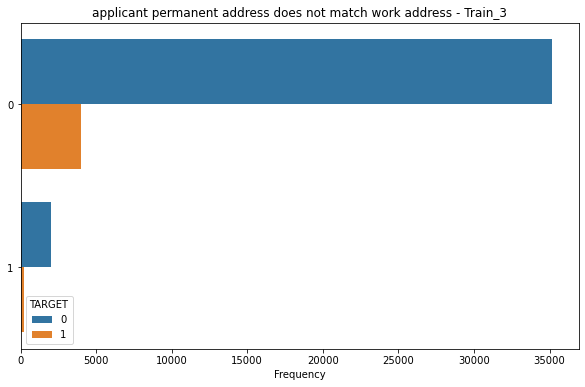

In [154]:
print('For Train_3:')
proportion(train_3, 'REG_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REG_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.0%
Proportion of defaults in 1 is 10.6%


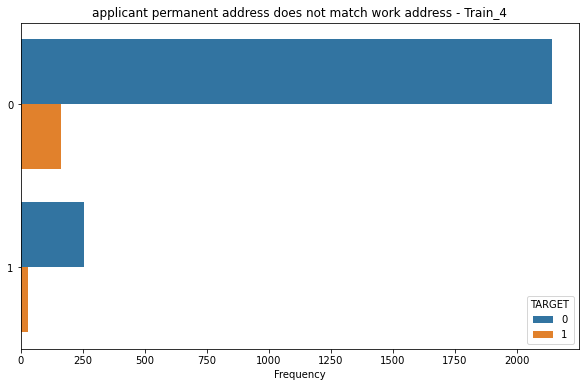

In [155]:
print('For Train_4:')
proportion(train_4, 'REG_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REG_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_4');

If applicant permanent address does not match work address, the default rate is mostly higher across all groups, except for group 2. 

### 4.21. LIVE_REGION_NOT_WORK_REGION
`Flag if applicant's contact address does not match work address`
<br>
[top](#Contents)

In [156]:
for df_train in train_set:
    print(df_train['LIVE_REGION_NOT_WORK_REGION'].value_counts())
    print()

0    238844
1      9788
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

0    14077
1      782
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

0    39658
1     1775
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

0    2429
1     158
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 8.2%


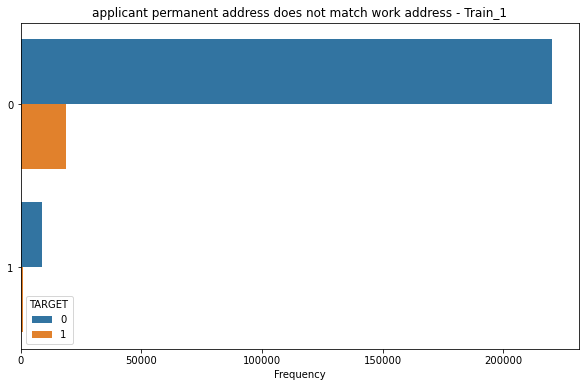

In [157]:
print('For Train_1:')
proportion(train_1, 'LIVE_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='LIVE_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.9%
Proportion of defaults in 1 is 4.7%


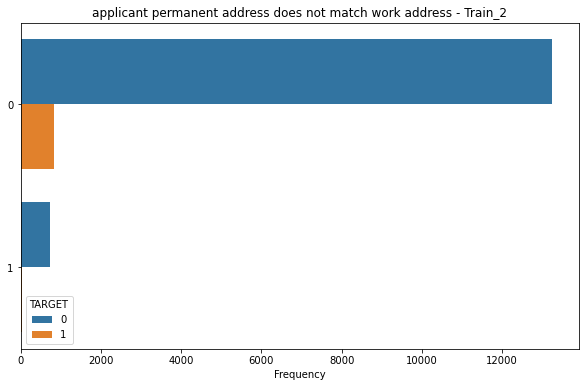

In [158]:
print('For Train_2:')
proportion(train_2, 'LIVE_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='LIVE_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_2');

For Train_3:
Proportion of defaults in 0 is 10.2%
Proportion of defaults in 1 is 11.5%


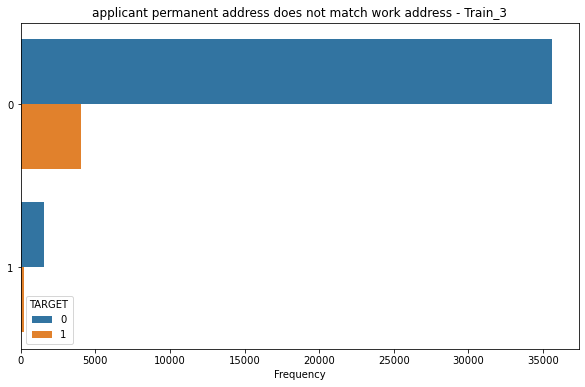

In [159]:
print('For Train_3:')
proportion(train_3, 'LIVE_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='LIVE_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.5%
Proportion of defaults in 1 is 7.0%


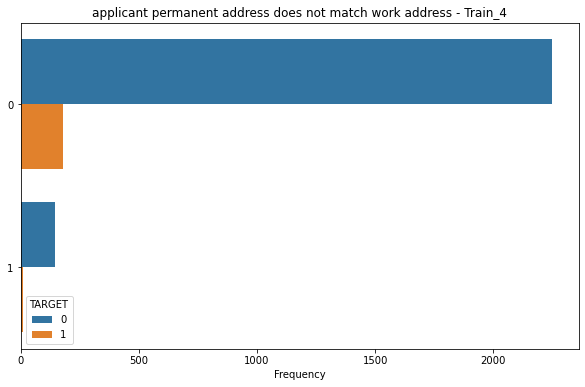

In [160]:
print('For Train_4:')
proportion(train_4, 'LIVE_REGION_NOT_WORK_REGION')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='LIVE_REGION_NOT_WORK_REGION', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address - Train_4');

We have mixed results with group 2 and 4 showing a decrease in default rates if the applicant permanent address does not match the work address but group 1 and 3 shows a higher default rate instead. 

### 4.22. REG_CITY_NOT_LIVE_CITY
`Flag if applicant's permanent address does not match contact address at the city level`
<br>
[top](#Contents)


In [161]:
for df_train in train_set:
    print(df_train['REG_CITY_NOT_LIVE_CITY'].value_counts())
    print()

0    229885
1     18747
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

0    13789
1     1070
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

0    37514
1     3919
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

0    2284
1     303
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.5%
Proportion of defaults in 1 is 11.9%


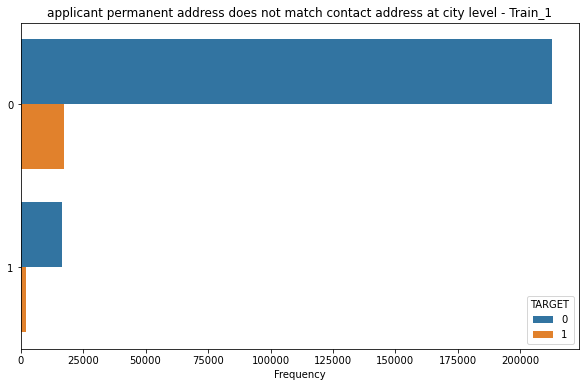

In [162]:
print('For Train_1:')
proportion(train_1, 'REG_CITY_NOT_LIVE_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REG_CITY_NOT_LIVE_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address at city level - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.7%
Proportion of defaults in 1 is 8.5%


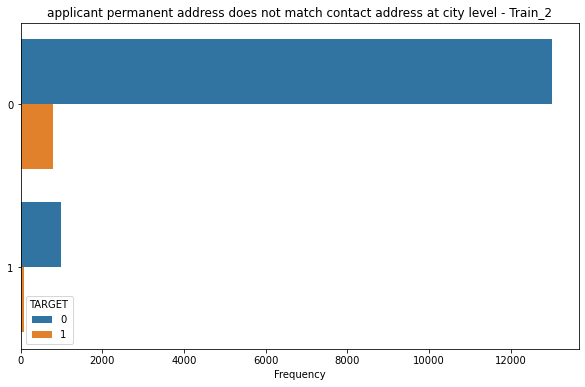

In [163]:
print('For Train_2:')
proportion(train_2, 'REG_CITY_NOT_LIVE_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REG_CITY_NOT_LIVE_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address at city level - Train_2');

For Train_3:
Proportion of defaults in 0 is 9.8%
Proportion of defaults in 1 is 14.6%


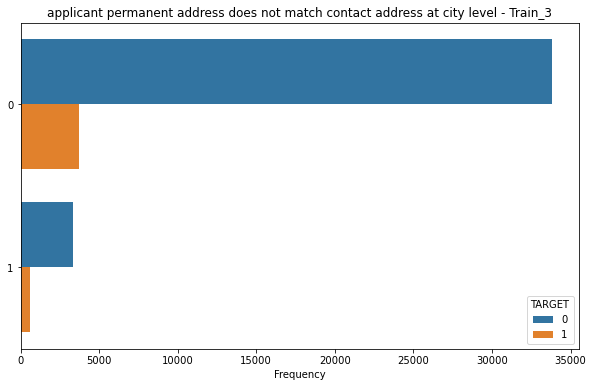

In [164]:
print('For Train_3:')
proportion(train_3, 'REG_CITY_NOT_LIVE_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REG_CITY_NOT_LIVE_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address at city level - Train_3');

For Train_4:
Proportion of defaults in 0 is 6.6%
Proportion of defaults in 1 is 13.5%


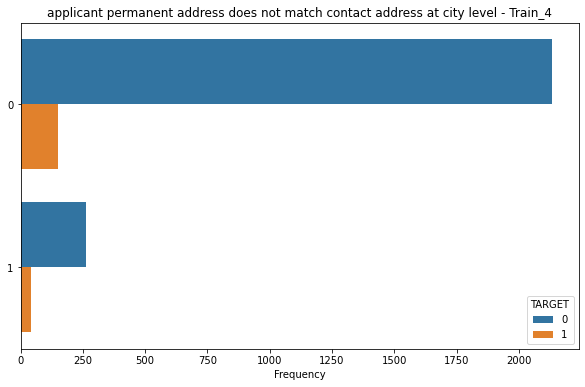

In [165]:
print('For Train_4:')
proportion(train_4, 'REG_CITY_NOT_LIVE_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REG_CITY_NOT_LIVE_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match contact address at city level - Train_4');

Here we have a clear indication that if the applicant's permanent address does not match the contact address at city level then the default rate is higher. This is consistent across all groups.

### 4.23. REG_CITY_NOT_WORK_CITY
`Flag if applicant's permanent address does not match work address at city level`
<br>
[top](#Contents)


In [166]:
for df_train in train_set:
    print(df_train['REG_CITY_NOT_WORK_CITY'].value_counts())
    print()

0    192063
1     56569
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

0    11827
1     3032
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

0    30805
1    10628
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

0    1949
1     638
Name: REG_CITY_NOT_WORK_CITY, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.1%
Proportion of defaults in 1 is 10.3%


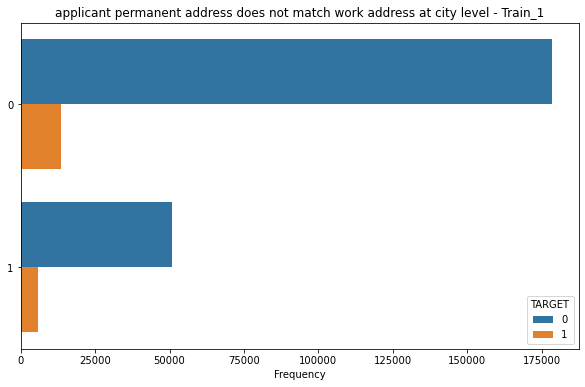

In [167]:
print('For Train_1:')
proportion(train_1, 'REG_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='REG_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address at city level - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.4%
Proportion of defaults in 1 is 7.9%


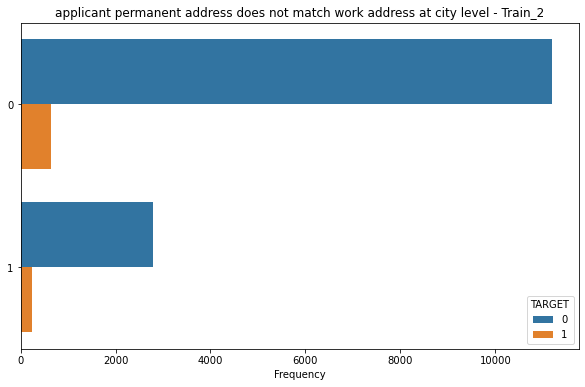

In [168]:
print('For Train_2:')
proportion(train_2, 'REG_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='REG_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address at city level - Train_2');

For Train_3:
Proportion of defaults in 0 is 9.3%
Proportion of defaults in 1 is 13.1%


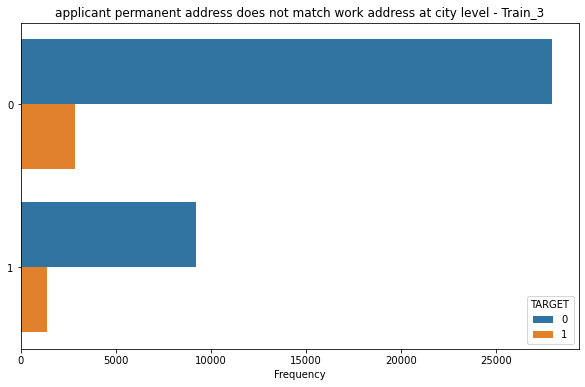

In [169]:
print('For Train_3:')
proportion(train_3, 'REG_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='REG_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address at city level - Train_3');

For Train_4:
Proportion of defaults in 0 is 6.0%
Proportion of defaults in 1 is 11.8%


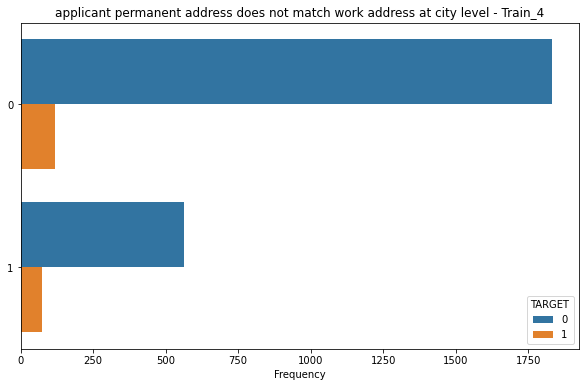

In [170]:
print('For Train_4:')
proportion(train_4, 'REG_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='REG_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant permanent address does not match work address at city level - Train_4');

Similarly, we have a clear indication that if the applicant's permanent address does not match the work address at city level then the default rate is higher. This is consistent across all groups.

### 4.24. LIVE_CITY_NOT_WORK_CITY
`Flag if applicant's contact address does not match work address at city level`
<br>
[top](#Contents)


In [171]:
for df_train in train_set:
    print(df_train['LIVE_CITY_NOT_WORK_CITY'].value_counts())
    print()

0    204195
1     44437
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

0    12525
1     2334
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

0    33412
1     8021
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

0    2164
1     423
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64



For Train_1:
Proportion of defaults in 0 is 7.4%
Proportion of defaults in 1 is 9.6%


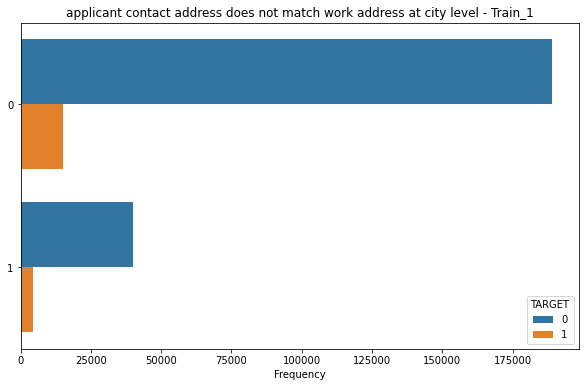

In [172]:
print('For Train_1:')
proportion(train_1, 'LIVE_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='LIVE_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant contact address does not match work address at city level - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.6%
Proportion of defaults in 1 is 7.6%


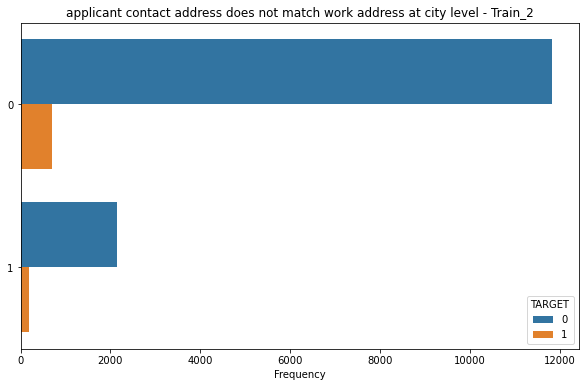

In [173]:
print('For Train_2:')
proportion(train_2, 'LIVE_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='LIVE_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant contact address does not match work address at city level - Train_2');

For Train_3:
Proportion of defaults in 0 is 9.8%
Proportion of defaults in 1 is 12.4%


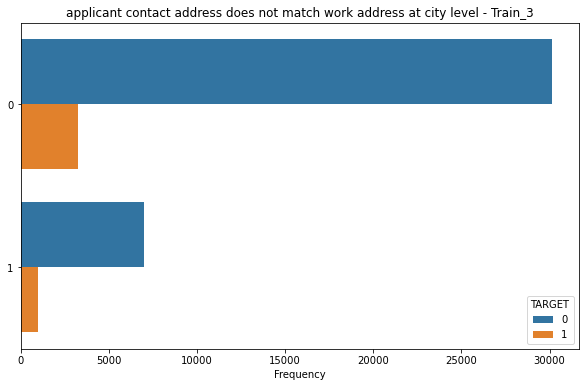

In [174]:
print('For Train_3:')
proportion(train_3, 'LIVE_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='LIVE_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant contact address does not match work address at city level - Train_3');

For Train_4:
Proportion of defaults in 0 is 6.7%
Proportion of defaults in 1 is 11.3%


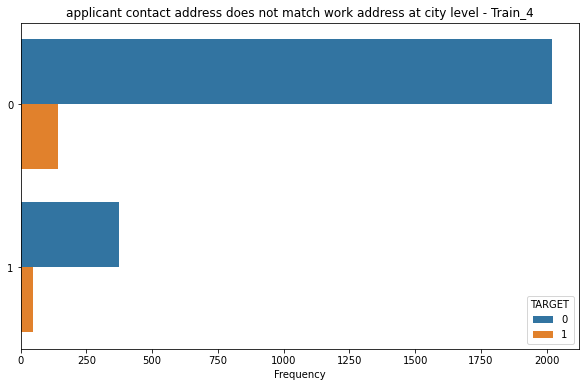

In [175]:
print('For Train_4:')
proportion(train_4, 'LIVE_CITY_NOT_WORK_CITY')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='LIVE_CITY_NOT_WORK_CITY', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('applicant contact address does not match work address at city level - Train_4');

Likewise, we have a clear indication that if the applicant's contact address does not match the work address at city level then the default rate is higher. This is consistent across all groups.

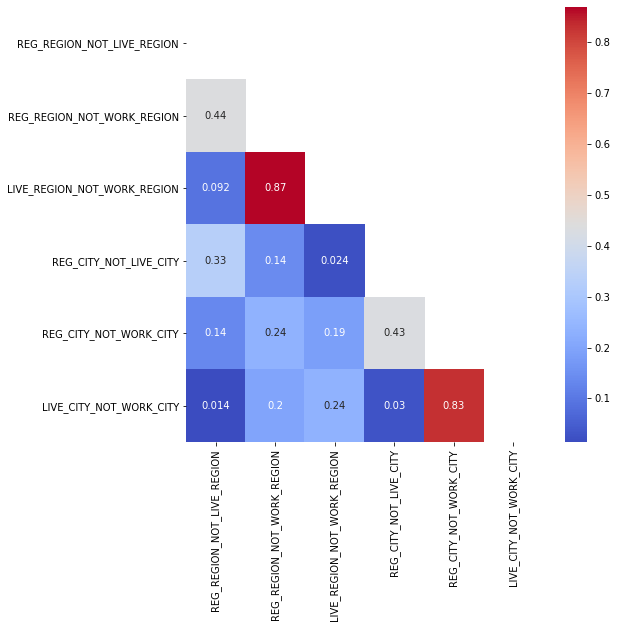

In [176]:
# looking at correlation heatmap of these 6 features
feat = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
plt.figure(figsize=(8,8))
# looking at train_1
corr = train_1[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, );

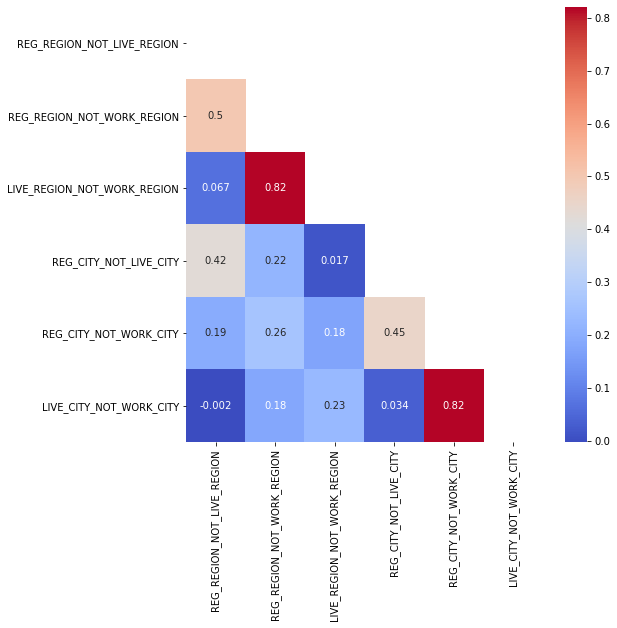

In [177]:
plt.figure(figsize=(8,8))
# looking at train_2
corr = train_2[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, );

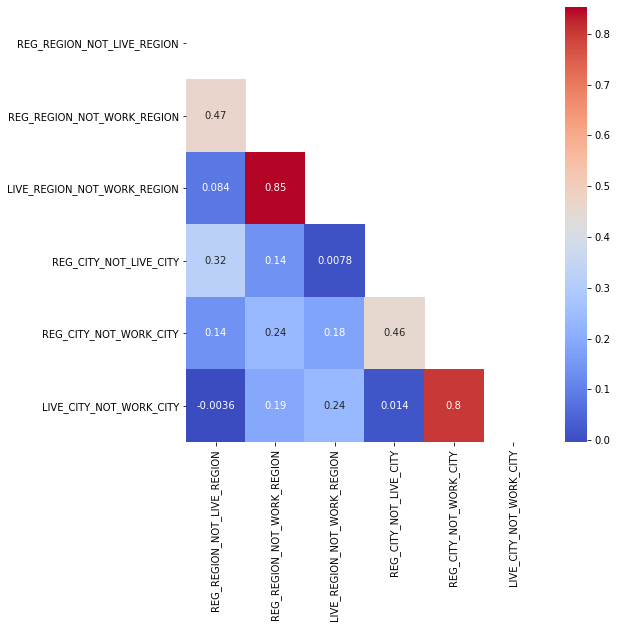

In [178]:
plt.figure(figsize=(8,8))
# looking at train_3
corr = train_3[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, );

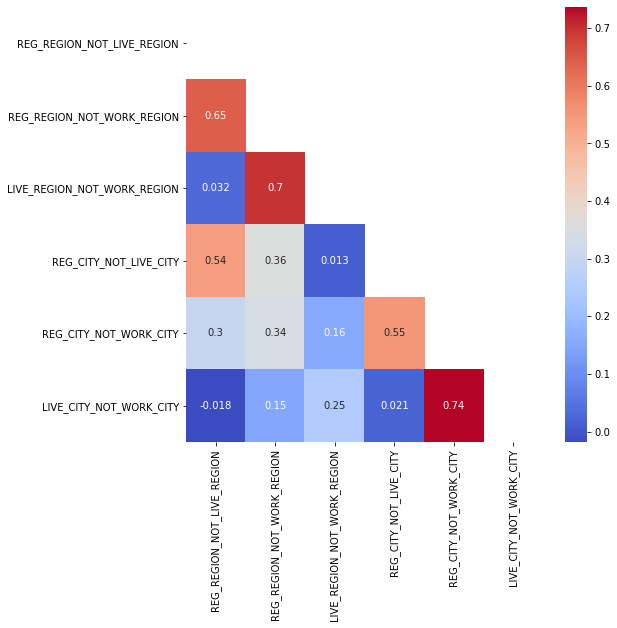

In [179]:
plt.figure(figsize=(8,8))
# looking at train_4
corr = train_4[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, );

We see 2 highly correlated pairs, ('LIVE_REGION_NOT_WORK_REGION' ,'REG_REGION_NOT_WORK_REGION') and ('LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY'), we would like to drop one feature from each pair to reduce the multi-collinearity. Our selection on which feature to drop is based on whether the feature itself shows good variance within each train set. 
<br>
Decision, to drop:
- LIVE_REGION_NOT_WORK_REGION
- LIVE_CITY_NOT_WORK_CITY

In [180]:
to_drop = ['LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY']

for df_train in train_set:
    df_train.drop(to_drop, axis=1, inplace=True)

for df_test in test_set:
    df_test.drop(to_drop, axis=1, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 4.25. FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21
`Supporting documents for application`
<br>
[top](#Contents)


Lastly, these are binary flags which indicates if the applicants provided the document during application. I believe these are supporting documents which might not be necessary for the loan application (FLAG_DOCUMENT_1 is probably the main application), but might be good to provide as supporting evidence to the loan. Thus having these would perhaps lower the risk of default. While the nature of these documents is not known, let's quickly see if any information can be glimpsed from them:

In [181]:
train_1['FLAG_DOCUMENT_2'].value_counts()

0    248632
Name: FLAG_DOCUMENT_2, dtype: int64

In [182]:
flag_doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
            'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
            'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
i = 1
for df_train in train_set:
    print(f'For train set {i}...')
    for doc in flag_doc:
        print(df_train[doc].value_counts())
        proportion(df_train, doc)
        print()
    i += 1
    print('------------------------')

For train set 1...
0    248632
Name: FLAG_DOCUMENT_2, dtype: int64
Proportion of defaults in 0 is 7.8%

1    179285
0     69347
Name: FLAG_DOCUMENT_3, dtype: int64
Proportion of defaults in 0 is 6.0%
Proportion of defaults in 1 is 8.6%

0    248609
1        23
Name: FLAG_DOCUMENT_4, dtype: int64
Proportion of defaults in 0 is 7.8%

0    244711
1      3921
Name: FLAG_DOCUMENT_5, dtype: int64
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 7.8%

0    227504
1     21128
Name: FLAG_DOCUMENT_6, dtype: int64
Proportion of defaults in 0 is 8.1%
Proportion of defaults in 1 is 5.3%

0    248597
1        35
Name: FLAG_DOCUMENT_7, dtype: int64
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 8.6%

0    228635
1     19997
Name: FLAG_DOCUMENT_8, dtype: int64
Proportion of defaults in 0 is 7.9%
Proportion of defaults in 1 is 7.3%

0    247719
1       913
Name: FLAG_DOCUMENT_9, dtype: int64
Proportion of defaults in 0 is 7.8%
Proportion of defaults in 1 is 6.5%

0

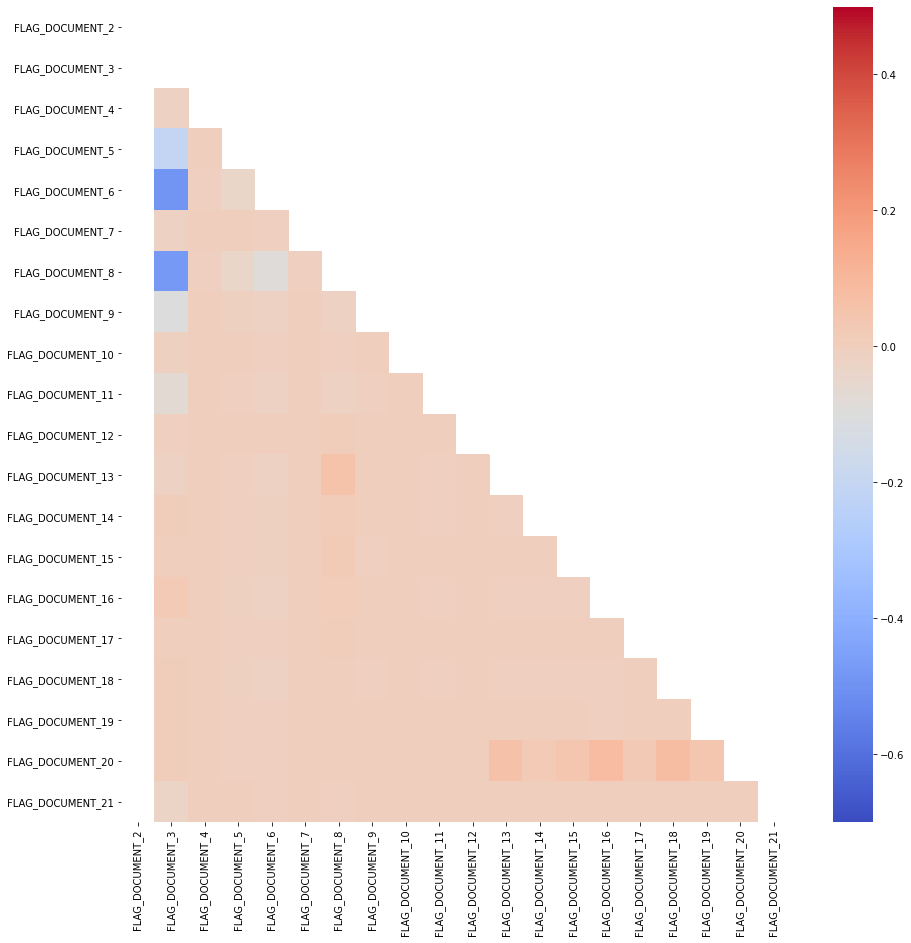

In [183]:
plt.figure(figsize=(15,15))
# looking at train_1
corr = train_1[flag_doc].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.5, vmin=-0.7);

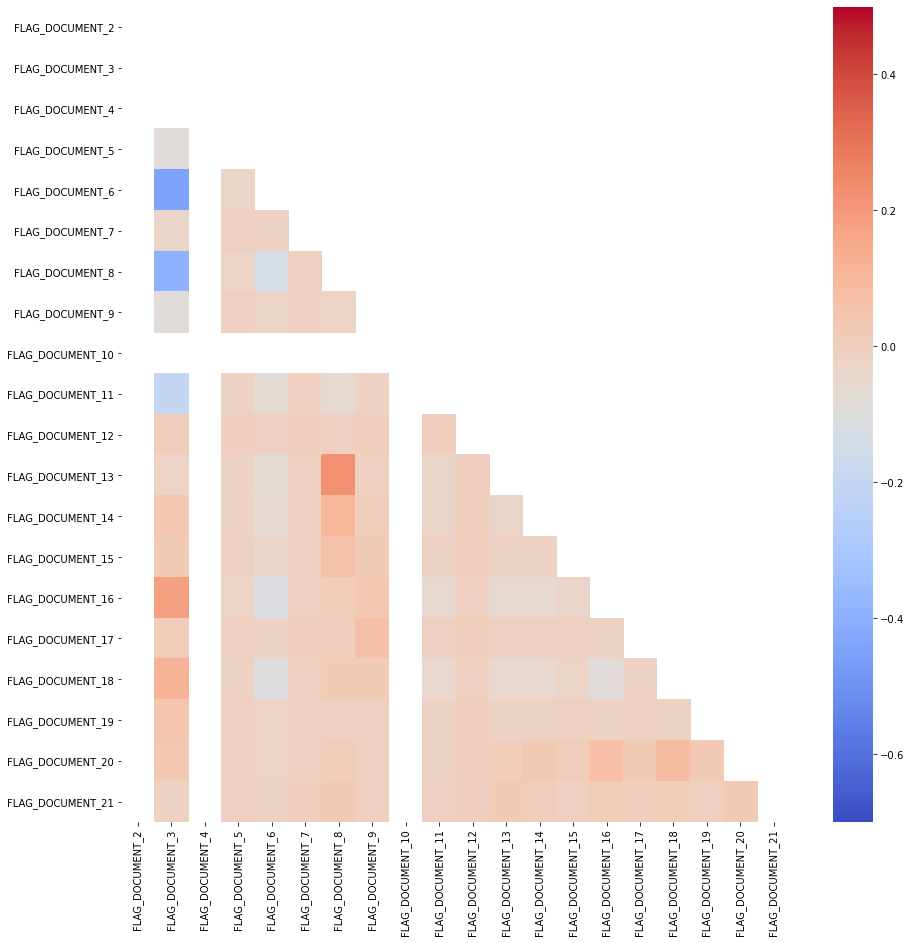

In [184]:
plt.figure(figsize=(15,15))
# looking at train_2
corr = train_2[flag_doc].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.5, vmin=-0.7);

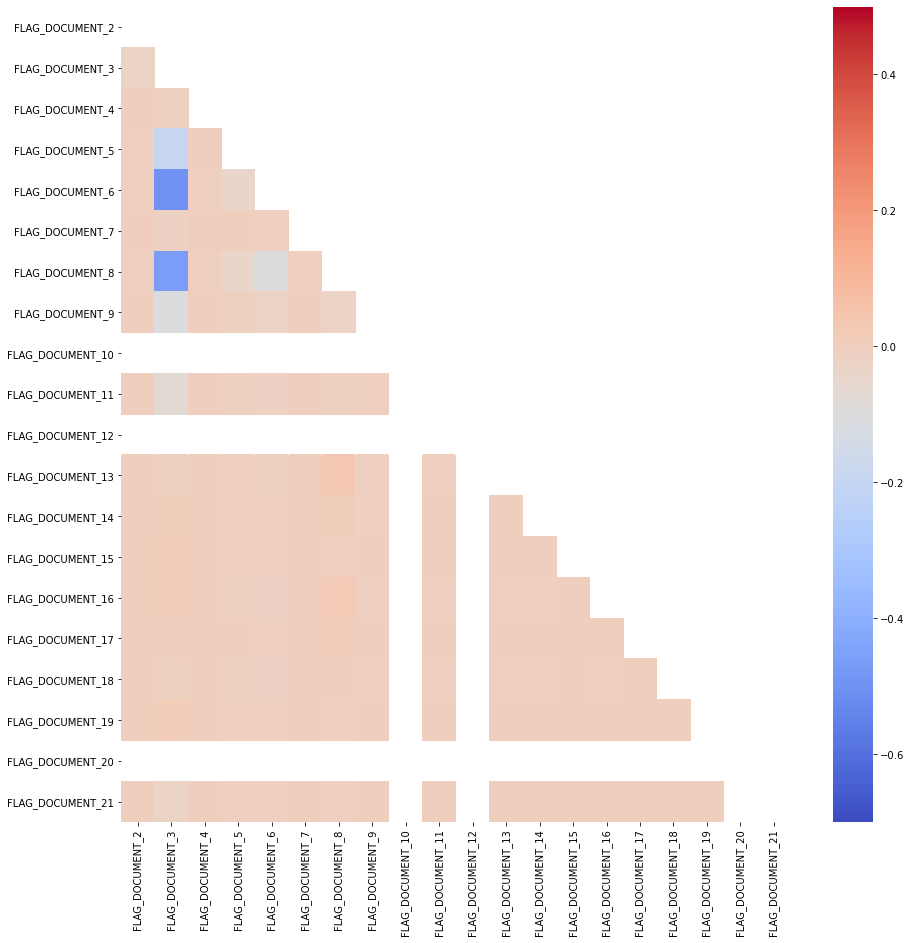

In [185]:
plt.figure(figsize=(15,15))
# looking at train_3
corr = train_3[flag_doc].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.5, vmin=-0.7);

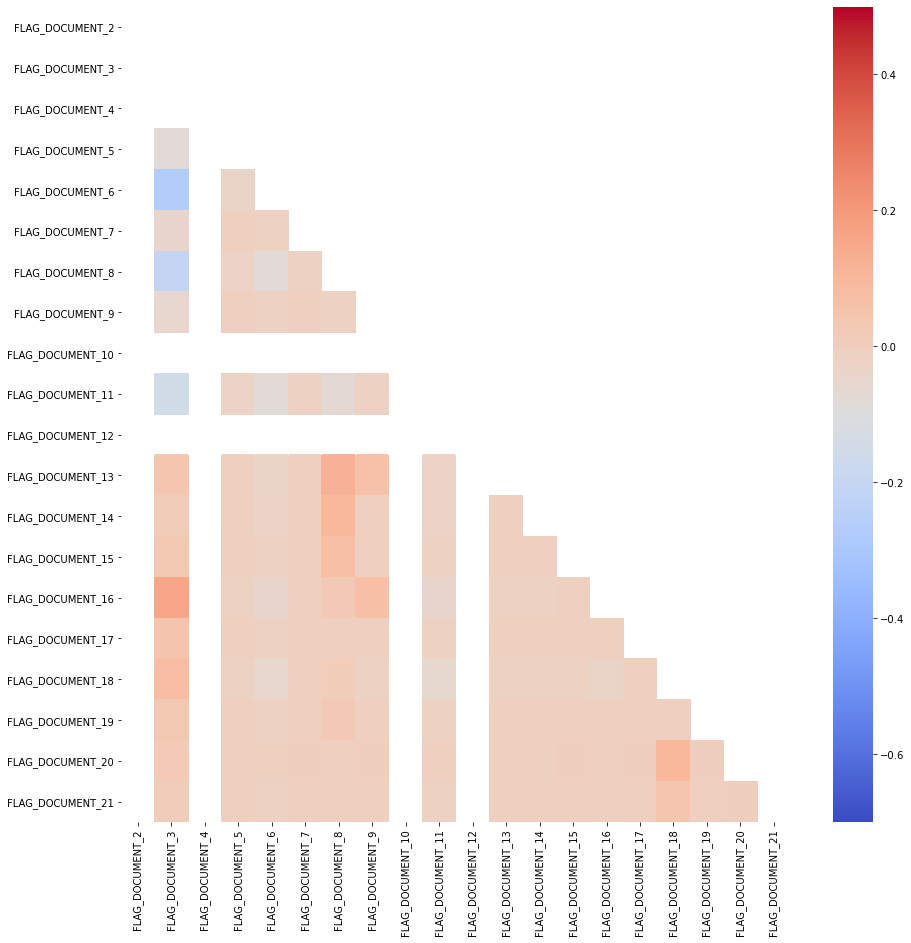

In [186]:
plt.figure(figsize=(15,15))
# looking at train_4
corr = train_4[flag_doc].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.5, vmin=-0.7);

Document 3, 6, 8, 16, and 18 has the highest number of submissions across all train segments. Furthermore, the default rates for those who submitted is significant different from those that did not submit. Mostly, the trend is that the default rate for those who submitted these documents are lower than those that do not. 

However and interestingly, for document 16 and 18, it seems that those who submitted have much higher default rates in training group 2 and 4, which are new applicants. Perhaps the nature of these documents could be detrimental to new applicants. Without knowing the true nature of the documents, we can only rely on guessing. The correlation heatmap also doesn't show any highly correlated features. Hence we will keep Document 3, 6, 8, 16 and 18 and drop the rest. 

In [187]:
to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
           'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_17',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

for df_train in train_set:
    df_train.drop(to_drop, axis=1, inplace=True)

for df_test in test_set:
    df_test.drop(to_drop, axis=1, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 5. EDA-Numerical Features
[top](#Contents)

### 5.1. Days_Birth
`Number of days since birth until time of application - converting to age`
<br>
[top](#Contents)


Days_Birth is stated as negative values based on time of application.

In [188]:
for df_train in train_set:
    df_train['AGE'] = df_train['DAYS_BIRTH']/-365
    
for df_test in test_set:
    df_test['AGE'] = df_test['DAYS_BIRTH']/-365

<ipython-input-188-e45b98f8b8c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AGE'] = df_train['DAYS_BIRTH']/-365
<ipython-input-188-e45b98f8b8c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['AGE'] = df_test['DAYS_BIRTH']/-365


In [189]:
# define function to plot displot to look at our numerical features 
def plot_dist(df, feat, bins = 25, kde=True):
    sns.displot(df, x=feat, hue='TARGET', multiple='stack', height=6.5, aspect = 1.2, bins=bins, kde=kde)

In [190]:
# define function to plot displot if numerical feature has long right tail
# we only removed the positive outliers
def plot_dist_outliers(df, feat, bins = 25, kde=True):
    q25 = df[feat].describe()['25%']
    q75 = df[feat].describe()['75%']
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df_subset = df.loc[df[feat]<upper]
    sns.displot(df_subset, x=feat, hue='TARGET', multiple='stack', height=6.5, aspect = 1.2, bins=bins, kde=kde)

In [191]:
train_1.loc[train_1['TARGET'] == 1, 'AGE']

0         25.920548
40        47.895890
42        36.668493
94        27.942466
110       28.838356
            ...    
307448    27.172603
307475    36.756164
307481    56.558904
307489    45.126027
307509    32.769863
Name: AGE, Length: 19494, dtype: float64

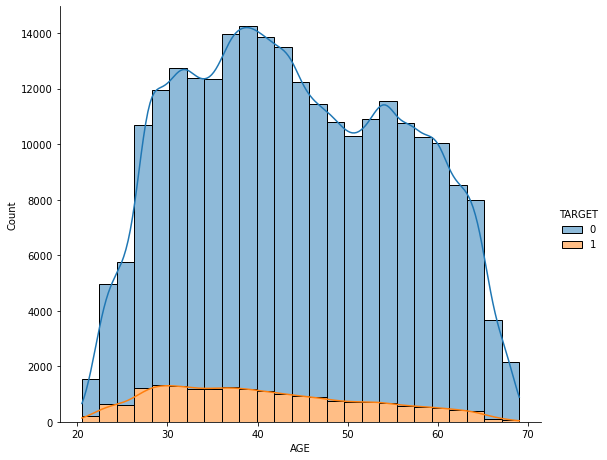

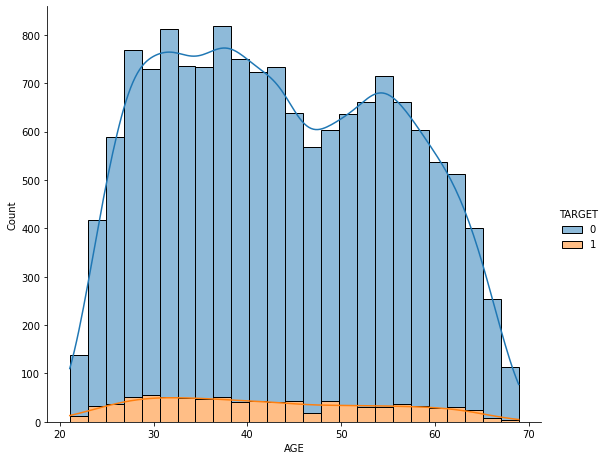

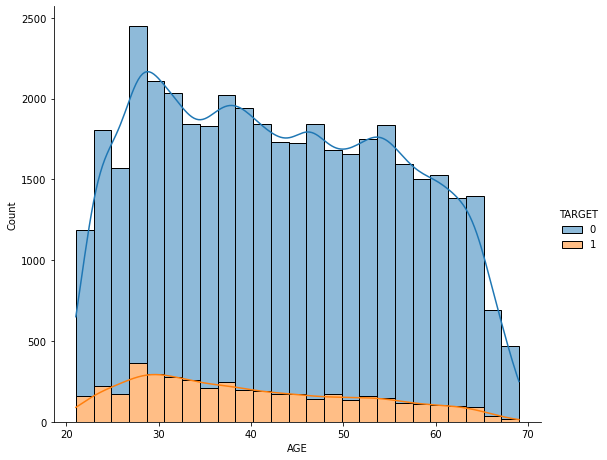

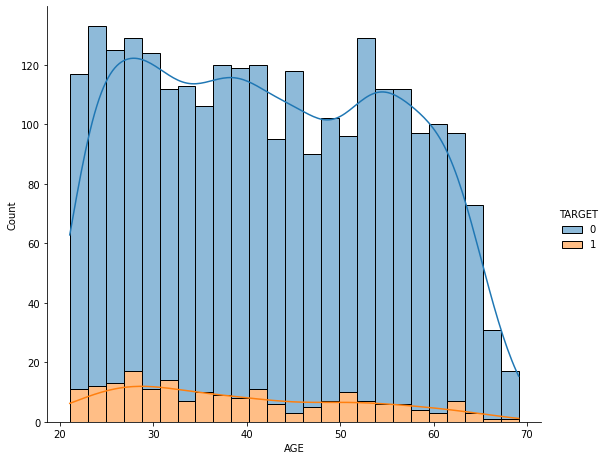

In [192]:
for df_train in train_set:
    plot_dist(df_train, 'AGE')

Looking at borrowers' profile in terms of age:
- Borrowers without credit bureau history (train_3 and train_4) tends to be overwhelming people under the age of 30 whereas train_1 and train_2 tends to have a larger proportion of people in the 30-50 age brackets
- default creditors tend to be significantly left skewed, with a large proportion under the age of 30. This is observed across all train datasets

### 5.2. Days_Employed
`How many days before the application the person started current employment`
<br>
[top](#Contents)


In [193]:
# DAYS_EMPLOYED looks weird with negative values and a high positive maximum values
train_1.loc[train_1['DAYS_EMPLOYED'] > 0]
# we see that they have the same value 365243 days 
# also, notice that these are pensioners

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
8          100011       0         Cash loans            0             0   
11         100015       0         Cash loans            0             0   
23         100027       0         Cash loans            0             0   
38         100045       0         Cash loans            0             0   
43         100050       0         Cash loans            0             0   
...           ...     ...                ...          ...           ...   
307463     456203       0         Cash loans            0             0   
307469     456209       0         Cash loans            0             0   
307483     456227       0         Cash loans            0             0   
307487     456231       0         Cash loans            1             0   
307505     456249       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                     1             0        112500.000   1019610.0   
11                    1             0         38419.155    148365.0   
23                    1             0         83250.000    239850.0   
38                    1             0         99000.000    247275.0   
43                    1             0        108000.000    746280.0   
...                 ...           ...               ...         ...   
307463                1             0        180000.000    247275.0   
307469                1             0        202500.000    703728.0   
307483                1             0         99000.000    247275.0   
307487                1             0        117000.000   1071909.0   
307505                1             0        112500.000    225000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children                 1   
11          10678.5         135000.0        Children                 1   
23          23850.0         225000.0   Unaccompanied                 1   
38          17338.5         225000.0   Unaccompanied                 1   
43          42970.5         675000.0   Unaccompanied                 1   
...             ...              ...             ...               ...   
307463      17338.5         225000.0          Family                 1   
307469      29943.0         607500.0   Unaccompanied                 1   
307483      16479.0         225000.0   Unaccompanied                 1   
307487      31473.0         936000.0   Unaccompanied                 1   
307505      22050.0         225000.0   Unaccompanied                 1   

        NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8                         2               Married  House / apartment   
11                        2               Married  House / apartment   
23                        2               Married  House / apartment   
38                        2               Married  House / apartment   
43                        4  Single / not married  House / apartment   
...                     ...                   ...                ...   
307463                    2               Married  House / apartment   
307469                    2  Single / not married  House / apartment   
307483                    2             Separated  House / apartment   
307487                    2               Married  House / apartment   
307505                    2  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
8                         0.018634      -20099         365243   
11                        0.015221      -20417         365243   
23                        0.006296      -24827         365243   
38                        0.006207      -23920         365243   
43                        0.010966      -23548         365243   
...                            ...         ...            ...   
307463                    0.016612      -241

In [194]:
# let's create a new column to identify rows where these 365243 days are identified as DAYS_EMPLOYED_PENSION
for df_train in train_set:
    df_train['DAYS_EMPLOYED_PENSION'] = df_train['DAYS_EMPLOYED'] == 365243
    # Replaces these in the original column as np.nan
    df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
    
for df_test in test_set:
    df_test['DAYS_EMPLOYED_PENSION'] = df_test['DAYS_EMPLOYED'] == 365243
    # Replaces these in the original column as np.nan
    df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

<ipython-input-194-cc20ae0c1539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['DAYS_EMPLOYED_PENSION'] = df_train['DAYS_EMPLOYED'] == 365243
C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-194-cc20ae0c1539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [195]:
# looking at days might be too granular, we convert it to positive and into years
for df_train in train_set:
    df_train['YRS_EMPLOYED'] = df_train['DAYS_EMPLOYED']/-365
    
for df_test in test_set:
    df_test['YRS_EMPLOYED'] = df_test['DAYS_EMPLOYED']/-365

<ipython-input-195-78b35d8f70cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['YRS_EMPLOYED'] = df_train['DAYS_EMPLOYED']/-365
<ipython-input-195-78b35d8f70cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['YRS_EMPLOYED'] = df_test['DAYS_EMPLOYED']/-365


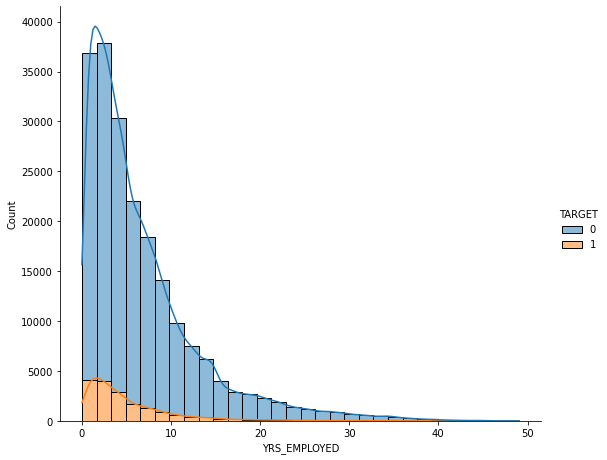

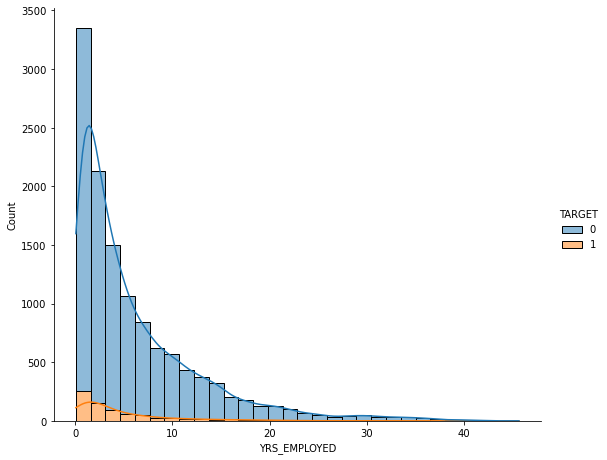

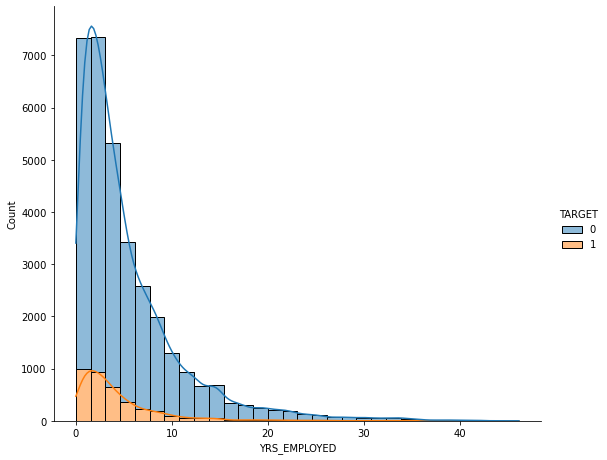

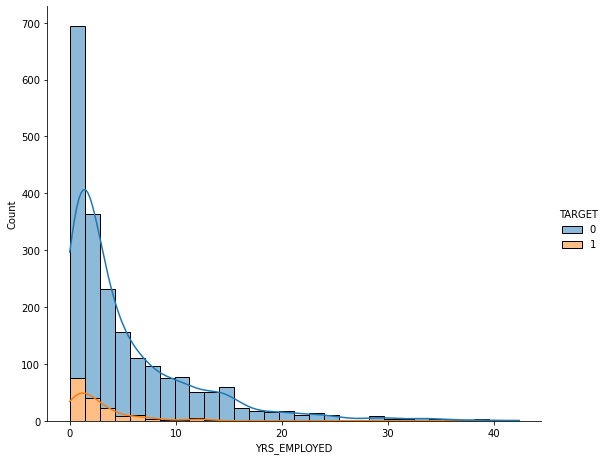

In [196]:
for df_train in train_set:
    plot_dist(df_train, 'YRS_EMPLOYED', bins=30)

Majority of the borrowers tend to be just started working in their current employment (< 1,000 days), especially in train_4. This is perhaps due to the need for this group to borrow to tide over some immediate expenses. Additionally, default rates also tend to be higher for those who have just started their current employment (<2-3 years). 

### 5.3. CNT_CHILDREN
`Number of children the applicant has`
<br>
[top](#Contents)


In [197]:
for df_train in train_set:
    print(df_train['CNT_CHILDREN'].describe())
    print()

count    248632.000000
mean          0.429016
std           0.730423
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

count    14859.000000
mean         0.331382
std          0.644842
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: CNT_CHILDREN, dtype: float64

count    41433.000000
mean         0.384814
std          0.700669
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: CNT_CHILDREN, dtype: float64

count    2587.000000
mean        0.275609
std         0.604984
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: CNT_CHILDREN, dtype: float64



In [198]:
for df_test in test_set:
    print(df_test['CNT_CHILDREN'].describe())
    print()

count    41430.000000
mean         0.402269
std          0.712231
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: CNT_CHILDREN, dtype: float64

count    890.000000
mean       0.349438
std        0.648893
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: CNT_CHILDREN, dtype: float64

count    6203.000000
mean        0.373045
std         0.697669
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: CNT_CHILDREN, dtype: float64

count    221.000000
mean       0.285068
std        0.628999
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: CNT_CHILDREN, dtype: float64



In [199]:
# having 19 children looks weird...
train_1.loc[train_1['CNT_CHILDREN'] == 19]
# these 2 individuals are 28-30 yrs of age and are single / not married
# 14 children is probably a mistake, we shall change it to 0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
155369     280108       0         Cash loans            0             0   
265784     407877       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
155369                1            19          112500.0    269550.0   
265784                1            19          112500.0    135000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
155369      13891.5         225000.0          Family                 4   
265784       8788.5         135000.0   Unaccompanied                 4   

        NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
155369                    2  Single / not married  House / apartment   
265784                    4  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
155369                    0.007020      -11057        -1853.0   
265784                    0.015221      -10297         -896.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
155369            -3096.0             -745          NaN           1   
265784            -4733.0            -2599          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
155369               1                1                 1           1   
265784               1                0                 1           1   

        FLAG_EMAIL       OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
155369           0  Waiters/barmen staff             20.0   
265784           0            Core staff             20.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
155369                            2                     SUNDAY   
265784                            2                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
155369                       11                           0   
265784                       15                           0   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
155369                           0                       0   
265784                           0                       0   

        REG_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
155369                       0        Restaurant           NaN      0.553968   
265784                       0      Kindergarten      0.779779      0.167332   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
155369           NaN             NaN               NaN   
265784      0.574447          0.1399            0.1232   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
155369                          NaN              NaN             NaN   
265784                       0.9866           0.7416          0.0209   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
155369            NaN            NaN            NaN            NaN   
265784         0.1732         0.1379         0.3021         0.2083   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
155369           NaN                   NaN             NaN   
265784        0.0979                0.0504          0.1836   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
155369                      NaN                NaN              NaN   
265784                      0.0             0.1177            0.063   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
155369                NaN                           NaN               NaN   
265784             0.0552                        0.9811            0.7517   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
155369              NaN             NaN             NaN             NaN   
265784           0.0211             0.0          0.1379          0.1667   

        FLOORSMIN_MODE  LANDAREA_M

In [200]:
test_1.loc[test_1['CNT_CHILDREN'] > 10]
# likewise, having 20 children at age of 28 sounds weird too. 
# we believe this should be 2 instead...

SK_ID_CURR NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
17639     227945         Cash loans            1             0   
21871     258686         Cash loans            0             0   
42709     411600         Cash loans            1             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
17639                0            20          287100.0    339948.0   
21871                1            11           90000.0    225000.0   
42709                0            11          202500.0    703728.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
17639      40473.0         315000.0   Unaccompanied                 3   
21871      17905.5         225000.0   Unaccompanied                 3   
42709      36058.5         607500.0   Unaccompanied                 3   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
17639                    3          Separated  House / apartment   
21871                    2     Civil marriage  House / apartment   
42709                    2            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
17639                    0.046220      -10423         -789.0   
21871                    0.002042      -14325        -1939.0   
42709                    0.024610      -16959         -775.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
17639            -5289.0            -3091          NaN           1   
21871            -2077.0               -5          NaN           1   
42709            -1293.0             -412          9.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
17639               1                0                 1           0   
21871               1                0                 1           0   
42709               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
17639           0        IT staff             21.0   
21871           0     Sales staff             13.0   
42709           0         Drivers             13.0   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
17639                            1                     MONDAY   
21871                            3                     MONDAY   
42709                            2                     MONDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
17639                       18                           0   
21871                        9                           0   
42709                       10                           0   

       REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
17639                           0                       0   
21871                           0                       0   
42709                           0                       0   

       REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
17639                       1  Business Entity Type 3      0.290407   
21871                       1           Self-employed      0.372493   
42709                       0       Transport: type 3      0.571801   

       EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
17639      0.525270      0.244516          0.0144               NaN   
21871      0.446058      0.177704             NaN               NaN   
42709      0.737457      0.408359             NaN               NaN   

       YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
17639                       0.9762           0.6736             NaN   
21871                          NaN              NaN             NaN   
42709                          NaN              NaN             NaN   

       ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
17639            NaN         0.1034         0.1667         0.2083   
21871            NaN            NaN            NaN            NaN   
42709            NaN            N

In [201]:
train_1['CNT_CHILDREN'].replace({19: 0}, inplace=True)
test_1['CNT_CHILDREN'].replace({20: 2}, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [202]:
len(train_1.loc[train_1['CNT_CHILDREN'] == 0])/len(train_1)

0.6925134335081566

In [203]:
# splitting by the exact number of children might be too granular
# we create a new feature 'HAVE_CHILDREN' to separate those with children and those who do not
for df_train in train_set:
    df_train['HAVE_CHILDREN'] = df_train['CNT_CHILDREN'].apply(lambda x: 1 if x >0 else 0)

for df_test in test_set:
    df_test['HAVE_CHILDREN'] = df_test['CNT_CHILDREN'].apply(lambda x: 1 if x >0 else 0)

<ipython-input-203-1e8daf7dfa62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['HAVE_CHILDREN'] = df_train['CNT_CHILDREN'].apply(lambda x: 1 if x >0 else 0)
<ipython-input-203-1e8daf7dfa62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['HAVE_CHILDREN'] = df_test['CNT_CHILDREN'].apply(lambda x: 1 if x >0 else 0)


In [204]:
train_1['HAVE_CHILDREN'].value_counts()

0    172181
1     76451
Name: HAVE_CHILDREN, dtype: int64

For Train_1:
Proportion of defaults in 0 is 7.5%
Proportion of defaults in 1 is 8.7%


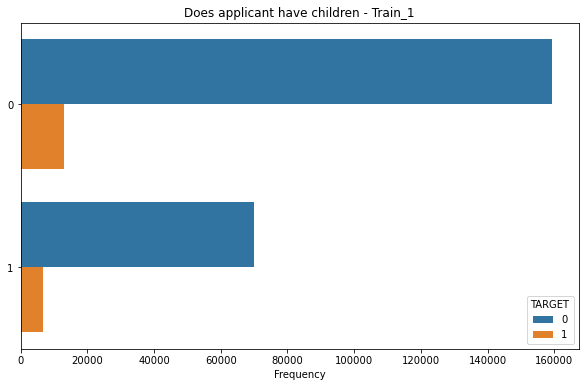

In [205]:
print('For Train_1:')
proportion(train_1, 'HAVE_CHILDREN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='HAVE_CHILDREN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Does applicant have children - Train_1');

For Train_2:
Proportion of defaults in 0 is 5.8%
Proportion of defaults in 1 is 6.2%


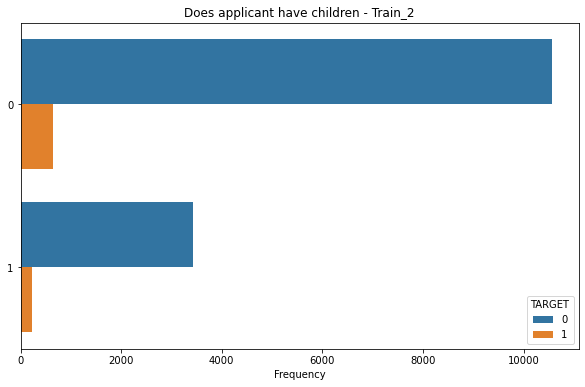

In [206]:
print('For Train_2:')
proportion(train_2, 'HAVE_CHILDREN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='HAVE_CHILDREN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Does applicant have children - Train_2');

For Train_3:
Proportion of defaults in 0 is 9.8%
Proportion of defaults in 1 is 11.5%


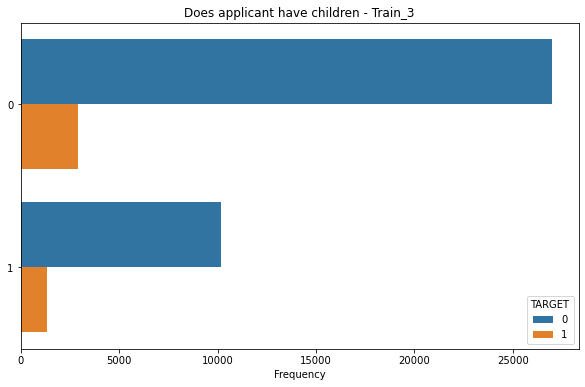

In [207]:
print('For Train_3:')
proportion(train_3, 'HAVE_CHILDREN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='HAVE_CHILDREN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Does applicant have children - Train_3');

For Train_4:
Proportion of defaults in 0 is 7.1%
Proportion of defaults in 1 is 8.8%


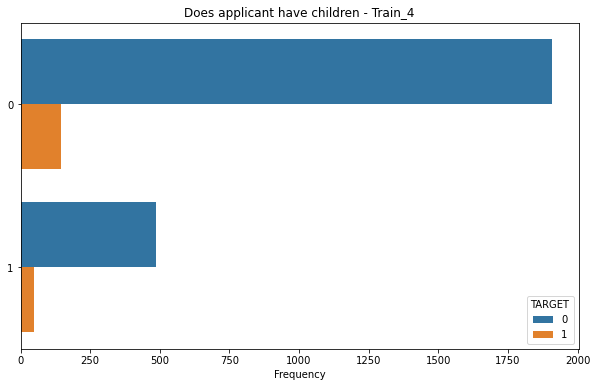

In [208]:
print('For Train_4:')
proportion(train_4, 'HAVE_CHILDREN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='HAVE_CHILDREN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Does applicant have children - Train_4');

Across all groups, having children is found to have a higher default rate than not having children. 

### 5.4. AMT_INCOME_TOTAL
`Monthly Income of Applicant`
<br>
[top](#Contents)

In [209]:
for df_train in train_set:
    print(df_train['AMT_INCOME_TOTAL'].describe())
    print()
    
for df_test in test_set:
    print(df_test['AMT_INCOME_TOTAL'].describe())
    print()

count    2.486320e+05
mean     1.698578e+05
std      2.532160e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

count    1.485900e+04
mean     1.972353e+05
std      1.710215e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      9.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

count    4.143300e+04
mean     1.505436e+05
std      1.398857e+05
min      2.565000e+04
25%      9.000000e+04
50%      1.350000e+05
75%      1.800000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

count    2.587000e+03
mean     1.959559e+05
std      1.707026e+05
min      2.700000e+04
25%      1.080000e+05
50%      1.495530e+05
75%      2.250000e+05
max      2.250000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

count    4.143000e+04
mean     1.811855e+05
std      1.019888e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75% 

In [210]:
# check the outlier in train_1 and train_3
train_1.loc[train_1['AMT_INCOME_TOTAL']>5_000_000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
12840      114967       1         Cash loans            0             0   
131127     252084       0         Cash loans            1             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                 1             1       117000000.0    562491.0   
131127                0             0         6750000.0    790830.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied                 4   
131127      52978.5         675000.0   Unaccompanied                 4   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840                     2            Married  House / apartment   
131127                    4            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615         -922.0   
131127                    0.009549      -19341         -443.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840             -6762.0            -3643          NaN           1   
131127            -7414.0            -2886          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840                1                0                 1           0   
131127               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
12840            0        Laborers              3.0   
131127           0        Laborers              2.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                             2                    TUESDAY   
131127                            2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                        14                           0   
131127                       14                           0   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                            0                       0   
131127                           1                       0   

        REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
12840                        0  Business Entity Type 3      0.460809   
131127                       1       Transport: type 4           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
12840       0.113161      0.145543          0.1031            0.0947   
131127      0.552838      0.495666             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
12840                        0.9791              NaN             NaN   
131127                          NaN              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
12840             0.0         0.2069         0.1667            NaN   
131127            NaN            NaN            NaN            NaN   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
12840         0.0688                   NaN          0.0615   
131127           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
12840                       NaN                NaN            0.105   
131127                      NaN                NaN              NaN   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
12840              0.0983                        0.9791               NaN   
131127                NaN                           NaN               NaN   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
12840               NaN             0.0          0.2069          0.1667   
131127              NaN             NaN             NaN             NaN   

        FLOORSMIN_MODE  LANDAREA_MODE  LIVI

In [211]:
# monthly income of 117_000_000 is likely to be a wrong entry
# given that AMT_CREDIT and AMT_ANNUITY is low
# there is no way to get an accurate estimate of the actual income
# hence we remove this row
train_1.drop(12840, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [212]:
train_3.loc[train_3['AMT_INCOME_TOTAL']>5_000_000]
# do not drop this as it looks reasonable

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
203693     336147       0         Cash loans            1             1   
246858     385674       0         Cash loans            1             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
203693                1             2        18000090.0    675000.0   
246858                1             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
203693      69295.5         675000.0   Unaccompanied                 3   
246858     130945.5        1368000.0   Unaccompanied                 3   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
203693                    2            Married  House / apartment   
246858                    4            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
203693                    0.030755      -15704        -4961.0   
246858                    0.030755      -13551         -280.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
203693            -3338.0            -4728          7.0           1   
246858            -3953.0            -4972         10.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
203693               1                0                 1           0   
246858               1                1                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
203693           0             NaN              4.0   
246858           0             NaN              2.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
203693                       22                           0   
246858                       12                           0   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
203693                           0                       0   
246858                           0                       0   

        REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
203693                       0  Business Entity Type 3      0.543417   
246858                       0  Business Entity Type 3           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
203693      0.788606           NaN             NaN               NaN   
246858      0.713507           NaN             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
203693                          NaN              NaN             NaN   
246858                          NaN              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
203693            NaN            NaN            NaN            NaN   
246858            NaN            NaN            NaN            NaN   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
203693           NaN                   NaN             NaN   
246858           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
203693                      NaN                NaN              NaN   
246858                      NaN                NaN              NaN   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
203693                NaN                           NaN               NaN   
246858                NaN                           NaN               NaN   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
203693              NaN             NaN             NaN             NaN   
246858              NaN             NaN             NaN             NaN   

        FLOORSMIN_MODE  LANDAREA_MODE  LIVI

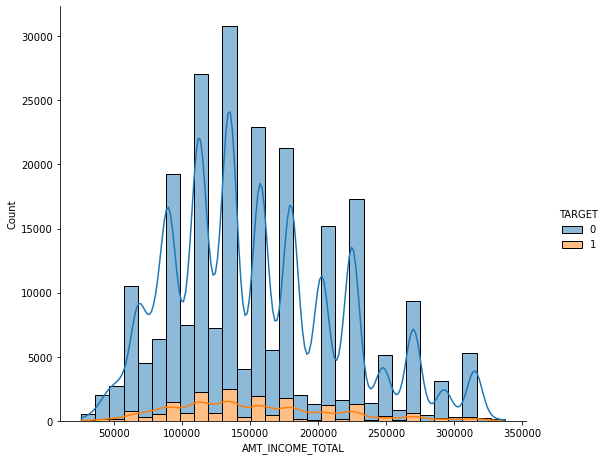

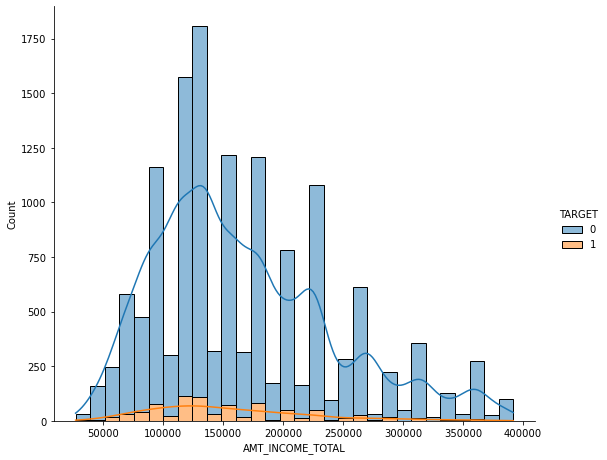

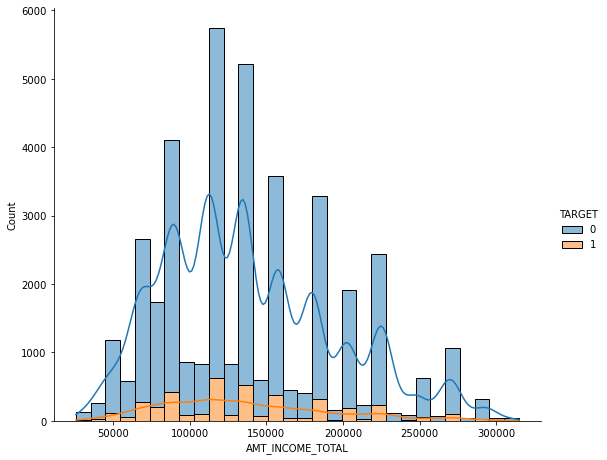

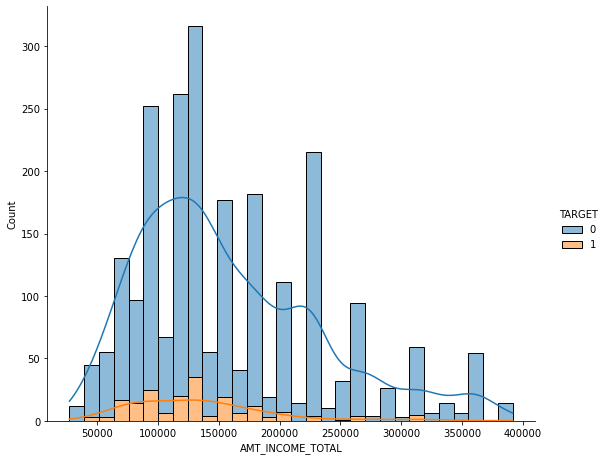

In [213]:
for df_train in train_set:
    plot_dist_outliers(df_train, 'AMT_INCOME_TOTAL', bins=30)

### 5.5. AMT_CREDIT
`Credit amount of the loan`
<br>
[top](#Contents)


In [214]:
for df_train in train_set:
    print(df_train['AMT_CREDIT'].describe())
    print()
    
for df_test in test_set:
    print(df_test['AMT_CREDIT'].describe())
    print()

count    2.486310e+05
mean     5.982795e+05
std      3.942748e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.185620e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

count    1.485900e+04
mean     7.423266e+05
std      5.326224e+05
min      4.500000e+04
25%      3.283650e+05
50%      6.041520e+05
75%      9.703800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

count    4.143300e+04
mean     5.459675e+05
std      3.717548e+05
min      4.500000e+04
25%      2.547000e+05
50%      4.545000e+05
75%      7.551900e+05
max      3.150000e+06
Name: AMT_CREDIT, dtype: float64

count    2.587000e+03
mean     6.974816e+05
std      5.485358e+05
min      4.797000e+04
25%      2.695500e+05
50%      5.444910e+05
75%      9.186930e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

count    4.143000e+04
mean     5.235527e+05
std      3.698415e+05
min      4.500000e+04
25%      2.606400e+05
50%      4.500000e+05
75%      6.750000e+05
max   

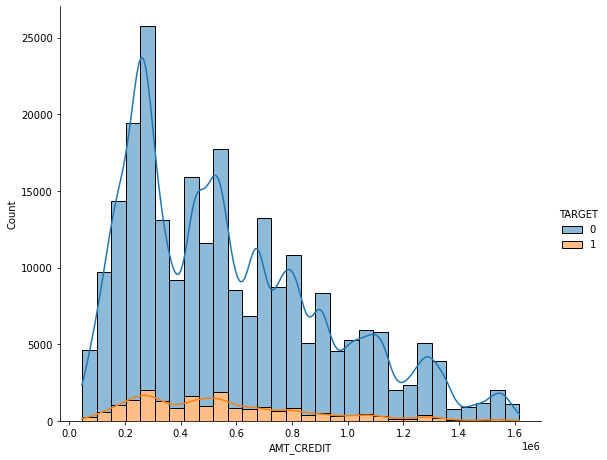

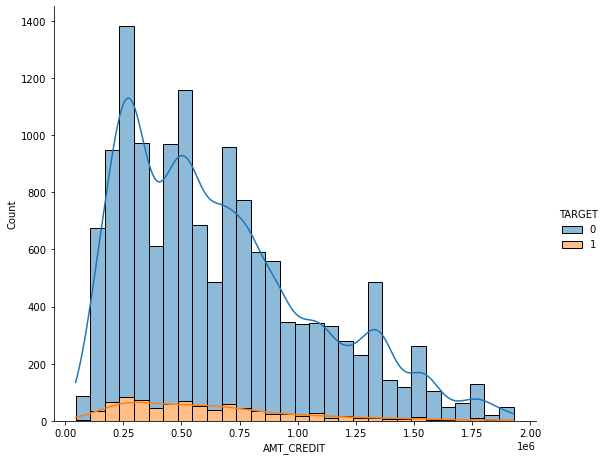

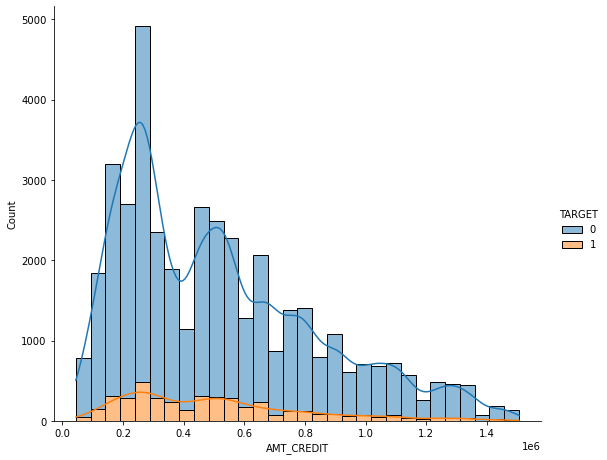

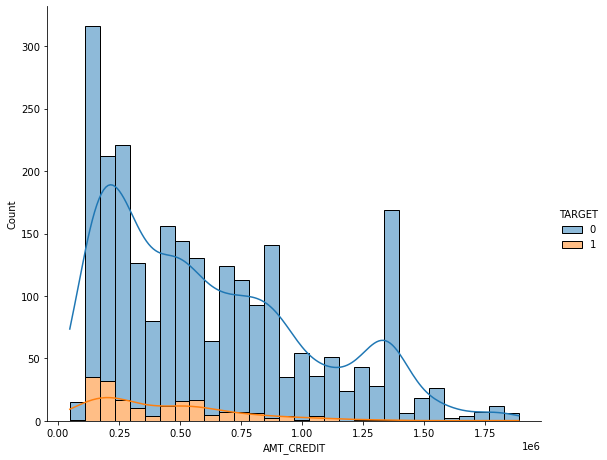

In [215]:
for df_train in train_set:
    plot_dist_outliers(df_train, 'AMT_CREDIT', bins=30)

### 5.6. LOAN_INCOME_RATIO
`NEW - Loan amount to income ratio`
<br>
[top](#Contents)


Credit amount are usually in the lower ranges below 300,000. Looking at this feature in isolation might not give additional insight. Let's generate a loan to income ratio to see if we can glean more information:

In [216]:
for df_train in train_set:
    df_train['LOAN_INCOME_RATIO'] = df_train['AMT_CREDIT']/df_train['AMT_INCOME_TOTAL']

for df_test in test_set:
    df_test['LOAN_INCOME_RATIO'] = df_test['AMT_CREDIT']/df_test['AMT_INCOME_TOTAL']

<ipython-input-216-39f5cebab1a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LOAN_INCOME_RATIO'] = df_train['AMT_CREDIT']/df_train['AMT_INCOME_TOTAL']
<ipython-input-216-39f5cebab1a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['LOAN_INCOME_RATIO'] = df_test['AMT_CREDIT']/df_test['AMT_INCOME_TOTAL']


In [217]:
for df_train in train_set:
    print(df_train['LOAN_INCOME_RATIO'].describe())
    print()
    
for df_test in test_set:
    print(df_test['LOAN_INCOME_RATIO'].describe())
    print()

count    248631.000000
mean          3.924524
std           2.669054
min           0.066667
25%           2.000000
50%           3.228543
75%           5.115327
max          49.227200
Name: LOAN_INCOME_RATIO, dtype: float64

count    14859.000000
mean         4.296729
std          2.683892
min          0.116379
25%          2.303846
50%          3.725399
75%          5.726000
max         27.970000
Name: LOAN_INCOME_RATIO, dtype: float64

count    41433.000000
mean         4.022175
std          2.787645
min          0.037500
25%          2.088276
50%          3.300267
75%          5.200000
max         84.736842
Name: LOAN_INCOME_RATIO, dtype: float64

count    2587.000000
mean        4.152422
std         2.933910
min         0.213200
25%         2.000000
50%         3.333333
75%         5.609640
max        22.435119
Name: LOAN_INCOME_RATIO, dtype: float64

count    41430.000000
mean         3.159392
std          2.131891
min          0.092500
25%          1.685333
50%          2.658593


In [218]:
# investigate the high loan_income_ratio
train_1.loc[train_1['LOAN_INCOME_RATIO']>40]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
35791     141454       0         Cash loans            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35791                1             0           45000.0   2215224.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
35791      58567.5        1980000.0   Unaccompanied                 1   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
35791                    2            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35791                    0.020713      -22270            NaN   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35791           -12164.0            -5325         64.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35791               0                0                 1           1   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
35791           0             NaN              2.0   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35791                            2                     MONDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35791                        6                           0   

       REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
35791                           0                       0   

       REG_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
35791                       0               XNA           NaN       0.50906   

       EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
35791      0.832785           0.167            0.1113   

       YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
35791                       0.9831           0.7688           0.038   

       ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
35791           0.24         0.2069         0.3333          0.375   

       LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
35791        0.2195                0.1362          0.2094   

       NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
35791                      0.0                0.0           0.1702   

       BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
35791             0.1155                        0.9831            0.7779   

       COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
35791           0.0383          0.2417          0.2069          0.3333   

       FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
35791           0.375         0.2245                 0.1488           0.2182   

       NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
35791                       0.0                 0.0           0.1686   

       BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
35791             0.1113                        0.9831            0.7719   

       COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
35791           0.0382            0.24          0.2069          0.3333   

       FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
35791           0.375         0.2233                 0.1385           0.2132   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI     FONDKAPREMONT_MODE  \
35791                       0.0                 0.0  reg oper spec account   

       HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
35791  block of flats          0.1647              Panel                  No   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
35791                       1.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
35791                       1.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
35791  

In [219]:
# investigate the high loan_income_ratio
train_2.loc[train_2['LOAN_INCOME_RATIO']>20]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
122677     242234       0         Cash loans            0             1   
157156     282166       0         Cash loans            0             0   
283732     428589       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
122677                0             0           90000.0   2517300.0   
157156                0             0           90000.0   2517300.0   
283732                1             0           67500.0   1800000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
122677      66532.5        2250000.0          Family                 3   
157156      66402.0        2250000.0   Unaccompanied                 1   
283732      47614.5        1800000.0          Family                 1   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
122677                    4            Married  House / apartment   
157156                    4            Married  House / apartment   
283732                    2            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
122677                    0.072508      -11899        -2509.0   
157156                    0.007114      -19818            NaN   
283732                    0.028663      -21970            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
122677            -5815.0            -4345          3.0           1   
157156            -6578.0            -3343          NaN           1   
283732            -5918.0            -4224          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
122677               1                0                 1           1   
157156               0                0                 1           0   
283732               0                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
122677           0        Managers              2.0   
157156           0             NaN              2.0   
283732           0             NaN              2.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
122677                            1                     MONDAY   
157156                            2                    TUESDAY   
283732                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
122677                       20                           0   
157156                       15                           0   
283732                       15                           0   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
122677                           0                       0   
157156                           0                       0   
283732                           0                       0   

        REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
122677                       0  Business Entity Type 3           NaN   
157156                       0                     XNA           NaN   
283732                       0                     XNA           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
122677      0.747656      0.766234          0.4469            0.2742   
157156      0.521970      0.558507          0.0660               NaN   
283732      0.760377      0.638044             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
122677                       0.9811           0.7416          0.0767   
157156                       0.9752              NaN             NaN   
283732                       0.9732              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
122677           0.68         0.2931         0.5417         0.5833   
157156       

In [220]:
# investigate the high loan_income_ratio
train_3.loc[train_3['LOAN_INCOME_RATIO']>50]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
20727     124157       1         Cash loans            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
20727                1             0           25650.0   2173500.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
20727      48118.5        2173500.0   Unaccompanied                 1   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
20727                    2     Civil marriage  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
20727                    0.035792      -21517            NaN   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
20727            -1669.0            -4962          2.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
20727               0                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
20727           0             NaN              2.0   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
20727                            2                     MONDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
20727                       14                           0   

       REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
20727                           0                       0   

       REG_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
20727                       0               XNA      0.498675      0.175965   

       EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
20727           NaN             NaN               NaN   

       YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
20727                          NaN              NaN             NaN   

       ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
20727            NaN            NaN            NaN            NaN   

       LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
20727           NaN                   NaN             NaN   

       NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
20727                      NaN                NaN              NaN   

       BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
20727                NaN                           NaN               NaN   

       COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
20727              NaN             NaN             NaN             NaN   

       FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
20727             NaN            NaN                    NaN              NaN   

       NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
20727                       NaN                 NaN              NaN   

       BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
20727                NaN                           NaN               NaN   

       COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
20727              NaN             NaN             NaN             NaN   

       FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
20727             NaN            NaN                    NaN              NaN   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
20727                       NaN                 NaN                NaN   

      HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
20727            NaN             NaN                NaN                 NaN   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
20727                       2.0                       1.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
20727                       2.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
20727            

In [221]:
# investigate the high loan_income_ratio
train_4.loc[train_4['LOAN_INCOME_RATIO']>20]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
166247     292743       0         Cash loans            0             0   
232869     369713       0         Cash loans            0             0   
303587     451741       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
166247                1             0          103500.0   2115000.0   
232869                0             0           40500.0    835380.0   
303587                0             0           34852.5    781920.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
166247      55921.5        2115000.0          Family                 1   
232869      31086.0         675000.0   Unaccompanied                 2   
303587      23836.5         675000.0   Unaccompanied                 1   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
166247                    2            Married  House / apartment   
232869                    4            Married  House / apartment   
303587                    2          Separated  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
166247                    0.019689      -22701            NaN   
232869                    0.035792      -13075        -5068.0   
303587                    0.010006      -20635            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
166247            -3648.0            -4072          NaN           1   
232869            -7048.0            -3984          NaN           1   
303587            -1079.0             -271          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
166247               0                0                 1           0   
232869               1                0                 1           1   
303587               0                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
166247           0             NaN              2.0   
232869           0     Accountants              2.0   
303587           0             NaN              1.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
166247                            2                    TUESDAY   
232869                            2                  WEDNESDAY   
303587                            1                  WEDNESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
166247                       13                           0   
232869                       13                           0   
303587                        7                           0   

        REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
166247                           0                       0   
232869                           0                       0   
303587                           0                       0   

        REG_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
166247                       0               XNA           NaN      0.310050   
232869                       0        Government      0.820249      0.581656   
303587                       0               XNA           NaN      0.640997   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
166247           NaN             NaN               NaN   
232869           NaN          0.3402            0.1775   
303587           NaN          0.2804            0.3385   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
166247                          NaN              NaN             NaN   
232869                       0.9871           0.8232          0.0721   
303587                       0.9876           0.8300          0.0662   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
166247            NaN            NaN            NaN            NaN   
232869           0.36         0.3103 

We make 2 observations from these outliers:
- high loan income ratio tends to be given to pensioners, perhaps due to their stable guaranteed income stream
- the company tends to give much higher loan income ratio to repeat customers and are more stringent to new customers

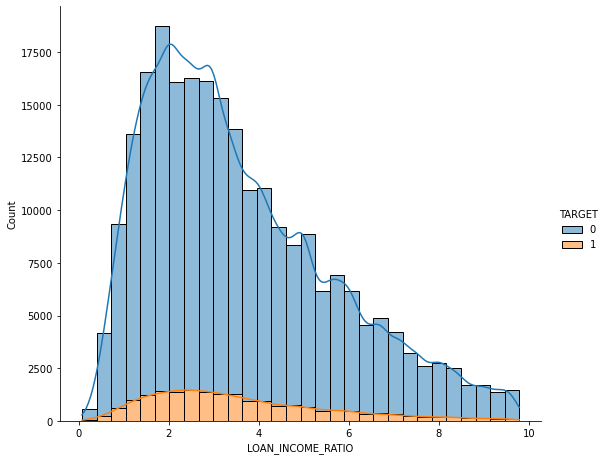

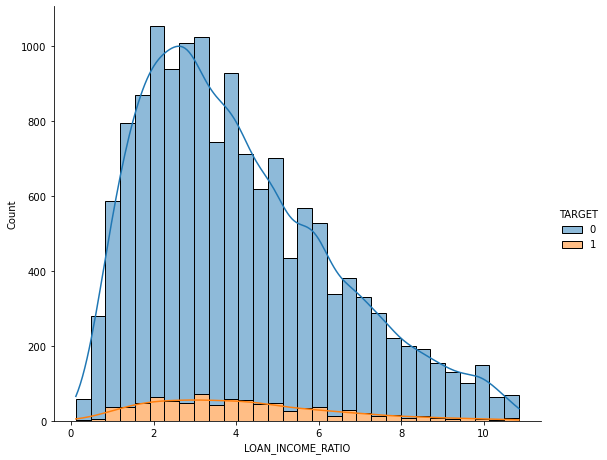

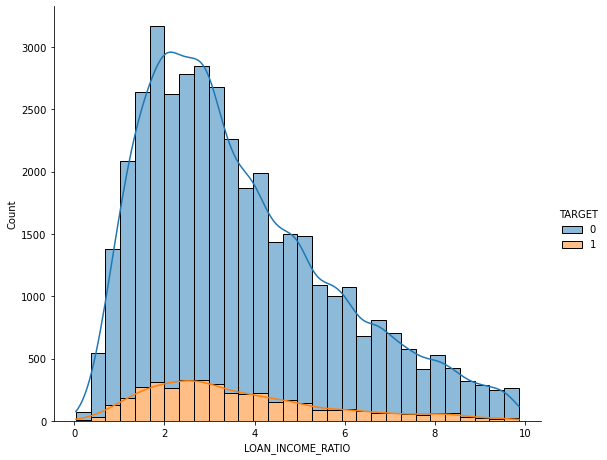

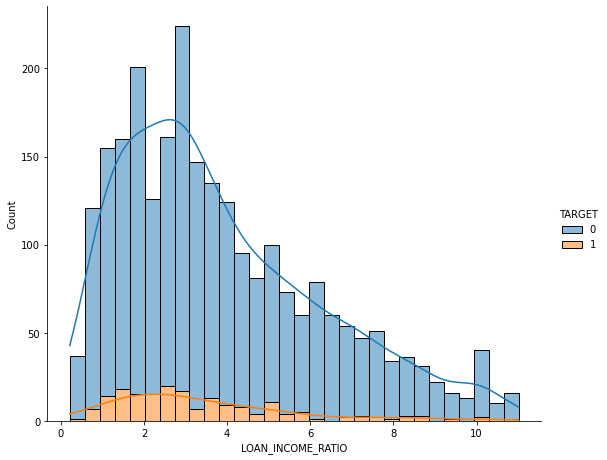

In [222]:
for df_train in train_set:
    plot_dist_outliers(df_train, 'LOAN_INCOME_RATIO', bins=30)

Most of the loans given out were less than 5x monthly income and there are some evidence that default rates tend to increase when loan income ratio increases, typically after 3.5x loan income ratio, evidenced by the gradient decline in the kde plots. 

### 5.7. ANNUITY_INCOME_RATIO
`NEW - Annunity amount to income ratio`
<br>
[top](#Contents)

Similarly, looking at AMT_ANNUITY in isolation might not derive good insights. Instead, we shall look at the ANNUITY_INCOME_RATIO to see how much the applicant has to pay based on the monthly income:

In [223]:
for df_train in train_set:
    df_train['ANNUITY_INCOME_RATIO'] = df_train['AMT_ANNUITY']/df_train['AMT_INCOME_TOTAL']

for df_test in test_set:
    df_test['ANNUITY_INCOME_RATIO'] = df_test['AMT_ANNUITY']/df_test['AMT_INCOME_TOTAL']

<ipython-input-223-5f00c650290a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ANNUITY_INCOME_RATIO'] = df_train['AMT_ANNUITY']/df_train['AMT_INCOME_TOTAL']
<ipython-input-223-5f00c650290a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ANNUITY_INCOME_RATIO'] = df_test['AMT_ANNUITY']/df_test['AMT_INCOME_TOTAL']


In [224]:
for df_train in train_set:
    print(df_train['ANNUITY_INCOME_RATIO'].describe())
    print()
    
for df_test in test_set:
    print(df_test['ANNUITY_INCOME_RATIO'].describe())
    print()

count    248620.000000
mean          0.179146
std           0.093344
min           0.003333
25%           0.113667
50%           0.161300
75%           0.226093
max           1.570600
Name: ANNUITY_INCOME_RATIO, dtype: float64

count    14859.000000
mean         0.167221
std          0.086864
min          0.006000
25%          0.103854
50%          0.151700
75%          0.214033
max          0.833333
Name: ANNUITY_INCOME_RATIO, dtype: float64

count    41432.000000
mean         0.196279
std          0.101597
min          0.003850
25%          0.124994
50%          0.178593
75%          0.248328
max          1.875965
Name: ANNUITY_INCOME_RATIO, dtype: float64

count    2587.000000
mean        0.185340
std         0.109273
min         0.011111
25%         0.104957
50%         0.166667
75%         0.247073
max         1.000000
Name: ANNUITY_INCOME_RATIO, dtype: float64

count    41409.000000
mean         0.180518
std          0.093854
min          0.005730
25%          0.114600
50%       

In [225]:
# investigate the high annuity_income_ratio
train_1.loc[train_1['ANNUITY_INCOME_RATIO']>1.2]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
35791      141454       0         Cash loans            0             1   
197677     329192       0         Cash loans            0             0   
200894     332872       0         Cash loans            0             0   
226137     361920       1         Cash loans            0             0   
247615     386520       0         Cash loans            0             1   
293599     440148       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35791                 1             0           45000.0   2215224.0   
197677                1             0           45000.0    743031.0   
200894                1             1           40500.0   1223010.0   
226137                1             0           45000.0   1800000.0   
247615                1             0           31500.0    679500.0   
293599                1             0           33165.0   1006920.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
35791       58567.5        1980000.0    Unaccompanied                 1   
197677      70677.0         688500.0    Unaccompanied                 1   
200894      51948.0        1125000.0    Unaccompanied                 4   
226137      62698.5        1800000.0    Unaccompanied                 1   
247615      45724.5         679500.0  Spouse, partner                 3   
293599      42790.5         900000.0    Unaccompanied                 1   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
35791                     2            Married  House / apartment   
197677                    2            Married  House / apartment   
200894                    2            Married  House / apartment   
226137                    2            Married  House / apartment   
247615                    4            Married  House / apartment   
293599                    2            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35791                     0.020713      -22270            NaN   
197677                    0.020246      -23087            NaN   
200894                    0.002134      -16937        -3207.0   
226137                    0.026392      -23681            NaN   
247615                    0.018209      -17677        -1755.0   
293599                    0.031329      -23760            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35791            -12164.0            -5325         64.0           1   
197677           -13967.0            -4289          NaN           1   
200894            -5605.0             -473          NaN           1   
226137            -3102.0            -4685          NaN           1   
247615            -1013.0            -1238         15.0           1   
293599             -371.0            -4901          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35791                0                0                 1           1   
197677               0                0                 1           1   
200894               1                0                 1           0   
226137               0                0                 1           0   
247615               1                0                 1           0   
293599               0                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
35791            0             NaN              2.0   
197677           0             NaN              2.0   
200894           0        Laborers              3.0   
226137           0             NaN              2.0   
247615           0     Accountants              2.0   
293599           0             NaN              2.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35791                             2                    

In [226]:
# investigate the high annuity_income_ratio
train_2.loc[train_2['ANNUITY_INCOME_RATIO']>0.7]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
15501      118093       0    Revolving loans            0             1   
55351      164131       0         Cash loans            0             0   
57436      166564       0         Cash loans            0             1   
122677     242234       0         Cash loans            0             1   
140391     262796       0         Cash loans            0             0   
157156     282166       0         Cash loans            0             0   
178438     306771       0         Cash loans            0             0   
192620     323370       0         Cash loans            0             0   
197878     329425       0    Revolving loans            0             1   
283732     428589       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15501                 1             0          270000.0   2250000.0   
55351                 1             0           54000.0    728460.0   
57436                 1             0           67500.0   1113399.0   
122677                0             0           90000.0   2517300.0   
140391                0             1           31500.0    432567.0   
157156                0             0           90000.0   2517300.0   
178438                1             0           45000.0    755190.0   
192620                1             0           31500.0    239850.0   
197878                1             0           90000.0   1350000.0   
283732                1             0           67500.0   1800000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
15501      225000.0        2250000.0   Unaccompanied                 3   
55351       38938.5         675000.0   Unaccompanied                 1   
57436       49666.5         945000.0   Unaccompanied                 2   
122677      66532.5        2250000.0          Family                 3   
140391      22216.5         328500.0   Unaccompanied                 1   
157156      66402.0        2250000.0   Unaccompanied                 1   
178438      33264.0         675000.0   Unaccompanied                 1   
192620      25960.5         225000.0   Unaccompanied                 1   
197878      67500.0        1350000.0   Unaccompanied                 3   
283732      47614.5        1800000.0          Family                 1   

        NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15501                     4               Married   Rented apartment   
55351                     2               Married  House / apartment   
57436                     2               Married  House / apartment   
122677                    4               Married  House / apartment   
140391                    2               Married  House / apartment   
157156                    4               Married  House / apartment   
178438                    2  Single / not married  House / apartment   
192620                    2               Married  House / apartment   
197878                    4               Married  House / apartment   
283732                    2               Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15501                     0.010006      -19672       -12615.0   
55351                     0.018801      -21571            NaN   
57436                     0.035792      -17268        -4122.0   
122677                    0.072508      -11899        -2509.0   
140391                    0.007120      -20745            NaN   
157156                    0.007114      -19818            NaN   
178438                    0.024610      -23300            NaN   
192620                    0.010276      -24724            NaN   
197878                    0.031329      -18915        -6558.0   
283732                    0.028663      -21970            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
1550

In [227]:
# investigate the high annuity_income_ratio
train_3.loc[train_3['ANNUITY_INCOME_RATIO']>1]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
678        100784       1         Cash loans            0             0   
20727      124157       1         Cash loans            0             1   
25802      129999       0         Cash loans            0             0   
168253     295032       0         Cash loans            0             0   
205575     338291       1         Cash loans            0             0   
228229     364354       0         Cash loans            0             0   
266975     409321       0         Cash loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
678                   1             0           54000.0   1885500.0   
20727                 1             0           25650.0   2173500.0   
25802                 1             0           46044.0   1024740.0   
168253                1             0           67500.0   2085120.0   
205575                0             0           36000.0   1223010.0   
228229                1             2           45000.0    473760.0   
266975                0             0           27000.0    640080.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
678         74191.5        1885500.0   Unaccompanied                 1   
20727       48118.5        2173500.0   Unaccompanied                 1   
25802       52452.0         900000.0   Unaccompanied                 1   
168253      72607.5        1800000.0          Family                 1   
205575      48627.0        1125000.0          Family                 1   
228229      46858.5         450000.0   Unaccompanied                 4   
266975      31261.5         450000.0   Unaccompanied                 1   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
678                       2            Married  House / apartment   
20727                     2     Civil marriage  House / apartment   
25802                     2            Married  House / apartment   
168253                    2            Married  House / apartment   
205575                    2            Married  House / apartment   
228229                    2            Married  House / apartment   
266975                    2            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
678                       0.031329      -22181            NaN   
20727                     0.035792      -21517            NaN   
25802                     0.002134      -20148            NaN   
168253                    0.010006      -19661            NaN   
205575                    0.035792      -23020            NaN   
228229                    0.026392      -12717        -1570.0   
266975                    0.004960      -21994            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
678              -14266.0            -4714          NaN           1   
20727             -1669.0            -4962          2.0           1   
25802             -4362.0            -2417          NaN           1   
168253            -5166.0            -3123          NaN           1   
205575           -10800.0            -4958          NaN           1   
228229            -5914.0            -4228          NaN           1   
266975            -5990.0            -4373          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
678                  0                0                 1           0   
20727                0                0                 1           0   
25802                0                0                 1           0   
168253               0                0                 1           0   
205575               0                0                 1           0   
228229               1                1                 1           1   
266975               0                0                 1           1   

        FLAG_EMA

In [228]:
# investigate the high annuity_income_ratio
train_4.loc[train_4['ANNUITY_INCOME_RATIO']>0.7]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
100998     217266       0         Cash loans            0             0   
145707     268946       0    Revolving loans            1             1   
166449     292969       0         Cash loans            1             1   
232869     369713       0         Cash loans            0             0   
254225     394177       0         Cash loans            0             1   
254831     394877       0    Revolving loans            0             0   
268587     411258       0    Revolving loans            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
100998                1             0           43200.0    615109.5   
145707                1             0          225000.0   2250000.0   
166449                1             0          139500.0   1795500.0   
232869                0             0           40500.0    835380.0   
254225                1             0           31500.0    241618.5   
254831                0             0           63000.0    900000.0   
268587                1             0          157500.0   2250000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
100998      31374.0         531000.0  Spouse, partner                 1   
145707     225000.0        2250000.0    Unaccompanied                 4   
166449     123282.0        1795500.0    Unaccompanied                 4   
232869      31086.0         675000.0    Unaccompanied                 2   
254225      22486.5         229500.0           Family                 1   
254831      45000.0         900000.0         Children                 1   
268587     112500.0        2250000.0           Family                 3   

        NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
100998                    2            Married  House / apartment   
145707                    4            Married  House / apartment   
166449                    4            Married  House / apartment   
232869                    4            Married  House / apartment   
254225                    2            Married   Rented apartment   
254831                    2     Civil marriage  House / apartment   
268587                    4     Civil marriage  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
100998                    0.025164      -22232            NaN   
145707                    0.005144      -18325        -5130.0   
166449                    0.005144      -19095         -203.0   
232869                    0.035792      -13075        -5068.0   
254225                    0.007330      -23613            NaN   
254831                    0.024610      -18465            NaN   
268587                    0.035792      -10424         -599.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
100998            -9309.0            -5046          NaN           1   
145707            -5726.0            -1861          5.0           1   
166449            -1083.0            -2638          3.0           1   
232869            -7048.0            -3984          NaN           1   
254225            -3505.0            -4549          8.0           1   
254831             -419.0            -2002          NaN           1   
268587            -3040.0            -3042          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
100998               0                0                 1           1   
145707               1                0                 1           0   
166449               1                0                 1           0   
232869               1                0                 1           1   
254225               0                0                 1           0   
254831               0                0                 1           0   
268587               1                0                 1           0   

        

Simlarly:
- high annuity income ratio tends to be given to pensioners, perhaps due to their stable guaranteed income stream
- the company tends to give much higher annuity income ratio to repeat customers and are more stringent to new customers

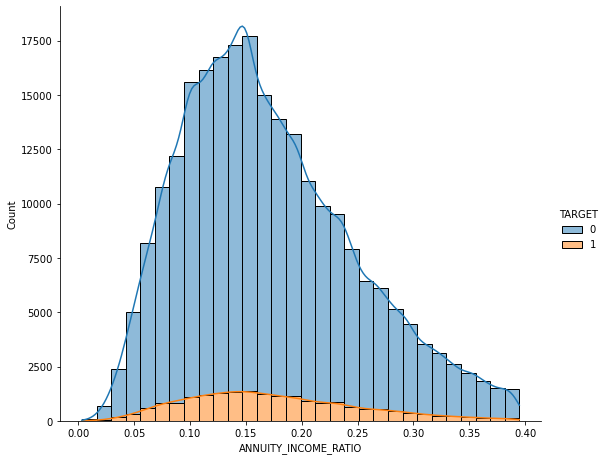

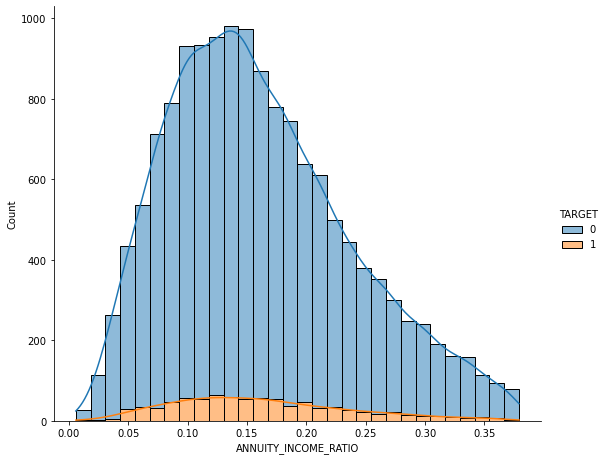

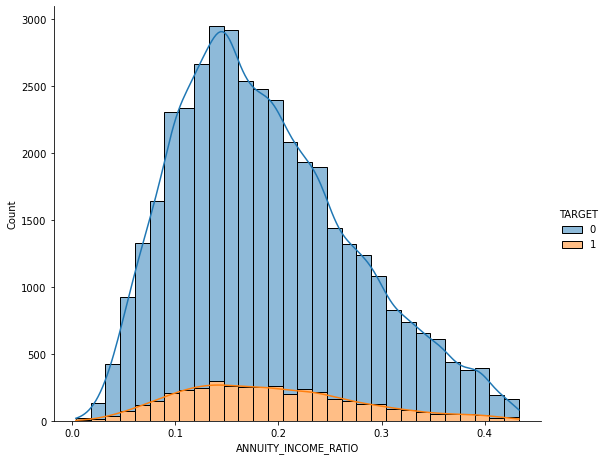

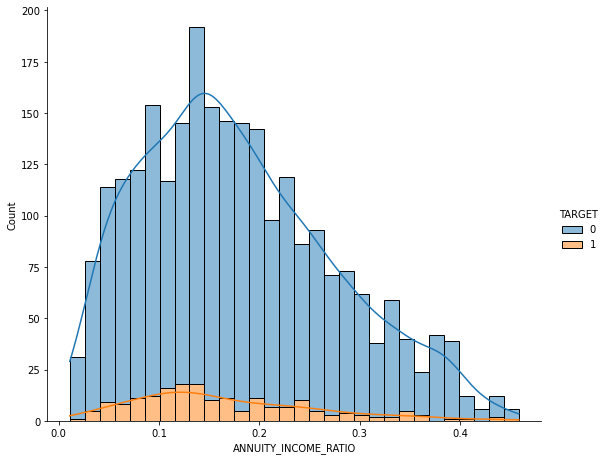

In [229]:
for df_train in train_set:
    plot_dist_outliers(df_train, 'ANNUITY_INCOME_RATIO', bins=30)

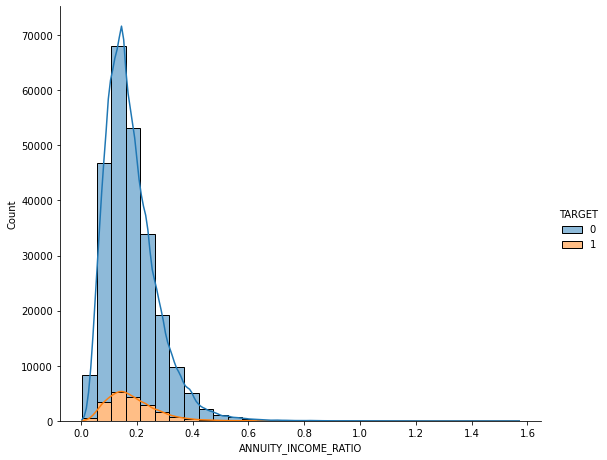

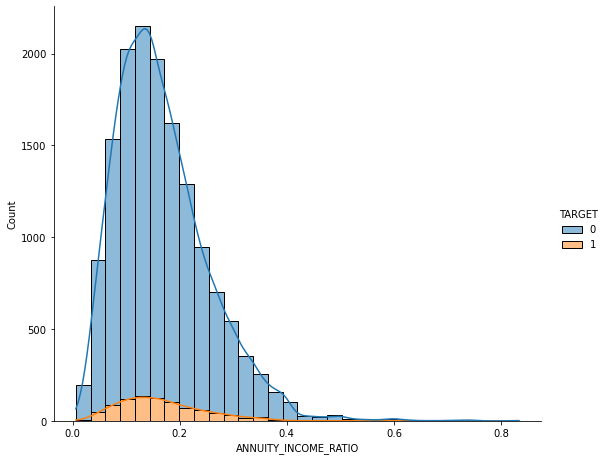

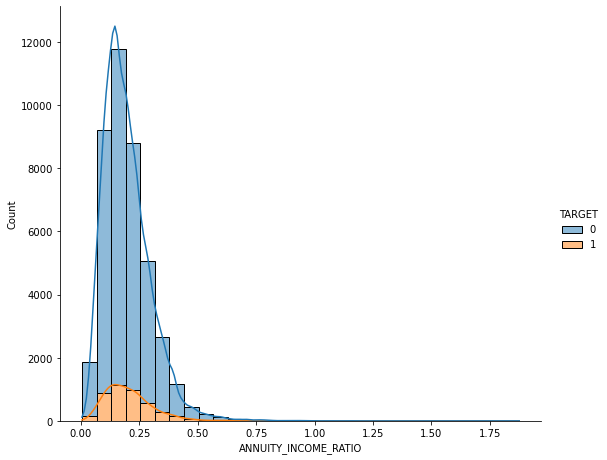

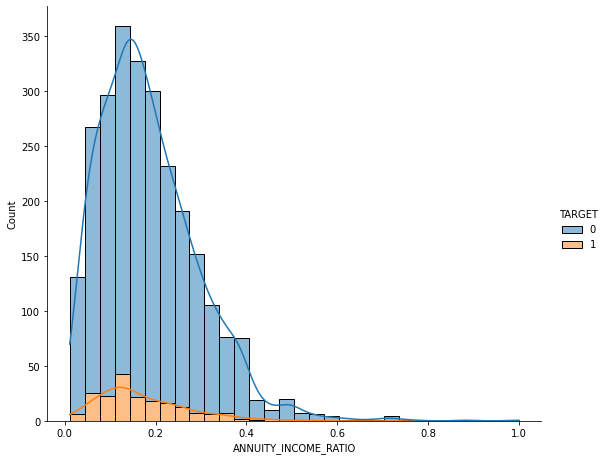

In [230]:
for df_train in train_set:
    plot_dist(df_train, 'ANNUITY_INCOME_RATIO', bins=30)

Similarly, most of the monthly repayment rate is less than 20% of the monthly income of the applicant while default rates generally increase when monthly repayment rate is higher than 15% of monthly income.


### 5.8. REGION_POPULATION_RELATIVE
`Normalized population of region where client lives`
<br>
[top](#Contents)

In [231]:
for df_train in train_set:
    print(df_train['REGION_POPULATION_RELATIVE'].describe())
    print()
    
for df_test in test_set:
    print(df_test['REGION_POPULATION_RELATIVE'].describe())
    print()

count    248631.000000
mean          0.020606
std           0.013503
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

count    14859.000000
mean         0.024047
std          0.016578
min          0.000938
25%          0.010500
50%          0.020246
75%          0.030755
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

count    41433.000000
mean         0.020976
std          0.014223
min          0.000533
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

count    2587.000000
mean        0.026057
std         0.017478
min         0.001276
25%         0.011680
50%         0.022625
75%         0.031329
max         0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

count    41430.000000
mean         0.021030
std          0.014255
min          0.000253
25%     

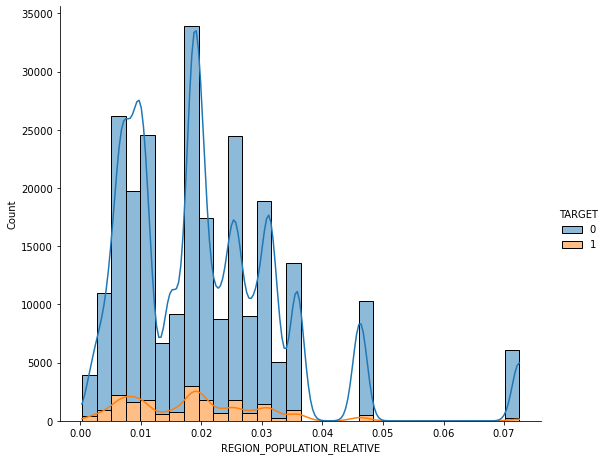

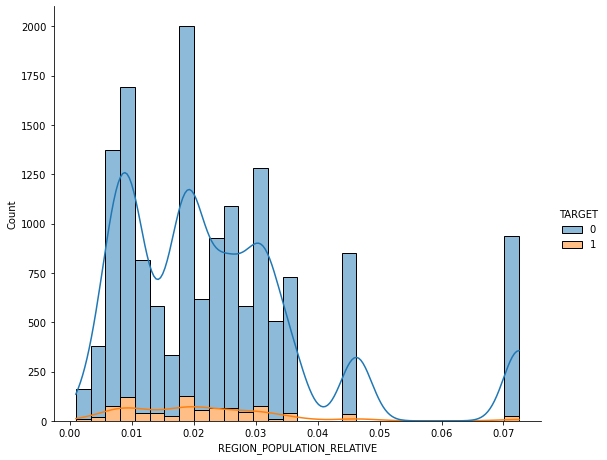

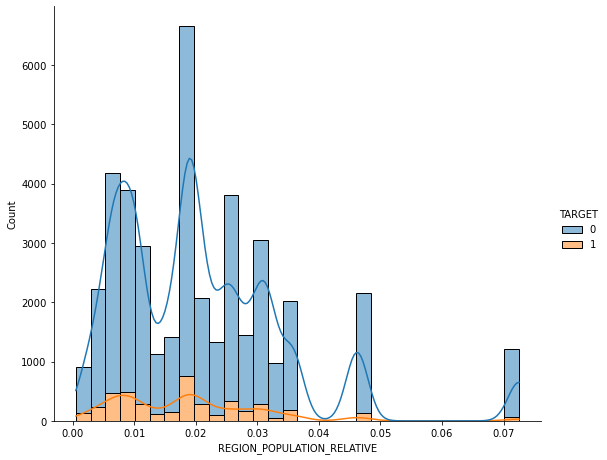

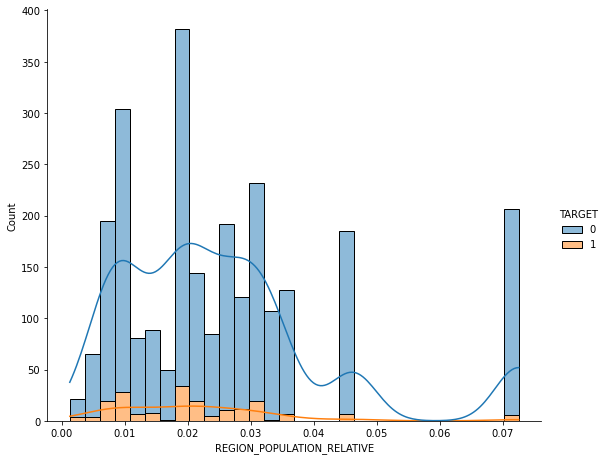

In [232]:
for df_train in train_set:
    plot_dist(df_train, 'REGION_POPULATION_RELATIVE', bins=30)

There doesn't seem to be a clear signal or trend for `REGION_POPULATION_RELATIVE` although the default rate seem to be higher for the 0.02 to 0.035 range across all groups. 

### 5.9. DAYS_REGISTRATION
`How many days before the application did applicant change his registration`
<br>
[top](#Contents)


In [233]:
for df_train in train_set:
    print(df_train['DAYS_REGISTRATION'].describe())
    print()
    
for df_test in test_set:
    print(df_test['DAYS_REGISTRATION'].describe())
    print()

count    248631.000000
mean      -4985.657308
std        3514.535729
min      -24672.000000
25%       -7468.000000
50%       -4513.000000
75%       -2015.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

count    14859.000000
mean     -4846.343159
std       3609.715054
min     -20840.000000
25%      -7369.000000
50%      -4365.000000
75%      -1660.000000
max          0.000000
Name: DAYS_REGISTRATION, dtype: float64

count    41433.000000
mean     -5041.393792
std       3539.812115
min     -23416.000000
25%      -7574.000000
50%      -4504.000000
75%      -2118.000000
max          0.000000
Name: DAYS_REGISTRATION, dtype: float64

count     2587.000000
mean     -4947.523000
std       3527.395085
min     -23738.000000
25%      -7459.000000
50%      -4505.000000
75%      -2005.000000
max          0.000000
Name: DAYS_REGISTRATION, dtype: float64

count    41430.000000
mean     -4957.876732
std       3546.813050
min     -23722.000000
25%      -7439.750000
50%      -4480

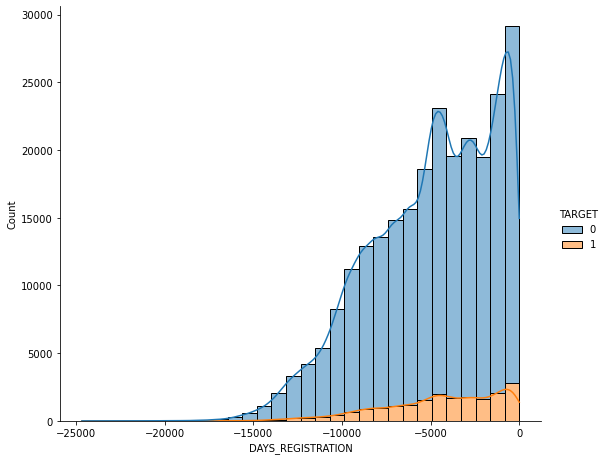

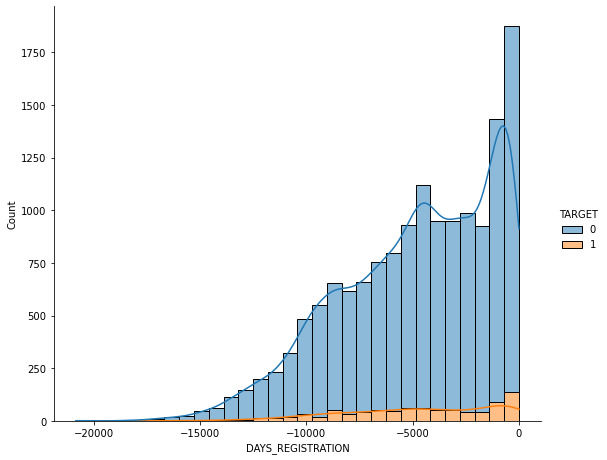

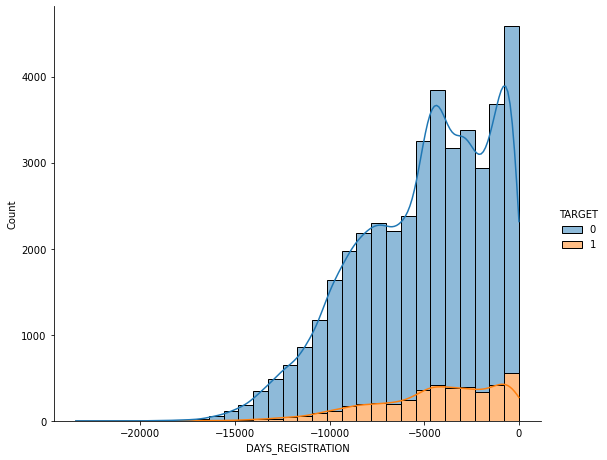

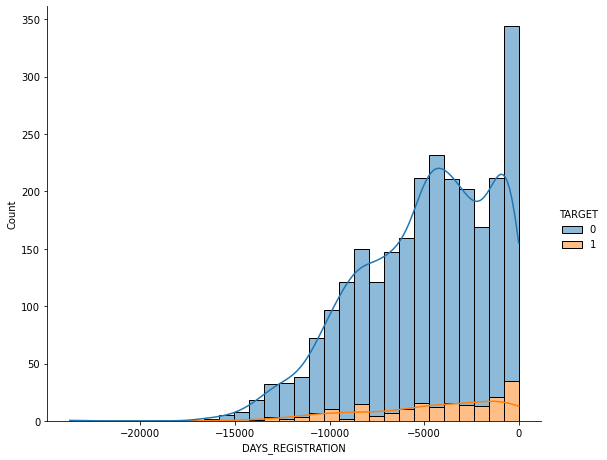

In [234]:
for df_train in train_set:
    plot_dist(df_train, 'DAYS_REGISTRATION', bins=30)

The more days since the applicant last change his registration details, the higher the default rate. This is perhaps due to the company making decisions based on outdated information of the client and thus not making the best optimal decision. 

### 5.10. DAYS_ID_PUBLISH
`How many days before the application did applicant change the identity document with which he applied for the loan`
<br>
[top](#Contents)

In [235]:
for df_train in train_set:
    print(df_train['DAYS_ID_PUBLISH'].describe())
    print()
    
for df_test in test_set:
    print(df_test['DAYS_ID_PUBLISH'].describe())
    print()

count    248631.000000
mean      -3041.907518
std        1492.151748
min       -7197.000000
25%       -4316.000000
50%       -3322.000000
75%       -1805.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

count    14859.000000
mean     -3071.263477
std       1467.404417
min      -6208.000000
25%      -4330.000000
50%      -3364.000000
75%      -1852.000000
max         -1.000000
Name: DAYS_ID_PUBLISH, dtype: float64

count    41433.000000
mean     -2693.603842
std       1582.523661
min      -6232.000000
25%      -4171.000000
50%      -2751.000000
75%      -1242.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

count    2587.000000
mean    -2780.836104
std      1620.794874
min     -6235.000000
25%     -4286.000000
50%     -2972.000000
75%     -1266.000000
max        -4.000000
Name: DAYS_ID_PUBLISH, dtype: float64

count    41430.000000
mean     -3101.002196
std       1553.170545
min      -6348.000000
25%      -4469.000000
50%      -3307.000000
75%     

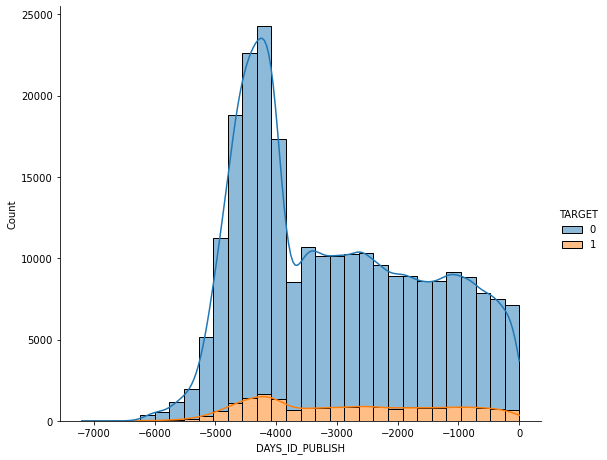

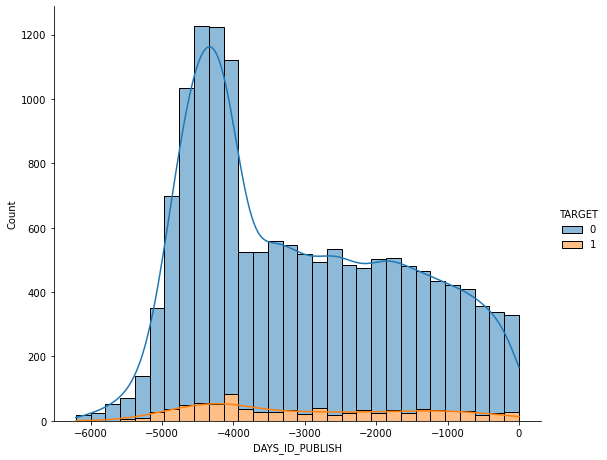

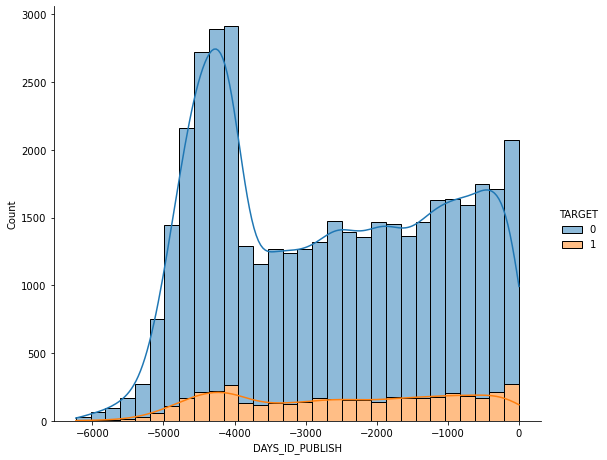

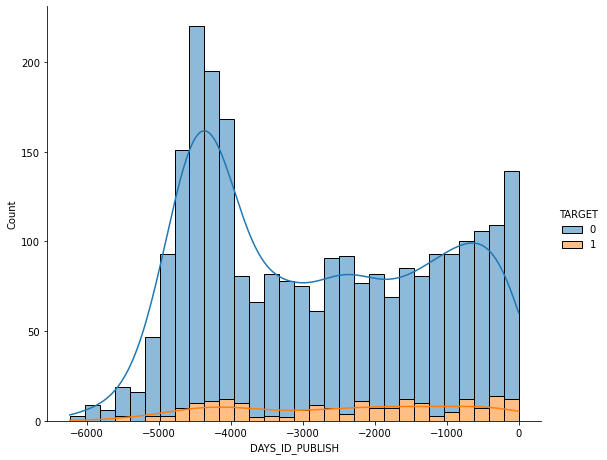

In [236]:
for df_train in train_set:
    plot_dist(df_train, 'DAYS_ID_PUBLISH', bins=30)

Not much can be gleaned from here except for the the notably bulge in -4000 to -4600 days. We posit that this is the difference between the age when the applicant is first eligible to and receives his identity document and the age when the applicant is able to take out a loan, or the date where the next change of identity card is scheduled. 

### 5.11. OWN_CAR_AGE
`Age of applicant's car`
<br>
[top](#Contents)


In [237]:
for df_train in train_set:
    print(df_train['OWN_CAR_AGE'].describe())
    print()
    
for df_test in test_set:
    print(df_test['OWN_CAR_AGE'].describe())
    print()


count    86138.000000
mean        12.173338
std         12.139985
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

count    5637.000000
mean        8.846372
std         9.053964
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        65.000000
Name: OWN_CAR_AGE, dtype: float64

count    11996.000000
mean        12.989747
std         11.673221
min          0.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         65.000000
Name: OWN_CAR_AGE, dtype: float64

count    811.000000
mean       8.747226
std        7.979231
min        0.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       65.000000
Name: OWN_CAR_AGE, dtype: float64

count    14326.000000
mean        11.715971
std         11.544990
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         74.000000
Name

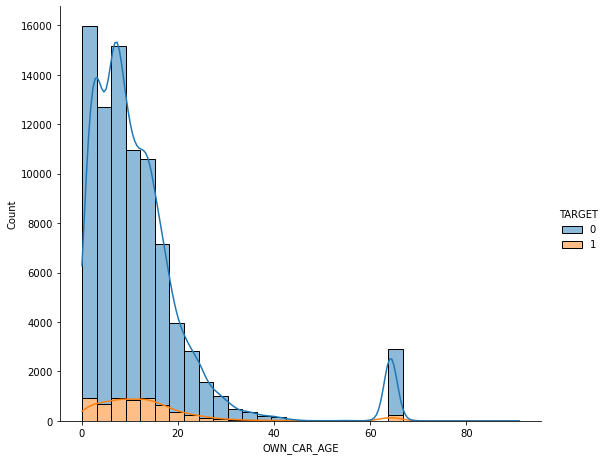

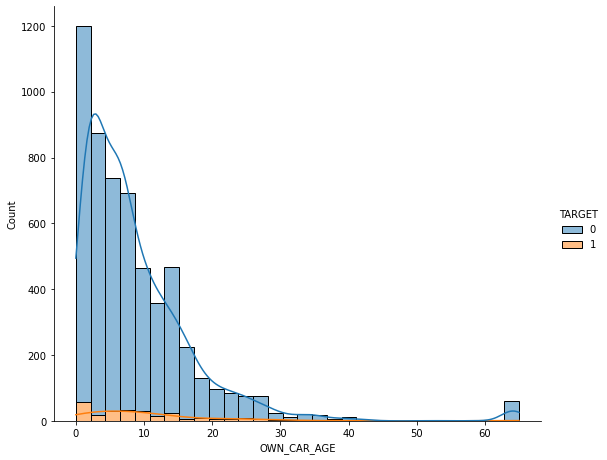

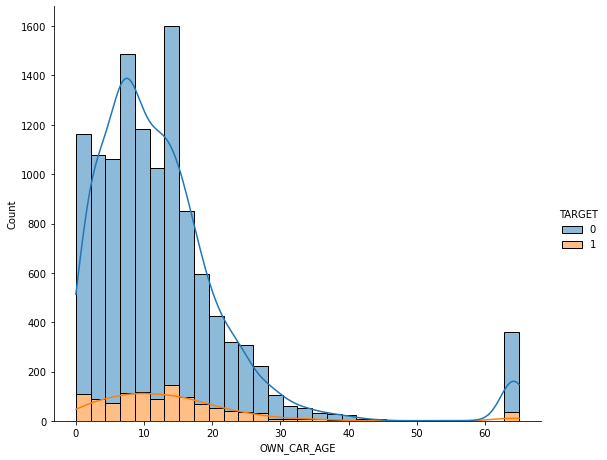

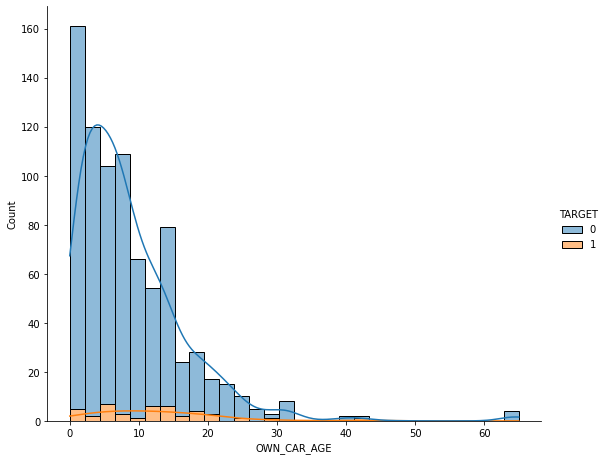

In [238]:
for df_train in train_set:
    plot_dist(df_train, 'OWN_CAR_AGE', bins=30)

In [239]:
# creating the intervals of car age
bins_int = [0, 4, 7, 10, 15, 150]

bins_label = ['0-4', '4-7', '7-10', '10-15', 'more than 15']

for df_train in train_set:
    df_train['CAR_BINS'] = pd.cut(df_train.OWN_CAR_AGE, 
                                  bins=bins_int, 
                                  right=False, 
                                  labels=bins_label, 
                                  include_lowest=True)
    df_train['CAR_BINS'] = df_train['CAR_BINS'].astype(str)
    df_train['CAR_BINS'].fillna('NA', inplace=True) 
    
    
for df_test in test_set:
    df_test['CAR_BINS'] = pd.cut(df_test.OWN_CAR_AGE, 
                                  bins=bins_int, 
                                  right=False, 
                                  labels=bins_label, 
                                  include_lowest=True)
    df_test['CAR_BINS'] = df_test['CAR_BINS'].astype(str)
    df_test['CAR_BINS'].fillna('NA', inplace=True) 

<ipython-input-239-88cec674a3f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CAR_BINS'] = pd.cut(df_train.OWN_CAR_AGE,
<ipython-input-239-88cec674a3f4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CAR_BINS'] = df_train['CAR_BINS'].astype(str)
C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [240]:
car_bins_replace = {'0-4': 5, '4-7': 4, '7-10': 3, '10-15': 2, 'more than 15': 1, 'NA': 0}

for df_train in train_set:
    df_train['CAR_BINS'].replace(car_bins_replace, inplace=True)

for df_test in test_set:
    df_test['CAR_BINS'].replace(car_bins_replace, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [241]:
for df_train in train_set:
    print(df_train['CAR_BINS'].value_counts())
    print()

0    162493
1     23721
2     18569
5     15965
3     15175
4     12708
Name: CAR_BINS, dtype: int64

0    9222
5    1704
4    1108
1     969
2     941
3     915
Name: CAR_BINS, dtype: int64

0    29437
1     3872
2     2722
3     2102
5     1750
4     1550
Name: CAR_BINS, dtype: int64

0    1776
5     217
4     168
2     152
3     139
1     135
Name: CAR_BINS, dtype: int64



For Train_1:
Proportion of defaults in 0 is 8.2%
Proportion of defaults in 1 is 8.8%
Proportion of defaults in 2 is 8.1%
Proportion of defaults in 3 is 6.1%
Proportion of defaults in 4 is 5.4%
Proportion of defaults in 5 is 5.8%


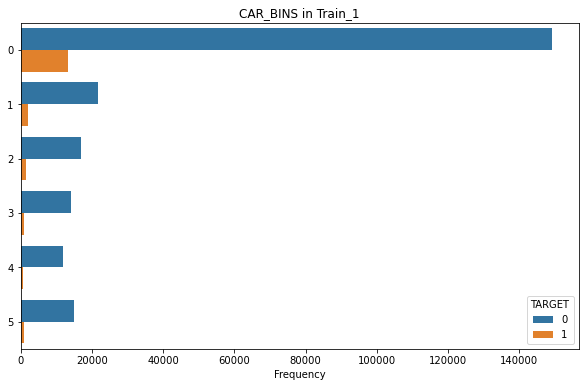

In [242]:
print('For Train_1:')

proportion(train_1, 'CAR_BINS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='CAR_BINS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('CAR_BINS in Train_1');

For Train_2:
Proportion of defaults in 0 is 6.7%
Proportion of defaults in 1 is 5.7%
Proportion of defaults in 2 is 6.1%
Proportion of defaults in 3 is 4.5%
Proportion of defaults in 4 is 3.4%
Proportion of defaults in 5 is 4.0%


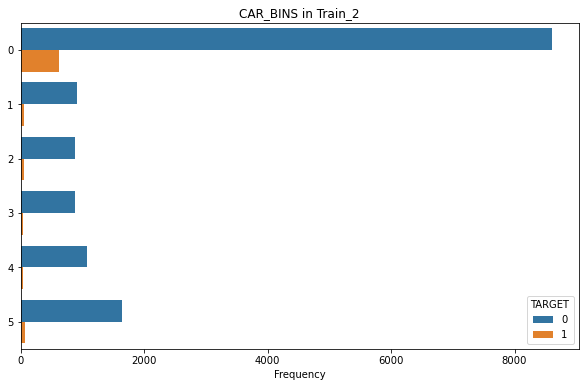

In [243]:
print('For Train_2:')

proportion(train_2, 'CAR_BINS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='CAR_BINS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('CAR_BINS in Train_2');

For Train_3:
Proportion of defaults in 0 is 10.6%
Proportion of defaults in 1 is 11.4%
Proportion of defaults in 2 is 9.0%
Proportion of defaults in 3 is 8.7%
Proportion of defaults in 4 is 7.3%
Proportion of defaults in 5 is 8.9%


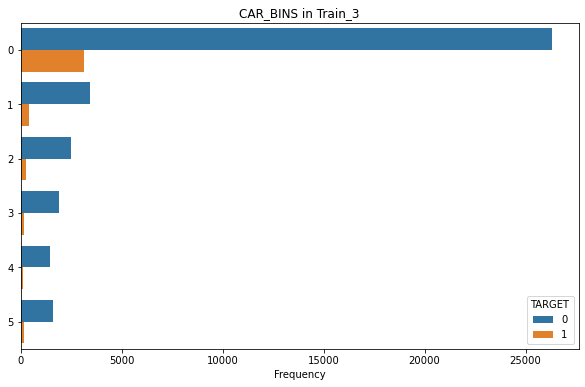

In [244]:
print('For Train_3:')

proportion(train_3, 'CAR_BINS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='CAR_BINS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('CAR_BINS in Train_3');

For Train_4:
Proportion of defaults in 0 is 8.4%
Proportion of defaults in 1 is 10.4%
Proportion of defaults in 2 is 7.2%
Proportion of defaults in 3 is 2.2%
Proportion of defaults in 4 is 5.4%
Proportion of defaults in 5 is 2.3%


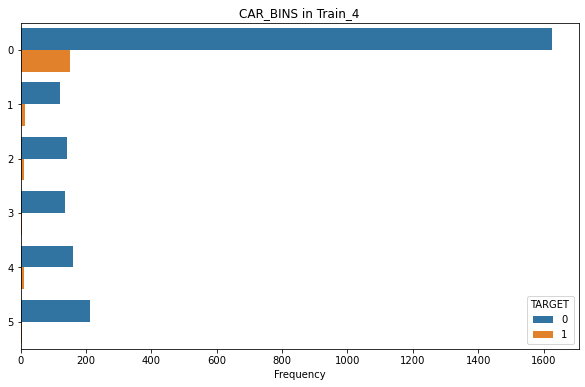

In [245]:
print('For Train_4:')

proportion(train_4, 'CAR_BINS')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='CAR_BINS', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('CAR_BINS in Train_4');

In general, owners with newer cars tend to have lower default rates. This trend is significant in group 1 and 3 but less so in group 2 and 4.

### 5.12. CNT_FAM_MEMBERS
`How many family members does applicant have`
<br>
[top](#Contents)

Similar to cars age, we might want to create bins to group the applicants. Let's explore the range of values first:

In [246]:
for df_train in train_set:
    print(df_train['CNT_FAM_MEMBERS'].value_counts())
    print()

for df_test in test_set:
    print(df_test['CNT_FAM_MEMBERS'].value_counts())
    print()

2.0     128296
1.0      52781
3.0      43488
4.0      20710
5.0       2922
6.0        331
7.0         70
8.0         15
9.0          5
10.0         3
14.0         2
20.0         2
16.0         2
12.0         1
13.0         1
11.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

2.0    7915
1.0    3774
3.0    2126
4.0     923
5.0     110
6.0       7
7.0       2
8.0       1
Name: CNT_FAM_MEMBERS, dtype: int64

2.0     20733
1.0     10591
3.0      6651
4.0      2952
5.0       424
6.0        68
7.0         8
8.0         4
9.0         1
12.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

2.0    1413
1.0     701
3.0     335
4.0     112
5.0      22
6.0       2
7.0       1
Name: CNT_FAM_MEMBERS, dtype: int64

2.0     22335
1.0      8390
3.0      6993
4.0      3222
5.0       442
6.0        34
7.0         8
10.0        2
13.0        2
9.0         1
21.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

2.0    505
1.0    177
3.0    153
4.0     47
5.0      7
7.0      1
Name: CNT_FAM_MEMBER

In [247]:
# fillna with 0s
for df_train in train_set:
    df_train['CNT_FAM_MEMBERS'].fillna(0, inplace=True)

for df_test in test_set:
    df_test['CNT_FAM_MEMBERS'].fillna(0, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [248]:
# create new feature, that groups 4 members or more into 1 group
# and 0 or 1 members as 1 group
for df_train in train_set:
    df_train['FAM_MEMBERS_BIN'] = df_train['CNT_FAM_MEMBERS'].apply(
        lambda x: 4 if x >= 4 else 1 if x <= 1 else x)

for df_test in test_set:
    df_test['FAM_MEMBERS_BIN'] = df_test['CNT_FAM_MEMBERS'].apply(
        lambda x: 4 if x >= 4 else 1 if x <= 1 else x)

<ipython-input-248-afd3e8bb64f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['FAM_MEMBERS_BIN'] = df_train['CNT_FAM_MEMBERS'].apply(
<ipython-input-248-afd3e8bb64f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FAM_MEMBERS_BIN'] = df_test['CNT_FAM_MEMBERS'].apply(


For Train_1:
Proportion of defaults in 1.0 is 8.0%
Proportion of defaults in 2.0 is 7.4%
Proportion of defaults in 3.0 is 8.6%
Proportion of defaults in 4.0 is 8.5%


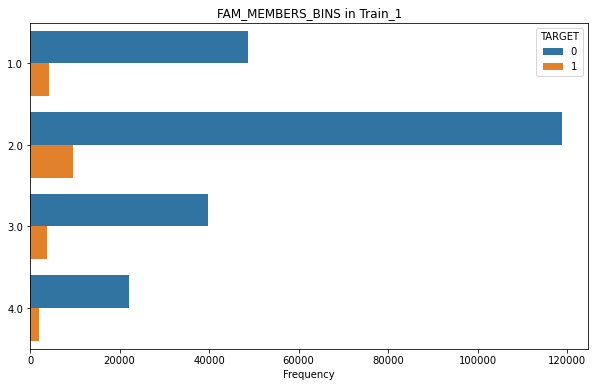

In [249]:
print('For Train_1:')
proportion(train_1, 'FAM_MEMBERS_BIN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='FAM_MEMBERS_BIN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('FAM_MEMBERS_BINS in Train_1');

For Train_2:
Proportion of defaults in 1.0 is 6.4%
Proportion of defaults in 2.0 is 5.6%
Proportion of defaults in 3.0 is 6.1%
Proportion of defaults in 4.0 is 5.8%


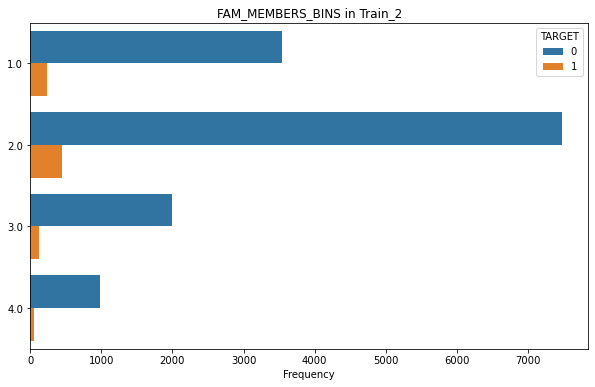

In [250]:
print('For Train_2:')
proportion(train_2, 'FAM_MEMBERS_BIN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='FAM_MEMBERS_BIN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('FAM_MEMBERS_BINS in Train_2');

For Train_3:
Proportion of defaults in 1.0 is 11.2%
Proportion of defaults in 2.0 is 9.4%
Proportion of defaults in 3.0 is 10.8%
Proportion of defaults in 4.0 is 11.8%


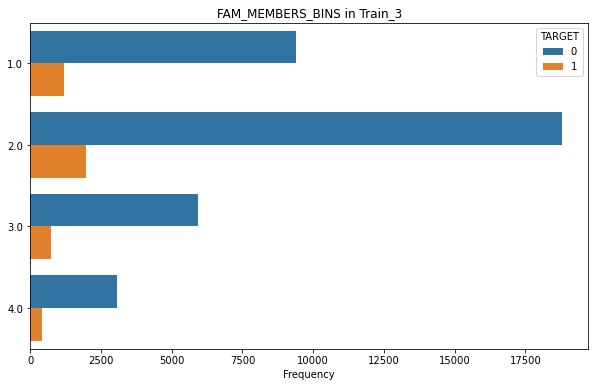

In [251]:
print('For Train_3:')
proportion(train_3, 'FAM_MEMBERS_BIN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='FAM_MEMBERS_BIN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('FAM_MEMBERS_BINS in Train_3');

For Train_4:
Proportion of defaults in 1.0 is 7.4%
Proportion of defaults in 2.0 is 7.0%
Proportion of defaults in 3.0 is 9.9%
Proportion of defaults in 4.0 is 5.8%


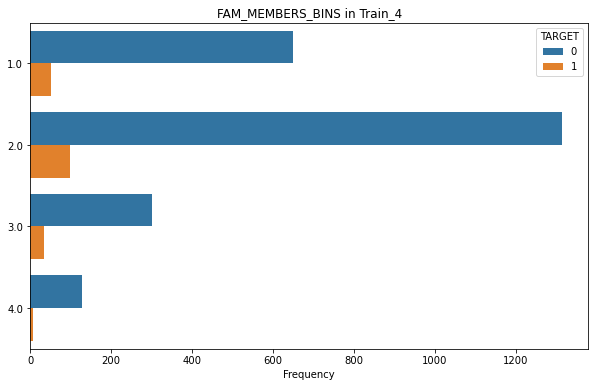

In [252]:
print('For Train_4:')
proportion(train_4, 'FAM_MEMBERS_BIN')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='FAM_MEMBERS_BIN', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('FAM_MEMBERS_BINS in Train_4');

In general, having more family members tend to lead to higher default rates, however, this trend was not observed in group 4, where having 4 or more family members had a much lower default rate compared to the rest. 

### 5.13. HOUR_APPR_PROCESS_START
`Approximately at what hour did the applicant apply for the loan`
<br>
[top](#Contents)

For Train_1:
Proportion of defaults in 0 is 15.6%
Proportion of defaults in 1 is 9.1%
Proportion of defaults in 2 is 9.2%
Proportion of defaults in 3 is 8.6%
Proportion of defaults in 4 is 7.8%
Proportion of defaults in 5 is 10.7%
Proportion of defaults in 6 is 10.9%
Proportion of defaults in 7 is 9.6%
Proportion of defaults in 8 is 8.7%
Proportion of defaults in 9 is 7.8%
Proportion of defaults in 10 is 7.8%
Proportion of defaults in 11 is 7.7%
Proportion of defaults in 12 is 8.0%
Proportion of defaults in 13 is 7.9%
Proportion of defaults in 14 is 7.7%
Proportion of defaults in 15 is 7.5%
Proportion of defaults in 16 is 7.4%
Proportion of defaults in 17 is 6.5%
Proportion of defaults in 18 is 6.8%
Proportion of defaults in 19 is 7.0%
Proportion of defaults in 20 is 6.9%
Proportion of defaults in 21 is 5.8%
Proportion of defaults in 22 is 10.2%
Proportion of defaults in 23 is 11.4%


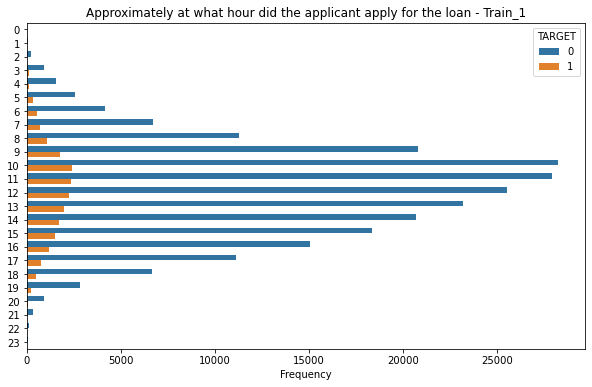

In [253]:
print('For Train_1:')
proportion(train_1, 'HOUR_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='HOUR_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Approximately at what hour did the applicant apply for the loan - Train_1');

For Train_2:
Proportion of defaults in 2 is 6.2%
Proportion of defaults in 3 is 5.9%
Proportion of defaults in 4 is 3.0%
Proportion of defaults in 5 is 5.4%
Proportion of defaults in 6 is 5.6%
Proportion of defaults in 7 is 7.4%
Proportion of defaults in 8 is 4.9%
Proportion of defaults in 9 is 6.1%
Proportion of defaults in 10 is 6.6%
Proportion of defaults in 11 is 6.2%
Proportion of defaults in 12 is 6.6%
Proportion of defaults in 13 is 6.7%
Proportion of defaults in 14 is 5.7%
Proportion of defaults in 15 is 4.9%
Proportion of defaults in 16 is 5.3%
Proportion of defaults in 17 is 5.0%
Proportion of defaults in 18 is 6.3%
Proportion of defaults in 19 is 2.8%
Proportion of defaults in 20 is 6.3%
Proportion of defaults in 21 is 11.1%


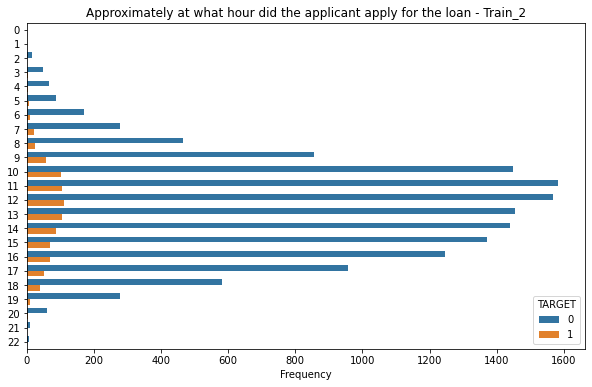

In [254]:
print('For Train_2:')
proportion(train_2, 'HOUR_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='HOUR_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Approximately at what hour did the applicant apply for the loan - Train_2');

For Train_3:
Proportion of defaults in 0 is 14.3%
Proportion of defaults in 2 is 14.3%
Proportion of defaults in 3 is 9.9%
Proportion of defaults in 4 is 11.7%
Proportion of defaults in 5 is 10.8%
Proportion of defaults in 6 is 12.8%
Proportion of defaults in 7 is 13.1%
Proportion of defaults in 8 is 12.0%
Proportion of defaults in 9 is 11.3%
Proportion of defaults in 10 is 9.9%
Proportion of defaults in 11 is 11.0%
Proportion of defaults in 12 is 10.6%
Proportion of defaults in 13 is 9.6%
Proportion of defaults in 14 is 10.1%
Proportion of defaults in 15 is 9.2%
Proportion of defaults in 16 is 9.2%
Proportion of defaults in 17 is 7.7%
Proportion of defaults in 18 is 9.1%
Proportion of defaults in 19 is 9.1%
Proportion of defaults in 20 is 8.3%
Proportion of defaults in 21 is 7.7%
Proportion of defaults in 22 is 11.8%
Proportion of defaults in 23 is 20.0%


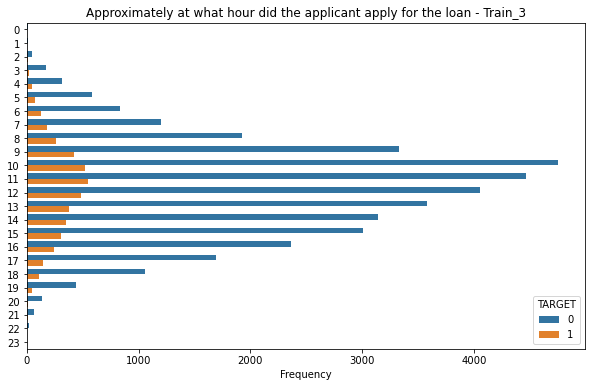

In [255]:
print('For Train_3:')
proportion(train_3, 'HOUR_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='HOUR_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Approximately at what hour did the applicant apply for the loan - Train_3');

For Train_4:
Proportion of defaults in 3 is 20.0%
Proportion of defaults in 5 is 7.7%
Proportion of defaults in 6 is 11.4%
Proportion of defaults in 7 is 9.3%
Proportion of defaults in 8 is 7.4%
Proportion of defaults in 9 is 8.1%
Proportion of defaults in 10 is 8.2%
Proportion of defaults in 11 is 12.1%
Proportion of defaults in 12 is 6.0%
Proportion of defaults in 13 is 6.6%
Proportion of defaults in 14 is 7.2%
Proportion of defaults in 15 is 9.5%
Proportion of defaults in 16 is 7.7%
Proportion of defaults in 17 is 2.7%
Proportion of defaults in 18 is 4.2%
Proportion of defaults in 19 is 2.7%
Proportion of defaults in 20 is 6.2%


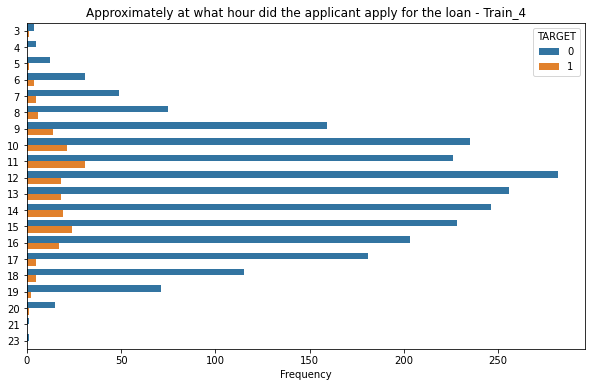

In [256]:
print('For Train_4:')
proportion(train_4, 'HOUR_APPR_PROCESS_START')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='HOUR_APPR_PROCESS_START', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Approximately at what hour did the applicant apply for the loan - Train_4');

In general, majority of the applications were during office hours from 8am to 6pm. Default rates were observed to be higher during dusk timing, especially from 12 midnight to 6 or 7am. As splitting by hours might be too granular, we set a new feature called `PROCESS_START_PERIOD` which group the hours by daytime and 'dusk' time:

In [257]:
for df_train in train_set: 
    df_train['PROCESS_START_PERIOD'] = df_train['HOUR_APPR_PROCESS_START'].apply(lambda x: 'morning' if (x>=7 and x<=12) else 'afternoon' if (x>=13 and x<=20) else 'dusk')

for df_test in test_set: 
    df_test['PROCESS_START_PERIOD'] = df_test['HOUR_APPR_PROCESS_START'].apply(lambda x: 'morning' if (x>=7 and x<=12) else 'afternoon' if (x>=13 and x<=20) else 'dusk')

<ipython-input-257-9655d3f4c2d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PROCESS_START_PERIOD'] = df_train['HOUR_APPR_PROCESS_START'].apply(lambda x: 'morning' if (x>=7 and x<=12) else 'afternoon' if (x>=13 and x<=20) else 'dusk')
<ipython-input-257-9655d3f4c2d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['PROCESS_START_PERIOD'] = df_test['HOUR_APPR_PROCESS_START'].apply(lambda x: 'morning' if (x>=7 and x<=12) else 'afternoon' if (x>=13 and x<=20) else 'dusk')


For Train_1:
Proportion of defaults in afternoon is 7.4%
Proportion of defaults in dusk is 10.0%
Proportion of defaults in morning is 8.0%


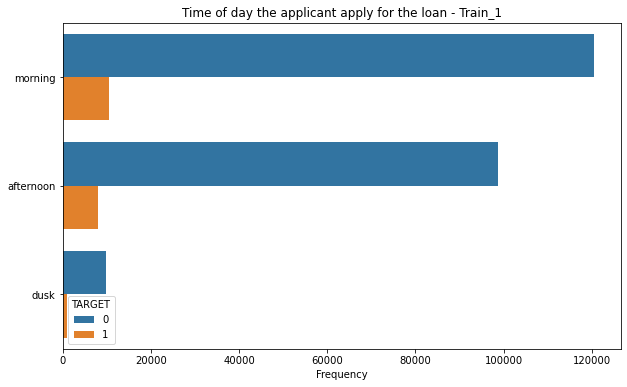

In [258]:
print('For Train_1:')
proportion(train_1, 'PROCESS_START_PERIOD')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='PROCESS_START_PERIOD', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Time of day the applicant apply for the loan - Train_1');

For Train_2:
Proportion of defaults in afternoon is 5.5%
Proportion of defaults in dusk is 5.2%
Proportion of defaults in morning is 6.3%


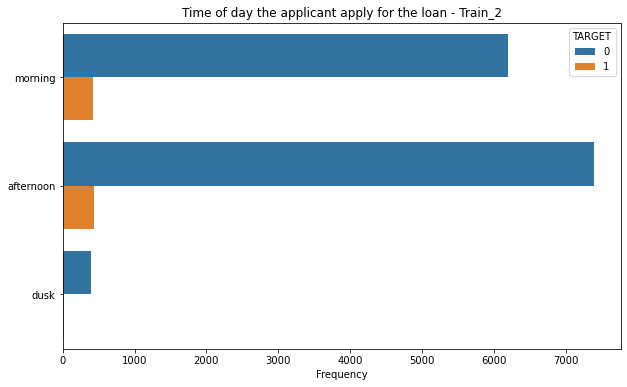

In [259]:
print('For Train_2:')
proportion(train_2, 'PROCESS_START_PERIOD')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='PROCESS_START_PERIOD', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Time of day the applicant apply for the loan - Train_2');

For Train_3:
Proportion of defaults in afternoon is 9.3%
Proportion of defaults in dusk is 11.7%
Proportion of defaults in morning is 10.9%


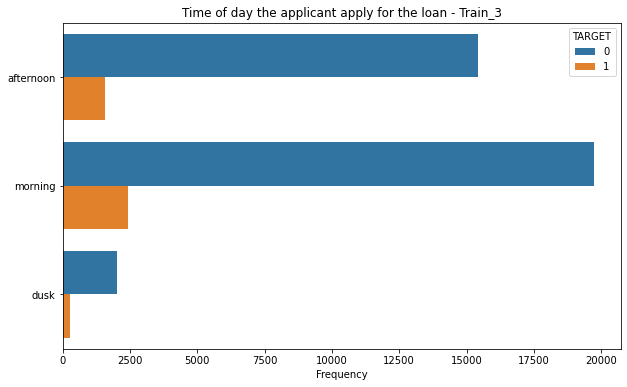

In [260]:
print('For Train_3:')
proportion(train_3, 'PROCESS_START_PERIOD')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='PROCESS_START_PERIOD', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Time of day the applicant apply for the loan - Train_3');

For Train_4:
Proportion of defaults in afternoon is 6.5%
Proportion of defaults in dusk is 10.0%
Proportion of defaults in morning is 8.5%


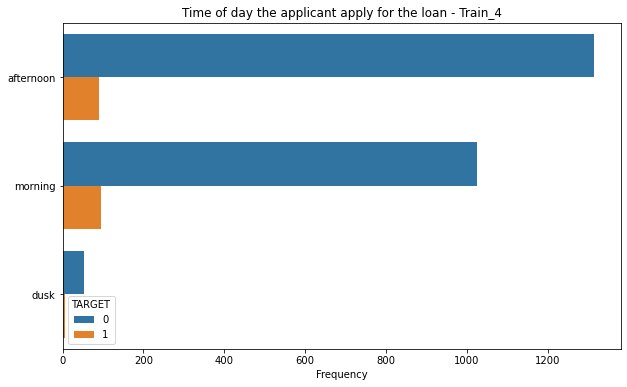

In [261]:
print('For Train_4:')
proportion(train_4, 'PROCESS_START_PERIOD')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='PROCESS_START_PERIOD', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Time of day the applicant apply for the loan - Train_4');

Hence, in general, default rates are higher during dusk (9pm to 6am)

### 5.14. EXT_SOURCE_1-3
`Normalized score from external data source`
<br>
[top](#Contents)

While it was mentioned that all 3 scores are from external data source, EXT_SOURCE_2 is the most readily available. Interestingly, EXT_SOURCE_3 is the second most prevalent for train_1 and 2, while EXT_SOURCE_1 is the second most prevalent in train_3 and 4. We first check that the 3 EXT_SOURCE is correlated and then generated a new feature which averages across the 3 scores. 

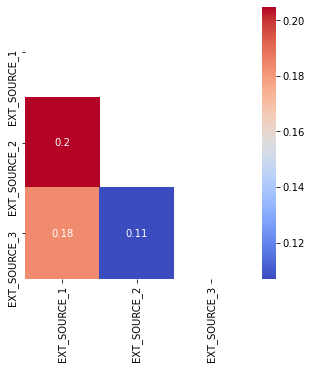

In [262]:
feat = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

plt.figure(figsize=(5, 5))
# looking at train_1
corr = train_1[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True,);

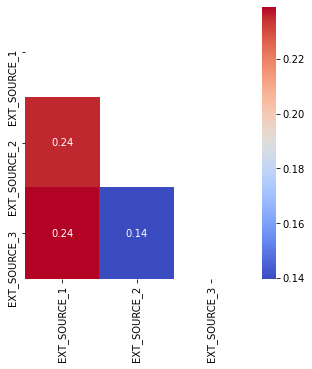

In [263]:
plt.figure(figsize=(5, 5))
# looking at train_2
corr = train_2[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True,);

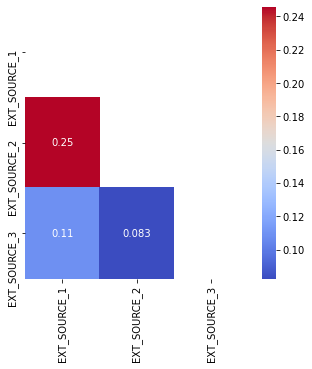

In [264]:
plt.figure(figsize=(5, 5))
# looking at train_3
corr = train_3[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True,);

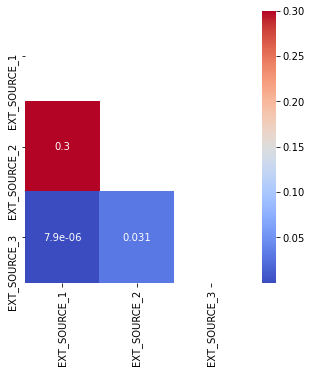

In [265]:
plt.figure(figsize=(5, 5))
# looking at train_2
corr = train_4[feat].corr()
mask=np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True,);

In [266]:
# since they are not negatively correlated, we generated a new feature that average the scores
for df_train in train_set:
    df_train['AVG_EXT_SOURCE'] = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

for df_test in test_set:
    df_test['AVG_EXT_SOURCE'] = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

<ipython-input-266-ebb547311e60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AVG_EXT_SOURCE'] = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
<ipython-input-266-ebb547311e60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['AVG_EXT_SOURCE'] = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)


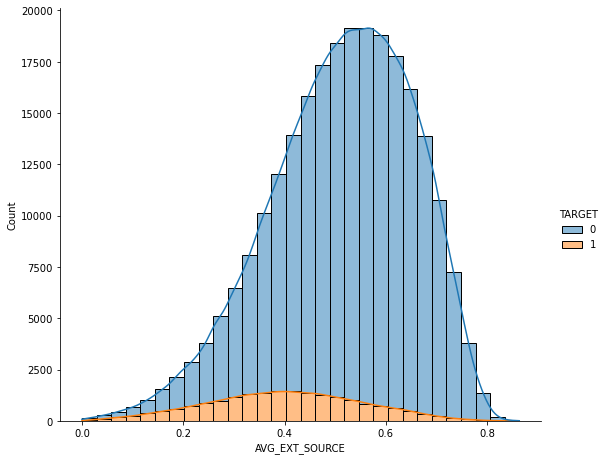

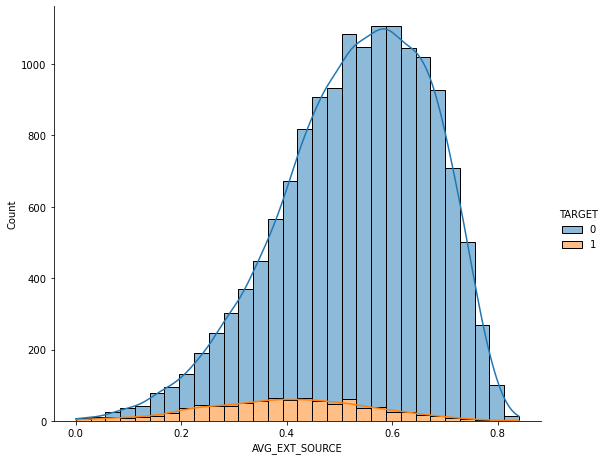

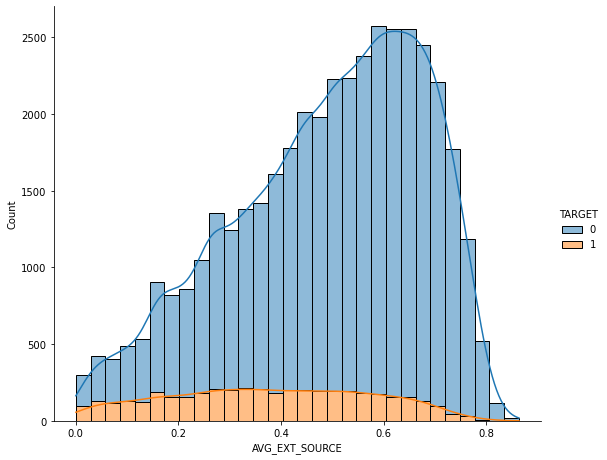

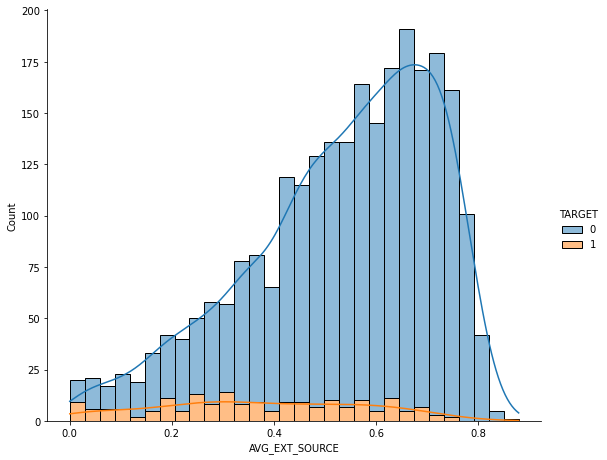

In [267]:
for df_train in train_set:
    plot_dist(df_train, 'AVG_EXT_SOURCE', bins=30)

In general, lower scores tend to have higher default rates and the distributions are all left-skewed. 

### 5.15. SOCIAL_CIRCLE
`How many of the applicant's social (circle) have loans that were 1 month (30 days) and 2 months (60 days) in effect`
<br>
`How many of the applicant's social (circle) have defaulted on their loans based on 30-day past due and 60-day past due`
<br>
[top](#Contents)


We believe OBS_30/60_CNT_SOCIAL_CIRLE to be a positive social influencer in the sense that if there are many people within the applicant's social cirle that have borrowed loans with the company, then the applicant is less likely to default on its loan. 

Likewise, DEF_30/60_CNT_SOCIAL_CIRCLE works as a negative social influencer in the sense that if there are many people within the applicant's social cirlce that have defaulted on their loans with the company, then the applicant might feel that it is ok to default on the loan too. 

In [268]:
train_1.loc[(train_1['OBS_60_CNT_SOCIAL_CIRCLE']!=0) & (train_1['DEF_60_CNT_SOCIAL_CIRCLE']!=0)
            & (train_1['TARGET']!=0)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100002       1         Cash loans            1             0   
260        100300       1         Cash loans            1             0   
408        100472       1         Cash loans            1             1   
827        100945       1         Cash loans            0             0   
1113       101300       1         Cash loans            0             0   
...           ...     ...                ...          ...           ...   
307004     455684       1         Cash loans            0             0   
307096     455786       1         Cash loans            1             1   
307126     455822       1         Cash loans            1             1   
307363     456088       1         Cash loans            0             1   
307407     456140       1         Cash loans            0             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
260                   0             0           63000.0    426645.0   
408                   1             1          135000.0    545040.0   
827                   1             0          202500.0   1210500.0   
1113                  0             0           81000.0    808650.0   
...                 ...           ...               ...         ...   
307004                0             0           90000.0    331834.5   
307096                0             1          202500.0   1067418.0   
307126                0             2          112500.0    450000.0   
307363                1             0           29250.0    663093.0   
307407                1             1          261000.0    711454.5   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           24700.5         351000.0    Unaccompanied                 4   
260         22468.5         324000.0          Other_A                 3   
408         26509.5         450000.0    Unaccompanied                 4   
827         39046.5        1210500.0           Family                 3   
1113        31333.5         675000.0    Unaccompanied                 4   
...             ...              ...              ...               ...   
307004      20182.5         252000.0    Unaccompanied                 3   
307096      31207.5         891000.0    Unaccompanied                 4   
307126      30573.0         450000.0           Family                 3   
307363      21519.0         553500.0    Unaccompanied                 1   
307407      47673.0         643500.0  Spouse, partner                 3   

        NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                         2  Single / not married  House / apartment   
260                       2  Single / not married  House / apartment   
408                       2               Married  House / apartment   
827                       2        Civil marriage  House / apartment   
1113                      2               Married  House / apartment   
...                     ...                   ...                ...   
307004                    2               Married  House / apartment   
307096                    2               Married       With parents   
307126                    2               Married       With parents   
307363                    2               Married  House / apartment   
307407                    4               Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461         -637.0   
260                       0.018634      -12209        -1572.0   
408                       0.008474      -13923         -519.0   
827                       0.019689      -14702         -238.0   
1113                      0.005313      -16333        -2631.0   
...                            ...         ...            ...   
307004                    0.0188

In [269]:
train_1.loc[(train_1['DEF_30_CNT_SOCIAL_CIRCLE'] < train_1['DEF_60_CNT_SOCIAL_CIRCLE'])]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, FLAG_DOCUMENT_16, FLAG_DOCUMENT_18, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, ...]
Index: []

In [270]:
# generate new features - AVG_OBS_CNT_SOCIAL_CIRCLE, AVG_DEF_CNT_SOCIAL_CIRCLE
for df_train in train_set:
    df_train['AVG_OBS_CNT_SOCIAL_CIRCLE'] = df_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
    df_train['AVG_DEF_CNT_SOCIAL_CIRCLE'] = df_train[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
    
for df_test in test_set:
    df_test['AVG_OBS_CNT_SOCIAL_CIRCLE'] = df_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
    df_test['AVG_DEF_CNT_SOCIAL_CIRCLE'] = df_test[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
    

<ipython-input-270-8adfca4ace14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AVG_OBS_CNT_SOCIAL_CIRCLE'] = df_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
<ipython-input-270-8adfca4ace14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AVG_DEF_CNT_SOCIAL_CIRCLE'] = df_train[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mean(axis=1)
<ipython-input-270-8adfca4ace14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [271]:
# generate ratio feature
for df_train in train_set:
    df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_train['AVG_DEF_CNT_SOCIAL_CIRCLE'] /df_train['AVG_OBS_CNT_SOCIAL_CIRCLE']
    
for df_test in test_set:
    df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_test['AVG_DEF_CNT_SOCIAL_CIRCLE'] /df_test['AVG_OBS_CNT_SOCIAL_CIRCLE']

<ipython-input-271-82ab0ae5b610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_train['AVG_DEF_CNT_SOCIAL_CIRCLE'] /df_train['AVG_OBS_CNT_SOCIAL_CIRCLE']
<ipython-input-271-82ab0ae5b610>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_test['AVG_DEF_CNT_SOCIAL_CIRCLE'] /df_test['AVG_OBS_CNT_SOCIAL_CIRCLE']


In [272]:
# 2 types of NaN values in RATIO_DEF_OBS_SOCIAL_CIRCLE
# 1 is due to AVG_OBS_CNT_SOCIAL_CIRCLE = 0, 
# the other due to already missing observation in OBS and DEF initial feature
# input 0 for those observations due to AVG_OBS_CNT_SOCIAL_CIRCLE = 0
for df_train in train_set:
    df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'].loc[df_train['AVG_OBS_CNT_SOCIAL_CIRCLE']==0] =0

for df_test in test_set:
    df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'].loc[df_test['AVG_OBS_CNT_SOCIAL_CIRCLE']==0] =0

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [273]:
# since the ratios are too granular, we group them into bins,
# and we want to keep ratio=0 as a sepaarate bin
bins_int = [-0.000001, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins_label = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


for df_train in train_set:
    df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = pd.cut(df_train.RATIO_DEF_OBS_SOCIAL_CIRCLE,
                                                     bins=bins_int,
                                                     right=True,
                                                     labels=bins_label,
                                                     )
for df_test in test_set:
    df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = pd.cut(df_test.RATIO_DEF_OBS_SOCIAL_CIRCLE,
                                                     bins=bins_int,
                                                     right=True,
                                                     labels=bins_label,
                                                    )

<ipython-input-273-c1387e23df09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = pd.cut(df_train.RATIO_DEF_OBS_SOCIAL_CIRCLE,
<ipython-input-273-c1387e23df09>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = pd.cut(df_test.RATIO_DEF_OBS_SOCIAL_CIRCLE,


C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


For Train_1:
Proportion of defaults in 0.0 is 7.6%
Proportion of defaults in 0.1 is 9.4%
Proportion of defaults in 0.2 is 9.0%
Proportion of defaults in 0.3 is 9.2%
Proportion of defaults in 0.4 is 9.9%
Proportion of defaults in 0.5 is 10.3%
Proportion of defaults in 0.6 is 18.8%
Proportion of defaults in 0.7 is 11.8%
Proportion of defaults in 0.8 is 11.4%
Proportion of defaults in 0.9 is 8.7%
Proportion of defaults in 1.0 is 10.3%


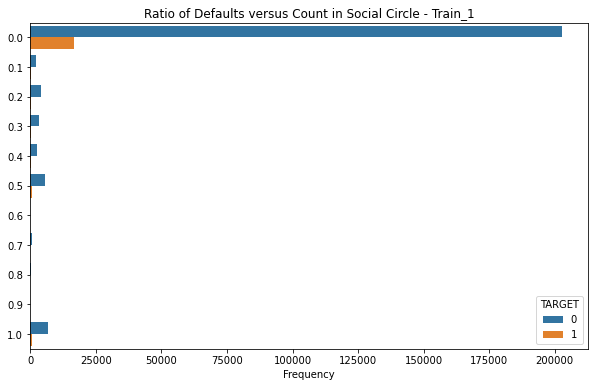

In [274]:
print('For Train_1:')
proportion(train_1, 'RATIO_DEF_OBS_SOCIAL_CIRCLE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_1, y='RATIO_DEF_OBS_SOCIAL_CIRCLE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Ratio of Defaults versus Count in Social Circle - Train_1');

<ipython-input-44-11535172d12e>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  ratio = df[feat].loc[df['TARGET']==1].value_counts()[feature]/df[feat].value_counts()[feature]
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


For Train_2:
Proportion of defaults in 0.0 is 5.5%
Proportion of defaults in 0.1 is 6.0%
Proportion of defaults in 0.2 is 10.9%
Proportion of defaults in 0.3 is 11.9%
Proportion of defaults in 0.4 is 9.3%
Proportion of defaults in 0.5 is 7.6%
Proportion of defaults in 0.6 is 16.7%
Proportion of defaults in 0.7 is 16.7%
Proportion of defaults in 0.8 is 10.5%
Proportion of defaults in 0.9 is nan%
Proportion of defaults in 1.0 is 9.9%


C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


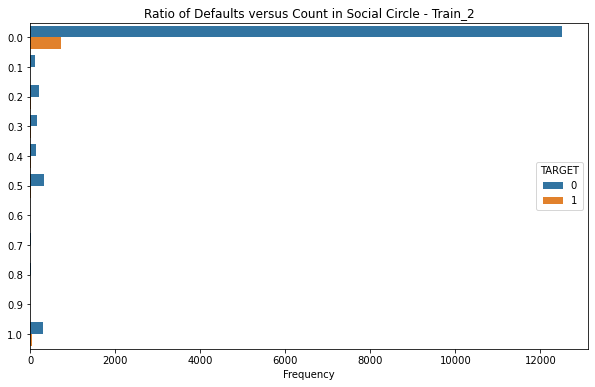

In [275]:
print('For Train_2:')
proportion(train_2, 'RATIO_DEF_OBS_SOCIAL_CIRCLE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_2, y='RATIO_DEF_OBS_SOCIAL_CIRCLE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Ratio of Defaults versus Count in Social Circle - Train_2');

For Train_3:
Proportion of defaults in 0.0 is 9.8%
Proportion of defaults in 0.1 is 12.0%
Proportion of defaults in 0.2 is 14.1%
Proportion of defaults in 0.3 is 13.0%
Proportion of defaults in 0.4 is 12.0%
Proportion of defaults in 0.5 is 14.4%
Proportion of defaults in 0.6 is 44.0%
Proportion of defaults in 0.7 is 12.1%
Proportion of defaults in 0.8 is 13.8%
Proportion of defaults in 0.9 is 8.3%

C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())



Proportion of defaults in 1.0 is 15.0%


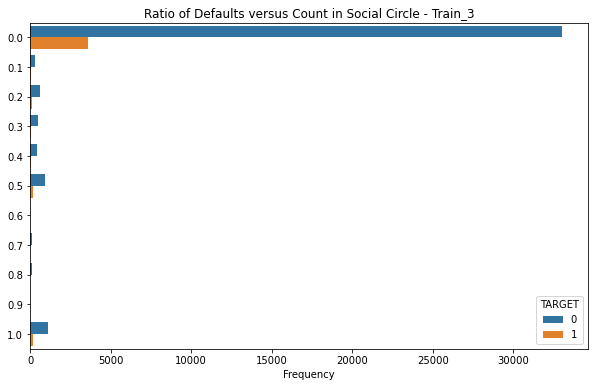

In [276]:
print('For Train_3:')
proportion(train_3, 'RATIO_DEF_OBS_SOCIAL_CIRCLE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_3, y='RATIO_DEF_OBS_SOCIAL_CIRCLE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Ratio of Defaults versus Count in Social Circle - Train_3');

For Train_4:
Proportion of defaults in 0.0 is 7.3%
Proportion of defaults in 0.1 is 12.5%
Proportion of defaults in 0.2 is 11.1%
Proportion of defaults in 0.3 is 17.9%
Proportion of defaults in 0.4 is 23.5%
Proportion of defaults in 0.5 is 6.9%
Proportion of defaults in 0.6 is 0.0%
Proportion of defaults in 0.7 is 20.0%
Proportion of defaults in 0.8 is 0.0%
Proportion of defaults in 0.9 is 0.0%
Proportion of defaults in 1.0 is 9.8%


C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Robby\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


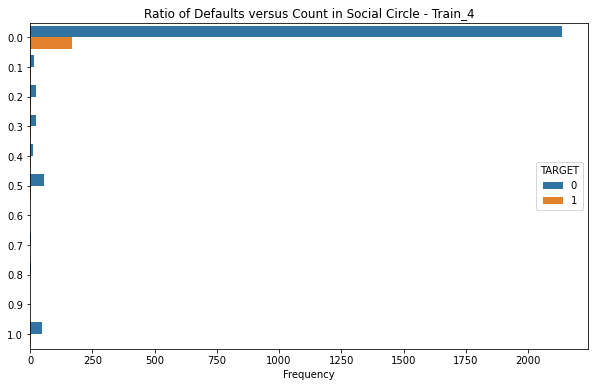

In [277]:
print('For Train_4:')
proportion(train_4, 'RATIO_DEF_OBS_SOCIAL_CIRCLE')

plt.figure(figsize = (10, 6))
sns.countplot(data=train_4, y='RATIO_DEF_OBS_SOCIAL_CIRCLE', orient='h', hue='TARGET')
# Labeling of plot
plt.xlabel('Frequency'); plt.ylabel(''); plt.title('Ratio of Defaults versus Count in Social Circle - Train_4');

In [278]:
train_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0     100002       1         Cash loans            1             0   
1     100003       0         Cash loans            0             0   
2     100004       0    Revolving loans            1             1   
4     100007       0         Cash loans            1             0   
5     100008       0         Cash loans            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0    Unaccompanied                 4                    2   
1        1129500.0           Family                 2                    4   
2         135000.0    Unaccompanied                 4                    2   
4         513000.0    Unaccompanied                 4                    2   
5         454500.0  Spouse, partner                 2                    2   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461         -637.0            -3648.0            -2120          NaN   
1      -16765        -1188.0            -1186.0             -291          NaN   
2      -19046         -225.0            -4260.0            -2531         26.0   
4      -19932        -3038.0            -4311.0            -3458          NaN   
5      -16941        -1588.0            -4970.0             -477          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
4           1               1                0                 1           0   
5           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
0           0        Laborers              1.0                            2   
1           0      Core staff              2.0                            1   
2           0        Laborers              1.0                            2   
4           0      Core staff              1.0                            2   
5           0        Laborers              2.0                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
4                           0                           0   
5                           0                           0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT

### 5.16. DAYS_LAST_PHONE_CHANGE
`How many days before application did client change phone`
<br>
[top](#Contents)

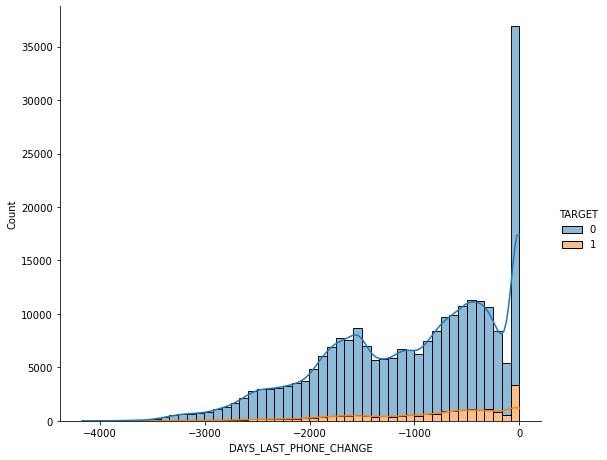

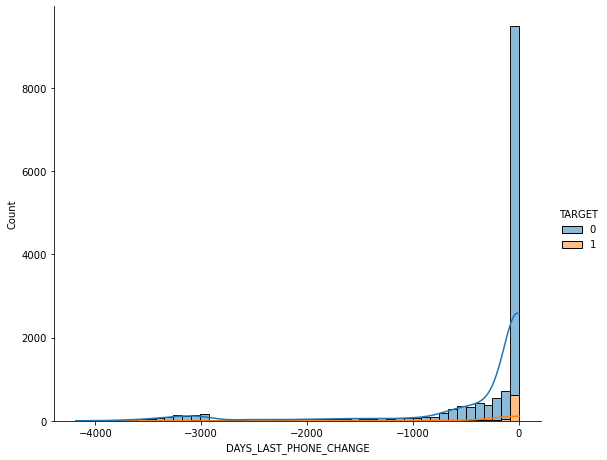

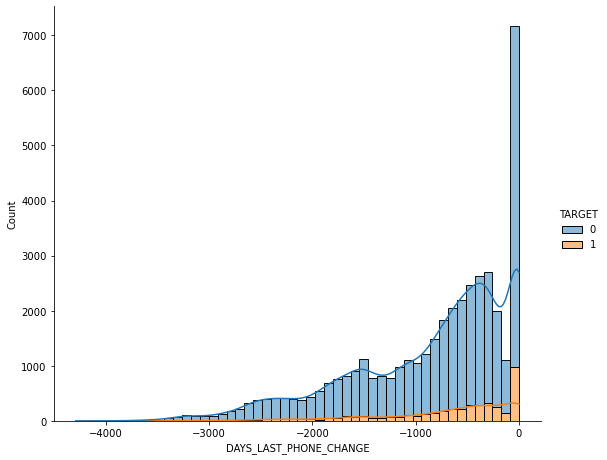

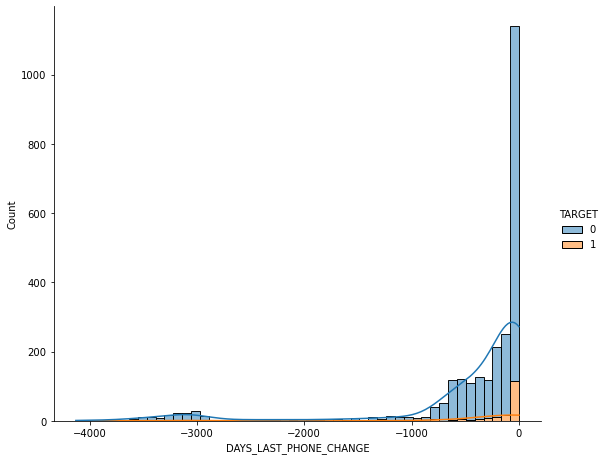

In [279]:
for df_train in train_set:
    plot_dist(df_train, 'DAYS_LAST_PHONE_CHANGE', bins=50)

Majority of the applicants changed their phones recently and there seems to be indication that as the longer the applicant has last changed their phone, the default rate seems to be higher. This is seen more in group 1 and 3. 

### 6. Dropping Features and Filling Missing Values
[top](#Contents)

We have generated a number of new features based on existing features as well as look at the missing values as a proportion of the size of the respective dataset. Let's drop the features that we do not need and where we haven't dropped them earlier:

In [280]:
to_drop = ['CNT_CHILDREN', 'AMT_GOODS_PRICE', 'NAME_HOUSING_TYPE',
           'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMAIL', 
           'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
           'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 
           'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
           'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',  'YEARS_BUILD_MODE',
           'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 
           'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
           'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 
           'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
           'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 
           'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
           'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for df_train in train_set:
    df_train.drop(to_drop, axis=1, inplace=True)

for df_test in test_set:
    df_test.drop(to_drop, axis=1, inplace=True)

C:\Users\Robby\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [281]:
train_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100002       1         Cash loans            1             0   
1          100003       0         Cash loans            0             0   
2          100004       0    Revolving loans            1             1   
4          100007       0         Cash loans            1             0   
5          100008       0         Cash loans            1             0   
...           ...     ...                ...          ...           ...   
307503     456247       0         Cash loans            0             0   
307505     456249       0         Cash loans            0             0   
307508     456253       0         Cash loans            0             0   
307509     456254       1         Cash loans            0             0   
307510     456255       0         Cash loans            0             0   

        FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                     1          202500.0    406597.5      24700.5   
1                     0          270000.0   1293502.5      35698.5   
2                     1           67500.0    135000.0       6750.0   
4                     1          121500.0    513000.0      21865.5   
5                     1           99000.0    490495.5      27517.5   
...                 ...               ...         ...          ...   
307503                1          112500.0    345510.0      17770.5   
307505                1          112500.0    225000.0      22050.0   
307508                1          153000.0    677664.0      29979.0   
307509                1          171000.0    370107.0      20205.0   
307510                0          157500.0    675000.0      49117.5   

        NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         Unaccompanied                 4                    2   
1                Family                 2                    4   
2         Unaccompanied                 4                    2   
4         Unaccompanied                 4                    2   
5       Spouse, partner                 2                    2   
...                 ...               ...                  ...   
307503    Unaccompanied                 3                    4   
307505    Unaccompanied                 1                    2   
307508    Unaccompanied                 4                    4   
307509    Unaccompanied                 3                    2   
307510    Unaccompanied                 3                    4   

          NAME_FAMILY_STATUS  REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  \
0       Single / not married                    0.018801            -3648.0   
1                    Married                    0.003541            -1186.0   
2       Single / not married                    0.010032            -4260.0   
4       Single / not married                    0.028663            -4311.0   
5                    Married                    0.035792            -4970.0   
...                      ...                         ...                ...   
307503  Single / not married                    0.022800             -675.0   
307505  Single / not married                    0.022800            -7369.0   
307508             Separated                    0.005002            -6737.0   
307509               Married                    0.005313            -2562.0   
307510               Married                    0.046220            -5128.0   

        DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                 -2120               1                0                 1   
1                  -291               1                0                 1   
2                 -2531               1                1                 1   
4                 -3458               1                0                 1   
5                  -477               1                1                 1   
...                 ...             ...              ..

In [282]:
for df_train in train_set:
    df_train['NAME_CONTRACT_TYPE'] = df_train['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x=='Cash loans' else 0)

for df_test in test_set:
    df_test['NAME_CONTRACT_TYPE'] = df_test['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x=='Cash loans' else 0)
    
for df_train in train_set:
    df_train['DAYS_EMPLOYED_PENSION'] = df_train['DAYS_EMPLOYED_PENSION'].apply(lambda x: 1 if x else 0)

for df_test in test_set:
    df_test['DAYS_EMPLOYED_PENSION'] = df_test['DAYS_EMPLOYED_PENSION'].apply(lambda x: 1 if x else 0)
    

<ipython-input-282-29200ab7629d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NAME_CONTRACT_TYPE'] = df_train['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x=='Cash loans' else 0)
<ipython-input-282-29200ab7629d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NAME_CONTRACT_TYPE'] = df_test['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x=='Cash loans' else 0)
<ipython-input-282-29200ab7629d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [283]:
# convert feature to float
for df_train in train_set:
    df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'].astype(float)
    
for df_test in test_set:
    df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'].astype(float)

<ipython-input-283-9b2b693fafb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_train['RATIO_DEF_OBS_SOCIAL_CIRCLE'].astype(float)
<ipython-input-283-9b2b693fafb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'] = df_test['RATIO_DEF_OBS_SOCIAL_CIRCLE'].astype(float)


In [284]:
missing_data(train_1)

The dataframe has 50 columns.
There are 11 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                 44521                 17.9
OBS_30_CNT_SOCIAL_CIRCLE       669                  0.3
DEF_30_CNT_SOCIAL_CIRCLE       669                  0.3
OBS_60_CNT_SOCIAL_CIRCLE       669                  0.3
DEF_60_CNT_SOCIAL_CIRCLE       669                  0.3
AVG_OBS_CNT_SOCIAL_CIRCLE      669                  0.3
AVG_DEF_CNT_SOCIAL_CIRCLE      669                  0.3
RATIO_DEF_OBS_SOCIAL_CIRCLE    669                  0.3
AVG_EXT_SOURCE                  32                  0.0
AMT_ANNUITY                     11                  0.0
ANNUITY_INCOME_RATIO            11                  0.0

In [285]:
missing_data(train_2)

The dataframe has 50 columns.
There are 9 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                  2493                 16.8
OBS_30_CNT_SOCIAL_CIRCLE       172                  1.2
DEF_30_CNT_SOCIAL_CIRCLE       172                  1.2
OBS_60_CNT_SOCIAL_CIRCLE       172                  1.2
DEF_60_CNT_SOCIAL_CIRCLE       172                  1.2
AVG_OBS_CNT_SOCIAL_CIRCLE      172                  1.2
AVG_DEF_CNT_SOCIAL_CIRCLE      172                  1.2
RATIO_DEF_OBS_SOCIAL_CIRCLE    172                  1.2
AVG_EXT_SOURCE                  52                  0.3

In [286]:
missing_data(train_3)

The dataframe has 50 columns.
There are 11 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                  7879                 19.0
OBS_30_CNT_SOCIAL_CIRCLE       103                  0.2
DEF_30_CNT_SOCIAL_CIRCLE       103                  0.2
OBS_60_CNT_SOCIAL_CIRCLE       103                  0.2
DEF_60_CNT_SOCIAL_CIRCLE       103                  0.2
AVG_OBS_CNT_SOCIAL_CIRCLE      103                  0.2
AVG_DEF_CNT_SOCIAL_CIRCLE      103                  0.2
RATIO_DEF_OBS_SOCIAL_CIRCLE    103                  0.2
AVG_EXT_SOURCE                  72                  0.2
AMT_ANNUITY                      1                  0.0
ANNUITY_INCOME_RATIO             1                  0.0

In [287]:
missing_data(train_4)

The dataframe has 50 columns.
There are 10 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                   481                 18.6
OBS_30_CNT_SOCIAL_CIRCLE        77                  3.0
DEF_30_CNT_SOCIAL_CIRCLE        77                  3.0
OBS_60_CNT_SOCIAL_CIRCLE        77                  3.0
DEF_60_CNT_SOCIAL_CIRCLE        77                  3.0
AVG_OBS_CNT_SOCIAL_CIRCLE       77                  3.0
AVG_DEF_CNT_SOCIAL_CIRCLE       77                  3.0
RATIO_DEF_OBS_SOCIAL_CIRCLE     77                  3.0
AVG_EXT_SOURCE                  16                  0.6
DAYS_LAST_PHONE_CHANGE           1                  0.0

In [288]:
missing_data(test_1)

The dataframe has 49 columns.
There are 10 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                  7905                 19.1
AMT_ANNUITY                     21                  0.1
ANNUITY_INCOME_RATIO            21                  0.1
OBS_30_CNT_SOCIAL_CIRCLE        13                  0.0
DEF_30_CNT_SOCIAL_CIRCLE        13                  0.0
OBS_60_CNT_SOCIAL_CIRCLE        13                  0.0
DEF_60_CNT_SOCIAL_CIRCLE        13                  0.0
AVG_OBS_CNT_SOCIAL_CIRCLE       13                  0.0
AVG_DEF_CNT_SOCIAL_CIRCLE       13                  0.0
RATIO_DEF_OBS_SOCIAL_CIRCLE     13                  0.0

In [289]:
missing_data(test_2)

The dataframe has 49 columns.
There are 9 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                   156                 17.5
OBS_30_CNT_SOCIAL_CIRCLE        11                  1.2
DEF_30_CNT_SOCIAL_CIRCLE        11                  1.2
OBS_60_CNT_SOCIAL_CIRCLE        11                  1.2
DEF_60_CNT_SOCIAL_CIRCLE        11                  1.2
AVG_OBS_CNT_SOCIAL_CIRCLE       11                  1.2
AVG_DEF_CNT_SOCIAL_CIRCLE       11                  1.2
RATIO_DEF_OBS_SOCIAL_CIRCLE     11                  1.2
AVG_EXT_SOURCE                   6                  0.7

In [290]:
missing_data(test_3)

The dataframe has 49 columns.
There are 3 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED           1176                 19.0
AMT_ANNUITY               3                  0.0
ANNUITY_INCOME_RATIO      3                  0.0

In [291]:
missing_data(test_4)

The dataframe has 49 columns.
There are 9 columns that have missing values.


Total  % of Missing Values
YRS_EMPLOYED                    37                 16.7
OBS_30_CNT_SOCIAL_CIRCLE         5                  2.3
DEF_30_CNT_SOCIAL_CIRCLE         5                  2.3
OBS_60_CNT_SOCIAL_CIRCLE         5                  2.3
DEF_60_CNT_SOCIAL_CIRCLE         5                  2.3
AVG_OBS_CNT_SOCIAL_CIRCLE        5                  2.3
AVG_DEF_CNT_SOCIAL_CIRCLE        5                  2.3
RATIO_DEF_OBS_SOCIAL_CIRCLE      5                  2.3
AVG_EXT_SOURCE                   1                  0.5

In [292]:
# input median for these except for YRS_employed
missing_columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'AVG_OBS_CNT_SOCIAL_CIRCLE', 'AVG_DEF_CNT_SOCIAL_CIRCLE',
                   'RATIO_DEF_OBS_SOCIAL_CIRCLE', 'AVG_EXT_SOURCE', 'AMT_ANNUITY', 'ANNUITY_INCOME_RATIO']

In [293]:
for df_train in train_set:
    for column in missing_columns:
        df_train[column].fillna(df_train[column].median())

for df_test in test_set:
    for column in missing_columns:
        df_test[column].fillna(df_test[column].median())

### 7. Saving to CSV
[top](#Contents)

In [294]:
# save individual train and test files
train_1.to_csv('../datasets/train_1_eda.csv', index=False)
train_2.to_csv('../datasets/train_2_eda.csv', index=False)
train_3.to_csv('../datasets/train_3_eda.csv', index=False)
train_4.to_csv('../datasets/train_4_eda.csv', index=False)

test_1.to_csv('../datasets/test_1_eda.csv', index=False)
test_2.to_csv('../datasets/test_2_eda.csv', index=False)
test_3.to_csv('../datasets/test_3_eda.csv', index=False)
test_4.to_csv('../datasets/test_4_eda.csv', index=False)